In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.set_random_seed(777)  # for reproducibility

f_data = np.loadtxt('crack_or_cicle_training4.csv', delimiter=',', dtype=np.float32)
f_test = np.loadtxt('crack_or_cicle_test.csv', delimiter=',', dtype=np.float32)



def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [2]:
f_data = MinMaxScaler(f_data)
f_test = MinMaxScaler(f_test)
print(f_data)
print(f_test)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00100087e-03   0.00000000e+00   2.00157456e-06]
 [  2.00200151e-03   0.00000000e+00   5.33753200e-06]
 ..., 
 [  1.44918963e-01   1.45831361e-01   2.12661400e-02]
 [  4.31903571e-01   4.32641715e-01   1.87178344e-01]
 [  2.95397282e-01   2.96218276e-01   8.77446905e-02]]
[[ 0.35257772  0.62961382  0.16212927]
 [ 0.64676327  0.07704452  0.30160001]
 [ 0.1454986   0.82140106  0.0570449 ]
 [ 0.18654177  0.19495188  0.03641073]
 [ 0.7262513   0.4266561   0.4625172 ]
 [ 0.27323955  0.76697111  0.12440819]
 [ 0.35446399  0.5069468   0.14847414]
 [ 0.99999988  0.32099345  0.78129673]
 [ 0.0097265   0.81115723  0.00330681]
 [ 0.41921362  0.33426338  0.16880269]
 [ 0.68121767  0.26724839  0.37697157]
 [ 0.40618929  0.70542908  0.21166204]
 [ 0.88816321  0.61752659  0.71715522]
 [ 0.22736572  0.65517789  0.08778778]
 [ 0.05382717  0.0892086   0.00168465]
 [ 0.37003481  0.81833047  0.19840269]
 [ 0.70692515  0.8376404   0.53927898]
 [ 0.

In [3]:
x_data = f_data[:, 0:-1]
y_data = f_data[:, [-1]]

x_test = f_test[:, 0:-1]
y_test = f_test[:, [-1]]

print(x_data)
print(y_data)
print(x_test)
print(y_test)

[[ 0.          0.        ]
 [ 0.001001    0.        ]
 [ 0.002002    0.        ]
 ..., 
 [ 0.14491896  0.14583136]
 [ 0.43190357  0.43264171]
 [ 0.29539728  0.29621828]]
[[  0.00000000e+00]
 [  2.00157456e-06]
 [  5.33753200e-06]
 ..., 
 [  2.12661400e-02]
 [  1.87178344e-01]
 [  8.77446905e-02]]
[[ 0.35257772  0.62961382]
 [ 0.64676327  0.07704452]
 [ 0.1454986   0.82140106]
 [ 0.18654177  0.19495188]
 [ 0.7262513   0.4266561 ]
 [ 0.27323955  0.76697111]
 [ 0.35446399  0.5069468 ]
 [ 0.99999988  0.32099345]
 [ 0.0097265   0.81115723]
 [ 0.41921362  0.33426338]
 [ 0.68121767  0.26724839]
 [ 0.40618929  0.70542908]
 [ 0.88816321  0.61752659]
 [ 0.22736572  0.65517789]
 [ 0.05382717  0.0892086 ]
 [ 0.37003481  0.81833047]
 [ 0.70692515  0.8376404 ]
 [ 0.0226669   0.96601927]
 [ 0.47827721  0.14202732]
 [ 0.50919884  0.19840838]
 [ 0.38348985  0.90462786]
 [ 0.31277561  0.40999177]
 [ 0.7863068   0.70875275]
 [ 0.29229397  0.01976906]
 [ 0.61684436  0.34911832]
 [ 0.21405841  0.70515054]


In [4]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,6]), name='weight1')
b1 = tf.Variable(tf.random_normal([6]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([6,6]), name='weight2')
b2 = tf.Variable(tf.random_normal([6]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([6,6]), name='weight3')
b3 = tf.Variable(tf.random_normal([6]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([6,1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.matmul(layer3, W4) + b4

In [5]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.001
training_step = 500
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  0.302878
Step:  2 Cost:  0.278688
Step:  3 Cost:  0.26905
Step:  4 Cost:  0.260915
Step:  5 Cost:  0.253686
Step:  6 Cost:  0.247277
Step:  7 Cost:  0.241574
Step:  8 Cost:  0.236421
Step:  9 Cost:  0.231749
Step:  10 Cost:  0.227524
Step:  11 Cost:  0.223725
Step:  12 Cost:  0.220256
Step:  13 Cost:  0.217107
Step:  14 Cost:  0.214235
Step:  15 Cost:  0.211584
Step:  16 Cost:  0.209183
Step:  17 Cost:  0.207009
Step:  18 Cost:  0.205036
Step:  19 Cost:  0.203236
Step:  20 Cost:  0.201559
Step:  21 Cost:  0.20001
Step:  22 Cost:  0.198567
Step:  23 Cost:  0.197227
Step:  24 Cost:  0.195983
Step:  25 Cost:  0.19482
Step:  26 Cost:  0.193722
Step:  27 Cost:  0.192696
Step:  28 Cost:  0.191731
Step:  29 Cost:  0.19082
Step:  30 Cost:  0.18995
Step:  31 Cost:  0.18912
Step:  32 Cost:  0.188331
Step:  33 Cost:  0.187577
Step:  34 Cost:  0.186854
Step:  35 Cost:  0.186156
Step:  36 Cost:  0.185483
Step:  37 Cost:  0.184833
Step:  38 Cost:  0.184201
Ste

Step:  378 Cost:  0.0812707
Step:  379 Cost:  0.081159
Step:  380 Cost:  0.0810482
Step:  381 Cost:  0.0809383
Step:  382 Cost:  0.0808291
Step:  383 Cost:  0.0807193
Step:  384 Cost:  0.0806105
Step:  385 Cost:  0.0805025
Step:  386 Cost:  0.0803947
Step:  387 Cost:  0.0802868
Step:  388 Cost:  0.0801799
Step:  389 Cost:  0.0800721
Step:  390 Cost:  0.0799654
Step:  391 Cost:  0.0798595
Step:  392 Cost:  0.0797535
Step:  393 Cost:  0.0796458
Step:  394 Cost:  0.0795393
Step:  395 Cost:  0.0794337
Step:  396 Cost:  0.079329
Step:  397 Cost:  0.0792243
Step:  398 Cost:  0.0791188
Step:  399 Cost:  0.0790131
Step:  400 Cost:  0.0789067
Step:  401 Cost:  0.0788014
Step:  402 Cost:  0.0786969
Step:  403 Cost:  0.0785917
Step:  404 Cost:  0.0784875
Step:  405 Cost:  0.0783844
Step:  406 Cost:  0.0782822
Step:  407 Cost:  0.0781809
Step:  408 Cost:  0.0780805
Step:  409 Cost:  0.0779809
Step:  410 Cost:  0.0778821
Step:  411 Cost:  0.0777842
Step:  412 Cost:  0.0776867
Step:  413 Cost:  0.07

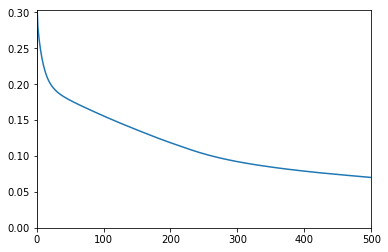

In [6]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_step,0,np.max(cost_history)])
plt.show()

In [7]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 500
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  397.027
Step:  2 Cost:  0.412235
Step:  3 Cost:  0.395985
Step:  4 Cost:  0.380679
Step:  5 Cost:  0.366233
Step:  6 Cost:  0.352576
Step:  7 Cost:  0.339642
Step:  8 Cost:  0.327377
Step:  9 Cost:  0.315732
Step:  10 Cost:  0.304662
Step:  11 Cost:  0.294128
Step:  12 Cost:  0.284096
Step:  13 Cost:  0.274534
Step:  14 Cost:  0.265413
Step:  15 Cost:  0.256707
Step:  16 Cost:  0.248392
Step:  17 Cost:  0.240447
Step:  18 Cost:  0.232851
Step:  19 Cost:  0.226108
Step:  20 Cost:  0.219734
Step:  21 Cost:  0.213612
Step:  22 Cost:  0.207732
Step:  23 Cost:  0.202085
Step:  24 Cost:  0.196662
Step:  25 Cost:  0.191454
Step:  26 Cost:  0.186452
Step:  27 Cost:  0.181648
Step:  28 Cost:  0.177034
Step:  29 Cost:  0.172603
Step:  30 Cost:  0.168347
Step:  31 Cost:  0.16426
Step:  32 Cost:  0.160335
Step:  33 Cost:  0.156565
Step:  34 Cost:  0.152945
Step:  35 Cost:  0.149468
Step:  36 Cost:  0.146128
Step:  37 Cost:  0.142921
Step:  38 Cost:  0.139841

Step:  378 Cost:  0.0651381
Step:  379 Cost:  0.0651381
Step:  380 Cost:  0.0651381
Step:  381 Cost:  0.0651381
Step:  382 Cost:  0.0651381
Step:  383 Cost:  0.0651381
Step:  384 Cost:  0.0651381
Step:  385 Cost:  0.0651381
Step:  386 Cost:  0.0651381
Step:  387 Cost:  0.0651381
Step:  388 Cost:  0.0651381
Step:  389 Cost:  0.0651381
Step:  390 Cost:  0.0651381
Step:  391 Cost:  0.0651381
Step:  392 Cost:  0.0651381
Step:  393 Cost:  0.0651381
Step:  394 Cost:  0.0651381
Step:  395 Cost:  0.0651381
Step:  396 Cost:  0.0651381
Step:  397 Cost:  0.0651381
Step:  398 Cost:  0.0651381
Step:  399 Cost:  0.0651381
Step:  400 Cost:  0.0651381
Step:  401 Cost:  0.0651381
Step:  402 Cost:  0.0651381
Step:  403 Cost:  0.0651381
Step:  404 Cost:  0.0651381
Step:  405 Cost:  0.0651381
Step:  406 Cost:  0.0651381
Step:  407 Cost:  0.0651381
Step:  408 Cost:  0.0651381
Step:  409 Cost:  0.0651381
Step:  410 Cost:  0.0651381
Step:  411 Cost:  0.0651381
Step:  412 Cost:  0.0651381
Step:  413 Cost:  0.

In [8]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
training_step = 500
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  10196.4
Step:  2 Cost:  106.978
Step:  3 Cost:  53651.0
Step:  4 Cost:  3916.34
Step:  5 Cost:  2506.48
Step:  6 Cost:  1604.17
Step:  7 Cost:  1026.69
Step:  8 Cost:  657.107
Step:  9 Cost:  420.572
Step:  10 Cost:  269.19
Step:  11 Cost:  172.305
Step:  12 Cost:  110.299
Step:  13 Cost:  70.6145
Step:  14 Cost:  45.2167
Step:  15 Cost:  28.9622
Step:  16 Cost:  18.5592
Step:  17 Cost:  11.9014
Step:  18 Cost:  7.64032
Step:  19 Cost:  4.91325
Step:  20 Cost:  3.16793
Step:  21 Cost:  2.05093
Step:  22 Cost:  1.33604
Step:  23 Cost:  0.878517
Step:  24 Cost:  0.5857
Step:  25 Cost:  0.398298
Step:  26 Cost:  0.27836
Step:  27 Cost:  0.2016
Step:  28 Cost:  0.152474
Step:  29 Cost:  0.121033
Step:  30 Cost:  0.100911
Step:  31 Cost:  0.0880326
Step:  32 Cost:  0.0797906
Step:  33 Cost:  0.0745157
Step:  34 Cost:  0.0711397
Step:  35 Cost:  0.0689791
Step:  36 Cost:  0.0675963
Step:  37 Cost:  0.0667114
Step:  38 Cost:  0.0661449
Step:  39 Cost:  

Step:  386 Cost:  0.0651381
Step:  387 Cost:  0.0651381
Step:  388 Cost:  0.0651381
Step:  389 Cost:  0.0651381
Step:  390 Cost:  0.0651381
Step:  391 Cost:  0.0651381
Step:  392 Cost:  0.0651381
Step:  393 Cost:  0.0651381
Step:  394 Cost:  0.0651381
Step:  395 Cost:  0.0651381
Step:  396 Cost:  0.0651381
Step:  397 Cost:  0.0651381
Step:  398 Cost:  0.0651381
Step:  399 Cost:  0.0651381
Step:  400 Cost:  0.0651381
Step:  401 Cost:  0.0651381
Step:  402 Cost:  0.0651381
Step:  403 Cost:  0.0651381
Step:  404 Cost:  0.0651381
Step:  405 Cost:  0.0651381
Step:  406 Cost:  0.0651381
Step:  407 Cost:  0.0651381
Step:  408 Cost:  0.0651381
Step:  409 Cost:  0.0651381
Step:  410 Cost:  0.0651381
Step:  411 Cost:  0.0651381
Step:  412 Cost:  0.0651381
Step:  413 Cost:  0.0651381
Step:  414 Cost:  0.0651381
Step:  415 Cost:  0.0651381
Step:  416 Cost:  0.0651381
Step:  417 Cost:  0.0651381
Step:  418 Cost:  0.0651381
Step:  419 Cost:  0.0651381
Step:  420 Cost:  0.0651381
Step:  421 Cost:  0.

In [9]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.001
training_step = 5000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  0.302878
Step:  2 Cost:  0.278688
Step:  3 Cost:  0.26905
Step:  4 Cost:  0.260915
Step:  5 Cost:  0.253686
Step:  6 Cost:  0.247277
Step:  7 Cost:  0.241574
Step:  8 Cost:  0.236421
Step:  9 Cost:  0.231749
Step:  10 Cost:  0.227524
Step:  11 Cost:  0.223725
Step:  12 Cost:  0.220256
Step:  13 Cost:  0.217107
Step:  14 Cost:  0.214235
Step:  15 Cost:  0.211584
Step:  16 Cost:  0.209183
Step:  17 Cost:  0.207009
Step:  18 Cost:  0.205036
Step:  19 Cost:  0.203236
Step:  20 Cost:  0.201559
Step:  21 Cost:  0.20001
Step:  22 Cost:  0.198567
Step:  23 Cost:  0.197227
Step:  24 Cost:  0.195983
Step:  25 Cost:  0.19482
Step:  26 Cost:  0.193722
Step:  27 Cost:  0.192696
Step:  28 Cost:  0.191731
Step:  29 Cost:  0.19082
Step:  30 Cost:  0.18995
Step:  31 Cost:  0.18912
Step:  32 Cost:  0.188331
Step:  33 Cost:  0.187577
Step:  34 Cost:  0.186854
Step:  35 Cost:  0.186156
Step:  36 Cost:  0.185483
Step:  37 Cost:  0.184833
Step:  38 Cost:  0.184201
Ste

Step:  360 Cost:  0.083382
Step:  361 Cost:  0.0832574
Step:  362 Cost:  0.083134
Step:  363 Cost:  0.0830116
Step:  364 Cost:  0.0828903
Step:  365 Cost:  0.0827701
Step:  366 Cost:  0.082651
Step:  367 Cost:  0.0825327
Step:  368 Cost:  0.0824155
Step:  369 Cost:  0.0822993
Step:  370 Cost:  0.082184
Step:  371 Cost:  0.0820696
Step:  372 Cost:  0.0819561
Step:  373 Cost:  0.0818429
Step:  374 Cost:  0.0817276
Step:  375 Cost:  0.0816119
Step:  376 Cost:  0.0814972
Step:  377 Cost:  0.0813834
Step:  378 Cost:  0.0812707
Step:  379 Cost:  0.081159
Step:  380 Cost:  0.0810482
Step:  381 Cost:  0.0809383
Step:  382 Cost:  0.0808291
Step:  383 Cost:  0.0807193
Step:  384 Cost:  0.0806105
Step:  385 Cost:  0.0805025
Step:  386 Cost:  0.0803947
Step:  387 Cost:  0.0802868
Step:  388 Cost:  0.0801799
Step:  389 Cost:  0.0800721
Step:  390 Cost:  0.0799654
Step:  391 Cost:  0.0798595
Step:  392 Cost:  0.0797535
Step:  393 Cost:  0.0796458
Step:  394 Cost:  0.0795393
Step:  395 Cost:  0.07943

Step:  739 Cost:  0.0550184
Step:  740 Cost:  0.0549674
Step:  741 Cost:  0.0549165
Step:  742 Cost:  0.0548648
Step:  743 Cost:  0.054812
Step:  744 Cost:  0.0547589
Step:  745 Cost:  0.0547049
Step:  746 Cost:  0.0546497
Step:  747 Cost:  0.0545943
Step:  748 Cost:  0.0545394
Step:  749 Cost:  0.0544851
Step:  750 Cost:  0.0544312
Step:  751 Cost:  0.0543778
Step:  752 Cost:  0.0543235
Step:  753 Cost:  0.0542691
Step:  754 Cost:  0.0542138
Step:  755 Cost:  0.0541555
Step:  756 Cost:  0.054098
Step:  757 Cost:  0.0540411
Step:  758 Cost:  0.0539848
Step:  759 Cost:  0.0539291
Step:  760 Cost:  0.0538739
Step:  761 Cost:  0.0538191
Step:  762 Cost:  0.0537648
Step:  763 Cost:  0.0537108
Step:  764 Cost:  0.0536573
Step:  765 Cost:  0.0536036
Step:  766 Cost:  0.0535471
Step:  767 Cost:  0.0534904
Step:  768 Cost:  0.0534323
Step:  769 Cost:  0.0533749
Step:  770 Cost:  0.053318
Step:  771 Cost:  0.0532617
Step:  772 Cost:  0.0532058
Step:  773 Cost:  0.05315
Step:  774 Cost:  0.05309

Step:  1036 Cost:  0.0348383
Step:  1037 Cost:  0.0348034
Step:  1038 Cost:  0.0347688
Step:  1039 Cost:  0.0347344
Step:  1040 Cost:  0.0347002
Step:  1041 Cost:  0.0346661
Step:  1042 Cost:  0.0346323
Step:  1043 Cost:  0.0345985
Step:  1044 Cost:  0.034565
Step:  1045 Cost:  0.0345317
Step:  1046 Cost:  0.0344985
Step:  1047 Cost:  0.0344654
Step:  1048 Cost:  0.0344325
Step:  1049 Cost:  0.0343998
Step:  1050 Cost:  0.0343672
Step:  1051 Cost:  0.0343348
Step:  1052 Cost:  0.0343024
Step:  1053 Cost:  0.0342702
Step:  1054 Cost:  0.0342382
Step:  1055 Cost:  0.0342062
Step:  1056 Cost:  0.0341744
Step:  1057 Cost:  0.0341426
Step:  1058 Cost:  0.034111
Step:  1059 Cost:  0.0340795
Step:  1060 Cost:  0.0340482
Step:  1061 Cost:  0.0340169
Step:  1062 Cost:  0.0339857
Step:  1063 Cost:  0.0339546
Step:  1064 Cost:  0.0339237
Step:  1065 Cost:  0.0338928
Step:  1066 Cost:  0.033862
Step:  1067 Cost:  0.0338313
Step:  1068 Cost:  0.0338007
Step:  1069 Cost:  0.0337701
Step:  1070 Cost:

Step:  1411 Cost:  0.0258783
Step:  1412 Cost:  0.0258605
Step:  1413 Cost:  0.0258426
Step:  1414 Cost:  0.0258248
Step:  1415 Cost:  0.025807
Step:  1416 Cost:  0.0257892
Step:  1417 Cost:  0.0257714
Step:  1418 Cost:  0.0257537
Step:  1419 Cost:  0.025736
Step:  1420 Cost:  0.0257183
Step:  1421 Cost:  0.0257007
Step:  1422 Cost:  0.025683
Step:  1423 Cost:  0.0256654
Step:  1424 Cost:  0.0256478
Step:  1425 Cost:  0.0256302
Step:  1426 Cost:  0.0256127
Step:  1427 Cost:  0.0255951
Step:  1428 Cost:  0.0255776
Step:  1429 Cost:  0.0255601
Step:  1430 Cost:  0.0255427
Step:  1431 Cost:  0.0255253
Step:  1432 Cost:  0.0255078
Step:  1433 Cost:  0.0254904
Step:  1434 Cost:  0.025473
Step:  1435 Cost:  0.0254557
Step:  1436 Cost:  0.0254383
Step:  1437 Cost:  0.025421
Step:  1438 Cost:  0.0254037
Step:  1439 Cost:  0.0253865
Step:  1440 Cost:  0.0253692
Step:  1441 Cost:  0.025352
Step:  1442 Cost:  0.0253348
Step:  1443 Cost:  0.0253176
Step:  1444 Cost:  0.0253005
Step:  1445 Cost:  0

Step:  1695 Cost:  0.0215799
Step:  1696 Cost:  0.0215671
Step:  1697 Cost:  0.0215543
Step:  1698 Cost:  0.0215415
Step:  1699 Cost:  0.0215287
Step:  1700 Cost:  0.021516
Step:  1701 Cost:  0.0215033
Step:  1702 Cost:  0.0214905
Step:  1703 Cost:  0.0214778
Step:  1704 Cost:  0.0214651
Step:  1705 Cost:  0.0214524
Step:  1706 Cost:  0.0214398
Step:  1707 Cost:  0.0214271
Step:  1708 Cost:  0.0214145
Step:  1709 Cost:  0.0214018
Step:  1710 Cost:  0.0213892
Step:  1711 Cost:  0.0213766
Step:  1712 Cost:  0.021364
Step:  1713 Cost:  0.0213514
Step:  1714 Cost:  0.0213389
Step:  1715 Cost:  0.0213263
Step:  1716 Cost:  0.0213138
Step:  1717 Cost:  0.0213013
Step:  1718 Cost:  0.0212888
Step:  1719 Cost:  0.0212763
Step:  1720 Cost:  0.0212638
Step:  1721 Cost:  0.0212513
Step:  1722 Cost:  0.0212389
Step:  1723 Cost:  0.0212264
Step:  1724 Cost:  0.021214
Step:  1725 Cost:  0.0212015
Step:  1726 Cost:  0.0211891
Step:  1727 Cost:  0.0211767
Step:  1728 Cost:  0.0211643
Step:  1729 Cost:

Step:  1981 Cost:  0.0183994
Step:  1982 Cost:  0.0183898
Step:  1983 Cost:  0.0183801
Step:  1984 Cost:  0.0183705
Step:  1985 Cost:  0.0183608
Step:  1986 Cost:  0.0183512
Step:  1987 Cost:  0.0183416
Step:  1988 Cost:  0.018332
Step:  1989 Cost:  0.0183224
Step:  1990 Cost:  0.0183128
Step:  1991 Cost:  0.0183033
Step:  1992 Cost:  0.0182937
Step:  1993 Cost:  0.0182841
Step:  1994 Cost:  0.0182746
Step:  1995 Cost:  0.0182651
Step:  1996 Cost:  0.0182555
Step:  1997 Cost:  0.018246
Step:  1998 Cost:  0.0182365
Step:  1999 Cost:  0.018227
Step:  2000 Cost:  0.0182175
Step:  2001 Cost:  0.018208
Step:  2002 Cost:  0.0181985
Step:  2003 Cost:  0.0181891
Step:  2004 Cost:  0.0181796
Step:  2005 Cost:  0.0181702
Step:  2006 Cost:  0.0181607
Step:  2007 Cost:  0.0181513
Step:  2008 Cost:  0.0181419
Step:  2009 Cost:  0.0181325
Step:  2010 Cost:  0.0181231
Step:  2011 Cost:  0.0181137
Step:  2012 Cost:  0.0181043
Step:  2013 Cost:  0.0180949
Step:  2014 Cost:  0.0180855
Step:  2015 Cost: 

Step:  2272 Cost:  0.0159181
Step:  2273 Cost:  0.0159106
Step:  2274 Cost:  0.015903
Step:  2275 Cost:  0.0158955
Step:  2276 Cost:  0.0158879
Step:  2277 Cost:  0.0158803
Step:  2278 Cost:  0.0158728
Step:  2279 Cost:  0.0158652
Step:  2280 Cost:  0.0158577
Step:  2281 Cost:  0.0158502
Step:  2282 Cost:  0.0158427
Step:  2283 Cost:  0.0158351
Step:  2284 Cost:  0.0158276
Step:  2285 Cost:  0.0158201
Step:  2286 Cost:  0.0158126
Step:  2287 Cost:  0.0158052
Step:  2288 Cost:  0.0157977
Step:  2289 Cost:  0.0157902
Step:  2290 Cost:  0.0157827
Step:  2291 Cost:  0.0157753
Step:  2292 Cost:  0.0157678
Step:  2293 Cost:  0.0157603
Step:  2294 Cost:  0.0157529
Step:  2295 Cost:  0.0157455
Step:  2296 Cost:  0.015738
Step:  2297 Cost:  0.0157306
Step:  2298 Cost:  0.0157232
Step:  2299 Cost:  0.0157158
Step:  2300 Cost:  0.0157084
Step:  2301 Cost:  0.015701
Step:  2302 Cost:  0.0156935
Step:  2303 Cost:  0.0156861
Step:  2304 Cost:  0.0156787
Step:  2305 Cost:  0.0156713
Step:  2306 Cost:

Step:  2556 Cost:  0.0139821
Step:  2557 Cost:  0.013976
Step:  2558 Cost:  0.0139699
Step:  2559 Cost:  0.0139637
Step:  2560 Cost:  0.0139576
Step:  2561 Cost:  0.0139515
Step:  2562 Cost:  0.0139454
Step:  2563 Cost:  0.0139393
Step:  2564 Cost:  0.0139332
Step:  2565 Cost:  0.0139271
Step:  2566 Cost:  0.013921
Step:  2567 Cost:  0.013915
Step:  2568 Cost:  0.0139089
Step:  2569 Cost:  0.0139028
Step:  2570 Cost:  0.0138967
Step:  2571 Cost:  0.0138907
Step:  2572 Cost:  0.0138847
Step:  2573 Cost:  0.0138786
Step:  2574 Cost:  0.0138725
Step:  2575 Cost:  0.0138665
Step:  2576 Cost:  0.0138605
Step:  2577 Cost:  0.0138544
Step:  2578 Cost:  0.0138484
Step:  2579 Cost:  0.0138424
Step:  2580 Cost:  0.0138364
Step:  2581 Cost:  0.0138304
Step:  2582 Cost:  0.0138244
Step:  2583 Cost:  0.0138183
Step:  2584 Cost:  0.0138124
Step:  2585 Cost:  0.0138063
Step:  2586 Cost:  0.0138004
Step:  2587 Cost:  0.0137944
Step:  2588 Cost:  0.0137884
Step:  2589 Cost:  0.0137824
Step:  2590 Cost:

Step:  2842 Cost:  0.0123949
Step:  2843 Cost:  0.0123898
Step:  2844 Cost:  0.0123848
Step:  2845 Cost:  0.0123797
Step:  2846 Cost:  0.0123747
Step:  2847 Cost:  0.0123696
Step:  2848 Cost:  0.0123646
Step:  2849 Cost:  0.0123596
Step:  2850 Cost:  0.0123545
Step:  2851 Cost:  0.0123495
Step:  2852 Cost:  0.0123445
Step:  2853 Cost:  0.0123395
Step:  2854 Cost:  0.0123344
Step:  2855 Cost:  0.0123294
Step:  2856 Cost:  0.0123244
Step:  2857 Cost:  0.0123194
Step:  2858 Cost:  0.0123144
Step:  2859 Cost:  0.0123094
Step:  2860 Cost:  0.0123044
Step:  2861 Cost:  0.0122994
Step:  2862 Cost:  0.0122944
Step:  2863 Cost:  0.0122894
Step:  2864 Cost:  0.0122844
Step:  2865 Cost:  0.0122795
Step:  2866 Cost:  0.0122745
Step:  2867 Cost:  0.0122696
Step:  2868 Cost:  0.0122646
Step:  2869 Cost:  0.0122596
Step:  2870 Cost:  0.0122547
Step:  2871 Cost:  0.0122497
Step:  2872 Cost:  0.0122447
Step:  2873 Cost:  0.0122398
Step:  2874 Cost:  0.0122348
Step:  2875 Cost:  0.0122299
Step:  2876 Co

Step:  3131 Cost:  0.0110625
Step:  3132 Cost:  0.0110583
Step:  3133 Cost:  0.0110541
Step:  3134 Cost:  0.01105
Step:  3135 Cost:  0.0110458
Step:  3136 Cost:  0.0110416
Step:  3137 Cost:  0.0110375
Step:  3138 Cost:  0.0110333
Step:  3139 Cost:  0.0110292
Step:  3140 Cost:  0.0110251
Step:  3141 Cost:  0.0110209
Step:  3142 Cost:  0.0110168
Step:  3143 Cost:  0.0110126
Step:  3144 Cost:  0.0110085
Step:  3145 Cost:  0.0110044
Step:  3146 Cost:  0.0110003
Step:  3147 Cost:  0.0109961
Step:  3148 Cost:  0.010992
Step:  3149 Cost:  0.0109879
Step:  3150 Cost:  0.0109838
Step:  3151 Cost:  0.0109797
Step:  3152 Cost:  0.0109756
Step:  3153 Cost:  0.0109715
Step:  3154 Cost:  0.0109673
Step:  3155 Cost:  0.0109632
Step:  3156 Cost:  0.0109591
Step:  3157 Cost:  0.010955
Step:  3158 Cost:  0.010951
Step:  3159 Cost:  0.0109469
Step:  3160 Cost:  0.0109427
Step:  3161 Cost:  0.0109387
Step:  3162 Cost:  0.0109346
Step:  3163 Cost:  0.0109305
Step:  3164 Cost:  0.0109264
Step:  3165 Cost:  

Step:  3418 Cost:  0.0099707
Step:  3419 Cost:  0.00996724
Step:  3420 Cost:  0.00996378
Step:  3421 Cost:  0.00996032
Step:  3422 Cost:  0.00995688
Step:  3423 Cost:  0.00995343
Step:  3424 Cost:  0.00994999
Step:  3425 Cost:  0.00994654
Step:  3426 Cost:  0.00994311
Step:  3427 Cost:  0.00993965
Step:  3428 Cost:  0.00993622
Step:  3429 Cost:  0.00993277
Step:  3430 Cost:  0.00992934
Step:  3431 Cost:  0.00992592
Step:  3432 Cost:  0.00992249
Step:  3433 Cost:  0.00991907
Step:  3434 Cost:  0.00991566
Step:  3435 Cost:  0.00991223
Step:  3436 Cost:  0.00990882
Step:  3437 Cost:  0.00990538
Step:  3438 Cost:  0.00990198
Step:  3439 Cost:  0.00989853
Step:  3440 Cost:  0.00989513
Step:  3441 Cost:  0.0098917
Step:  3442 Cost:  0.0098883
Step:  3443 Cost:  0.00988487
Step:  3444 Cost:  0.00988147
Step:  3445 Cost:  0.00987807
Step:  3446 Cost:  0.00987468
Step:  3447 Cost:  0.00987125
Step:  3448 Cost:  0.00986787
Step:  3449 Cost:  0.00986448
Step:  3450 Cost:  0.00986105
Step:  3451 C

Step:  3714 Cost:  0.00903354
Step:  3715 Cost:  0.00903064
Step:  3716 Cost:  0.00902775
Step:  3717 Cost:  0.00902486
Step:  3718 Cost:  0.00902201
Step:  3719 Cost:  0.00901912
Step:  3720 Cost:  0.00901624
Step:  3721 Cost:  0.00901336
Step:  3722 Cost:  0.00901049
Step:  3723 Cost:  0.00900761
Step:  3724 Cost:  0.00900473
Step:  3725 Cost:  0.00900189
Step:  3726 Cost:  0.00899903
Step:  3727 Cost:  0.00899615
Step:  3728 Cost:  0.00899328
Step:  3729 Cost:  0.00899043
Step:  3730 Cost:  0.00898758
Step:  3731 Cost:  0.00898473
Step:  3732 Cost:  0.00898187
Step:  3733 Cost:  0.00897901
Step:  3734 Cost:  0.00897615
Step:  3735 Cost:  0.00897331
Step:  3736 Cost:  0.00897047
Step:  3737 Cost:  0.00896761
Step:  3738 Cost:  0.00896477
Step:  3739 Cost:  0.00896194
Step:  3740 Cost:  0.00895911
Step:  3741 Cost:  0.00895626
Step:  3742 Cost:  0.00895343
Step:  3743 Cost:  0.00895061
Step:  3744 Cost:  0.00894776
Step:  3745 Cost:  0.00894492
Step:  3746 Cost:  0.00894209
Step:  374

Step:  4012 Cost:  0.0082424
Step:  4013 Cost:  0.00823995
Step:  4014 Cost:  0.00823753
Step:  4015 Cost:  0.0082351
Step:  4016 Cost:  0.00823267
Step:  4017 Cost:  0.00823023
Step:  4018 Cost:  0.00822781
Step:  4019 Cost:  0.0082254
Step:  4020 Cost:  0.00822298
Step:  4021 Cost:  0.00822053
Step:  4022 Cost:  0.00821811
Step:  4023 Cost:  0.00821571
Step:  4024 Cost:  0.00821329
Step:  4025 Cost:  0.00821086
Step:  4026 Cost:  0.00820845
Step:  4027 Cost:  0.00820601
Step:  4028 Cost:  0.00820362
Step:  4029 Cost:  0.00820122
Step:  4030 Cost:  0.0081988
Step:  4031 Cost:  0.0081964
Step:  4032 Cost:  0.00819396
Step:  4033 Cost:  0.00819157
Step:  4034 Cost:  0.00818917
Step:  4035 Cost:  0.00818677
Step:  4036 Cost:  0.00818438
Step:  4037 Cost:  0.00818196
Step:  4038 Cost:  0.00817957
Step:  4039 Cost:  0.00817718
Step:  4040 Cost:  0.00817478
Step:  4041 Cost:  0.00817239
Step:  4042 Cost:  0.00816998
Step:  4043 Cost:  0.0081676
Step:  4044 Cost:  0.00816522
Step:  4045 Cost

Step:  4303 Cost:  0.00759356
Step:  4304 Cost:  0.00759153
Step:  4305 Cost:  0.00758946
Step:  4306 Cost:  0.00758741
Step:  4307 Cost:  0.00758537
Step:  4308 Cost:  0.0075833
Step:  4309 Cost:  0.00758127
Step:  4310 Cost:  0.00757922
Step:  4311 Cost:  0.0075772
Step:  4312 Cost:  0.00757515
Step:  4313 Cost:  0.0075731
Step:  4314 Cost:  0.00757108
Step:  4315 Cost:  0.00756903
Step:  4316 Cost:  0.007567
Step:  4317 Cost:  0.00756496
Step:  4318 Cost:  0.00756291
Step:  4319 Cost:  0.00756088
Step:  4320 Cost:  0.00755888
Step:  4321 Cost:  0.00755682
Step:  4322 Cost:  0.0075548
Step:  4323 Cost:  0.00755278
Step:  4324 Cost:  0.00755076
Step:  4325 Cost:  0.00754873
Step:  4326 Cost:  0.00754669
Step:  4327 Cost:  0.00754468
Step:  4328 Cost:  0.00754266
Step:  4329 Cost:  0.00754065
Step:  4330 Cost:  0.00753863
Step:  4331 Cost:  0.0075366
Step:  4332 Cost:  0.00753459
Step:  4333 Cost:  0.00753258
Step:  4334 Cost:  0.00753056
Step:  4335 Cost:  0.00752855
Step:  4336 Cost:

Step:  4605 Cost:  0.00702312
Step:  4606 Cost:  0.00702135
Step:  4607 Cost:  0.00701961
Step:  4608 Cost:  0.00701785
Step:  4609 Cost:  0.00701611
Step:  4610 Cost:  0.00701438
Step:  4611 Cost:  0.00701261
Step:  4612 Cost:  0.00701087
Step:  4613 Cost:  0.00700913
Step:  4614 Cost:  0.00700737
Step:  4615 Cost:  0.00700564
Step:  4616 Cost:  0.00700391
Step:  4617 Cost:  0.00700217
Step:  4618 Cost:  0.00700042
Step:  4619 Cost:  0.00699868
Step:  4620 Cost:  0.00699696
Step:  4621 Cost:  0.00699523
Step:  4622 Cost:  0.00699348
Step:  4623 Cost:  0.00699175
Step:  4624 Cost:  0.00699003
Step:  4625 Cost:  0.00698829
Step:  4626 Cost:  0.00698656
Step:  4627 Cost:  0.00698482
Step:  4628 Cost:  0.0069831
Step:  4629 Cost:  0.00698139
Step:  4630 Cost:  0.00697967
Step:  4631 Cost:  0.00697793
Step:  4632 Cost:  0.00697622
Step:  4633 Cost:  0.00697447
Step:  4634 Cost:  0.00697276
Step:  4635 Cost:  0.00697105
Step:  4636 Cost:  0.00696933
Step:  4637 Cost:  0.0069676
Step:  4638 

Step:  4901 Cost:  0.00654351
Step:  4902 Cost:  0.00654199
Step:  4903 Cost:  0.00654048
Step:  4904 Cost:  0.00653896
Step:  4905 Cost:  0.00653747
Step:  4906 Cost:  0.00653595
Step:  4907 Cost:  0.00653445
Step:  4908 Cost:  0.00653295
Step:  4909 Cost:  0.00653145
Step:  4910 Cost:  0.00652994
Step:  4911 Cost:  0.00652842
Step:  4912 Cost:  0.00652694
Step:  4913 Cost:  0.00652544
Step:  4914 Cost:  0.00652395
Step:  4915 Cost:  0.00652243
Step:  4916 Cost:  0.00652093
Step:  4917 Cost:  0.00651944
Step:  4918 Cost:  0.00651794
Step:  4919 Cost:  0.00651645
Step:  4920 Cost:  0.00651497
Step:  4921 Cost:  0.00651347
Step:  4922 Cost:  0.00651197
Step:  4923 Cost:  0.00651047
Step:  4924 Cost:  0.00650898
Step:  4925 Cost:  0.00650749
Step:  4926 Cost:  0.006506
Step:  4927 Cost:  0.00650452
Step:  4928 Cost:  0.00650305
Step:  4929 Cost:  0.00650154
Step:  4930 Cost:  0.00650005
Step:  4931 Cost:  0.00649859
Step:  4932 Cost:  0.00649708
Step:  4933 Cost:  0.00649561
Step:  4934 

In [10]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 5000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  397.027
Step:  2 Cost:  0.412235
Step:  3 Cost:  0.395985
Step:  4 Cost:  0.380679
Step:  5 Cost:  0.366233
Step:  6 Cost:  0.352576
Step:  7 Cost:  0.339642
Step:  8 Cost:  0.327377
Step:  9 Cost:  0.315732
Step:  10 Cost:  0.304662
Step:  11 Cost:  0.294128
Step:  12 Cost:  0.284096
Step:  13 Cost:  0.274534
Step:  14 Cost:  0.265413
Step:  15 Cost:  0.256707
Step:  16 Cost:  0.248392
Step:  17 Cost:  0.240447
Step:  18 Cost:  0.232851
Step:  19 Cost:  0.226108
Step:  20 Cost:  0.219734
Step:  21 Cost:  0.213612
Step:  22 Cost:  0.207732
Step:  23 Cost:  0.202085
Step:  24 Cost:  0.196662
Step:  25 Cost:  0.191454
Step:  26 Cost:  0.186452
Step:  27 Cost:  0.181648
Step:  28 Cost:  0.177034
Step:  29 Cost:  0.172603
Step:  30 Cost:  0.168347
Step:  31 Cost:  0.16426
Step:  32 Cost:  0.160335
Step:  33 Cost:  0.156565
Step:  34 Cost:  0.152945
Step:  35 Cost:  0.149468
Step:  36 Cost:  0.146128
Step:  37 Cost:  0.142921
Step:  38 Cost:  0.139841

Step:  393 Cost:  0.0651381
Step:  394 Cost:  0.0651381
Step:  395 Cost:  0.0651381
Step:  396 Cost:  0.0651381
Step:  397 Cost:  0.0651381
Step:  398 Cost:  0.0651381
Step:  399 Cost:  0.0651381
Step:  400 Cost:  0.0651381
Step:  401 Cost:  0.0651381
Step:  402 Cost:  0.0651381
Step:  403 Cost:  0.0651381
Step:  404 Cost:  0.0651381
Step:  405 Cost:  0.0651381
Step:  406 Cost:  0.0651381
Step:  407 Cost:  0.0651381
Step:  408 Cost:  0.0651381
Step:  409 Cost:  0.0651381
Step:  410 Cost:  0.0651381
Step:  411 Cost:  0.0651381
Step:  412 Cost:  0.0651381
Step:  413 Cost:  0.0651381
Step:  414 Cost:  0.0651381
Step:  415 Cost:  0.0651381
Step:  416 Cost:  0.0651381
Step:  417 Cost:  0.0651381
Step:  418 Cost:  0.0651381
Step:  419 Cost:  0.0651381
Step:  420 Cost:  0.0651381
Step:  421 Cost:  0.0651381
Step:  422 Cost:  0.0651381
Step:  423 Cost:  0.0651381
Step:  424 Cost:  0.0651381
Step:  425 Cost:  0.0651381
Step:  426 Cost:  0.0651381
Step:  427 Cost:  0.0651381
Step:  428 Cost:  0.

Step:  691 Cost:  0.0651381
Step:  692 Cost:  0.0651381
Step:  693 Cost:  0.0651381
Step:  694 Cost:  0.0651381
Step:  695 Cost:  0.0651381
Step:  696 Cost:  0.0651381
Step:  697 Cost:  0.0651381
Step:  698 Cost:  0.0651381
Step:  699 Cost:  0.0651381
Step:  700 Cost:  0.0651381
Step:  701 Cost:  0.0651381
Step:  702 Cost:  0.0651381
Step:  703 Cost:  0.0651381
Step:  704 Cost:  0.0651381
Step:  705 Cost:  0.0651381
Step:  706 Cost:  0.0651381
Step:  707 Cost:  0.0651381
Step:  708 Cost:  0.0651381
Step:  709 Cost:  0.0651381
Step:  710 Cost:  0.0651381
Step:  711 Cost:  0.0651381
Step:  712 Cost:  0.0651381
Step:  713 Cost:  0.0651381
Step:  714 Cost:  0.0651381
Step:  715 Cost:  0.0651381
Step:  716 Cost:  0.0651381
Step:  717 Cost:  0.0651381
Step:  718 Cost:  0.0651381
Step:  719 Cost:  0.0651381
Step:  720 Cost:  0.0651381
Step:  721 Cost:  0.0651381
Step:  722 Cost:  0.0651381
Step:  723 Cost:  0.0651381
Step:  724 Cost:  0.0651381
Step:  725 Cost:  0.0651381
Step:  726 Cost:  0.

Step:  990 Cost:  0.0651381
Step:  991 Cost:  0.0651381
Step:  992 Cost:  0.0651381
Step:  993 Cost:  0.0651381
Step:  994 Cost:  0.0651381
Step:  995 Cost:  0.0651381
Step:  996 Cost:  0.0651381
Step:  997 Cost:  0.0651381
Step:  998 Cost:  0.0651381
Step:  999 Cost:  0.0651381
Step:  1000 Cost:  0.0651381
Step:  1001 Cost:  0.0651381
Step:  1002 Cost:  0.0651381
Step:  1003 Cost:  0.0651381
Step:  1004 Cost:  0.0651381
Step:  1005 Cost:  0.0651381
Step:  1006 Cost:  0.0651381
Step:  1007 Cost:  0.0651381
Step:  1008 Cost:  0.0651381
Step:  1009 Cost:  0.0651381
Step:  1010 Cost:  0.0651381
Step:  1011 Cost:  0.0651381
Step:  1012 Cost:  0.0651381
Step:  1013 Cost:  0.0651381
Step:  1014 Cost:  0.0651381
Step:  1015 Cost:  0.0651381
Step:  1016 Cost:  0.0651381
Step:  1017 Cost:  0.0651381
Step:  1018 Cost:  0.0651381
Step:  1019 Cost:  0.0651381
Step:  1020 Cost:  0.0651381
Step:  1021 Cost:  0.0651381
Step:  1022 Cost:  0.0651381
Step:  1023 Cost:  0.0651381
Step:  1024 Cost:  0.065

Step:  1287 Cost:  0.0651381
Step:  1288 Cost:  0.0651381
Step:  1289 Cost:  0.0651381
Step:  1290 Cost:  0.0651381
Step:  1291 Cost:  0.0651381
Step:  1292 Cost:  0.0651381
Step:  1293 Cost:  0.0651381
Step:  1294 Cost:  0.0651381
Step:  1295 Cost:  0.0651381
Step:  1296 Cost:  0.0651381
Step:  1297 Cost:  0.0651381
Step:  1298 Cost:  0.0651381
Step:  1299 Cost:  0.0651381
Step:  1300 Cost:  0.0651381
Step:  1301 Cost:  0.0651381
Step:  1302 Cost:  0.0651381
Step:  1303 Cost:  0.0651381
Step:  1304 Cost:  0.0651381
Step:  1305 Cost:  0.0651381
Step:  1306 Cost:  0.0651381
Step:  1307 Cost:  0.0651381
Step:  1308 Cost:  0.0651381
Step:  1309 Cost:  0.0651381
Step:  1310 Cost:  0.0651381
Step:  1311 Cost:  0.0651381
Step:  1312 Cost:  0.0651381
Step:  1313 Cost:  0.0651381
Step:  1314 Cost:  0.0651381
Step:  1315 Cost:  0.0651381
Step:  1316 Cost:  0.0651381
Step:  1317 Cost:  0.0651381
Step:  1318 Cost:  0.0651381
Step:  1319 Cost:  0.0651381
Step:  1320 Cost:  0.0651381
Step:  1321 Co

Step:  1592 Cost:  0.0651381
Step:  1593 Cost:  0.0651381
Step:  1594 Cost:  0.0651381
Step:  1595 Cost:  0.0651381
Step:  1596 Cost:  0.0651381
Step:  1597 Cost:  0.0651381
Step:  1598 Cost:  0.0651381
Step:  1599 Cost:  0.0651381
Step:  1600 Cost:  0.0651381
Step:  1601 Cost:  0.0651381
Step:  1602 Cost:  0.0651381
Step:  1603 Cost:  0.0651381
Step:  1604 Cost:  0.0651381
Step:  1605 Cost:  0.0651381
Step:  1606 Cost:  0.0651381
Step:  1607 Cost:  0.0651381
Step:  1608 Cost:  0.0651381
Step:  1609 Cost:  0.0651381
Step:  1610 Cost:  0.0651381
Step:  1611 Cost:  0.0651381
Step:  1612 Cost:  0.0651381
Step:  1613 Cost:  0.0651381
Step:  1614 Cost:  0.0651381
Step:  1615 Cost:  0.0651381
Step:  1616 Cost:  0.0651381
Step:  1617 Cost:  0.0651381
Step:  1618 Cost:  0.0651381
Step:  1619 Cost:  0.0651381
Step:  1620 Cost:  0.0651381
Step:  1621 Cost:  0.0651381
Step:  1622 Cost:  0.0651381
Step:  1623 Cost:  0.0651381
Step:  1624 Cost:  0.0651381
Step:  1625 Cost:  0.0651381
Step:  1626 Co

Step:  1894 Cost:  0.0651381
Step:  1895 Cost:  0.0651381
Step:  1896 Cost:  0.0651381
Step:  1897 Cost:  0.0651381
Step:  1898 Cost:  0.0651381
Step:  1899 Cost:  0.0651381
Step:  1900 Cost:  0.0651381
Step:  1901 Cost:  0.0651381
Step:  1902 Cost:  0.0651381
Step:  1903 Cost:  0.0651381
Step:  1904 Cost:  0.0651381
Step:  1905 Cost:  0.0651381
Step:  1906 Cost:  0.0651381
Step:  1907 Cost:  0.0651381
Step:  1908 Cost:  0.0651381
Step:  1909 Cost:  0.0651381
Step:  1910 Cost:  0.0651381
Step:  1911 Cost:  0.0651381
Step:  1912 Cost:  0.0651381
Step:  1913 Cost:  0.0651381
Step:  1914 Cost:  0.0651381
Step:  1915 Cost:  0.0651381
Step:  1916 Cost:  0.0651381
Step:  1917 Cost:  0.0651381
Step:  1918 Cost:  0.0651381
Step:  1919 Cost:  0.0651381
Step:  1920 Cost:  0.0651381
Step:  1921 Cost:  0.0651381
Step:  1922 Cost:  0.0651381
Step:  1923 Cost:  0.0651381
Step:  1924 Cost:  0.0651381
Step:  1925 Cost:  0.0651381
Step:  1926 Cost:  0.0651381
Step:  1927 Cost:  0.0651381
Step:  1928 Co

Step:  2199 Cost:  0.0651381
Step:  2200 Cost:  0.0651381
Step:  2201 Cost:  0.0651381
Step:  2202 Cost:  0.0651381
Step:  2203 Cost:  0.0651381
Step:  2204 Cost:  0.0651381
Step:  2205 Cost:  0.0651381
Step:  2206 Cost:  0.0651381
Step:  2207 Cost:  0.0651381
Step:  2208 Cost:  0.0651381
Step:  2209 Cost:  0.0651381
Step:  2210 Cost:  0.0651381
Step:  2211 Cost:  0.0651381
Step:  2212 Cost:  0.0651381
Step:  2213 Cost:  0.0651381
Step:  2214 Cost:  0.0651381
Step:  2215 Cost:  0.0651381
Step:  2216 Cost:  0.0651381
Step:  2217 Cost:  0.0651381
Step:  2218 Cost:  0.0651381
Step:  2219 Cost:  0.0651381
Step:  2220 Cost:  0.0651381
Step:  2221 Cost:  0.0651381
Step:  2222 Cost:  0.0651381
Step:  2223 Cost:  0.0651381
Step:  2224 Cost:  0.0651381
Step:  2225 Cost:  0.0651381
Step:  2226 Cost:  0.0651381
Step:  2227 Cost:  0.0651381
Step:  2228 Cost:  0.0651381
Step:  2229 Cost:  0.0651381
Step:  2230 Cost:  0.0651381
Step:  2231 Cost:  0.0651381
Step:  2232 Cost:  0.0651381
Step:  2233 Co

Step:  2498 Cost:  0.0651381
Step:  2499 Cost:  0.0651381
Step:  2500 Cost:  0.0651381
Step:  2501 Cost:  0.0651381
Step:  2502 Cost:  0.0651381
Step:  2503 Cost:  0.0651381
Step:  2504 Cost:  0.0651381
Step:  2505 Cost:  0.0651381
Step:  2506 Cost:  0.0651381
Step:  2507 Cost:  0.0651381
Step:  2508 Cost:  0.0651381
Step:  2509 Cost:  0.0651381
Step:  2510 Cost:  0.0651381
Step:  2511 Cost:  0.0651381
Step:  2512 Cost:  0.0651381
Step:  2513 Cost:  0.0651381
Step:  2514 Cost:  0.0651381
Step:  2515 Cost:  0.0651381
Step:  2516 Cost:  0.0651381
Step:  2517 Cost:  0.0651381
Step:  2518 Cost:  0.0651381
Step:  2519 Cost:  0.0651381
Step:  2520 Cost:  0.0651381
Step:  2521 Cost:  0.0651381
Step:  2522 Cost:  0.0651381
Step:  2523 Cost:  0.0651381
Step:  2524 Cost:  0.0651381
Step:  2525 Cost:  0.0651381
Step:  2526 Cost:  0.0651381
Step:  2527 Cost:  0.0651381
Step:  2528 Cost:  0.0651381
Step:  2529 Cost:  0.0651381
Step:  2530 Cost:  0.0651381
Step:  2531 Cost:  0.0651381
Step:  2532 Co

Step:  2800 Cost:  0.0651381
Step:  2801 Cost:  0.0651381
Step:  2802 Cost:  0.0651381
Step:  2803 Cost:  0.0651381
Step:  2804 Cost:  0.0651381
Step:  2805 Cost:  0.0651381
Step:  2806 Cost:  0.0651381
Step:  2807 Cost:  0.0651381
Step:  2808 Cost:  0.0651381
Step:  2809 Cost:  0.0651381
Step:  2810 Cost:  0.0651381
Step:  2811 Cost:  0.0651381
Step:  2812 Cost:  0.0651381
Step:  2813 Cost:  0.0651381
Step:  2814 Cost:  0.0651381
Step:  2815 Cost:  0.0651381
Step:  2816 Cost:  0.0651381
Step:  2817 Cost:  0.0651381
Step:  2818 Cost:  0.0651381
Step:  2819 Cost:  0.0651381
Step:  2820 Cost:  0.0651381
Step:  2821 Cost:  0.0651381
Step:  2822 Cost:  0.0651381
Step:  2823 Cost:  0.0651381
Step:  2824 Cost:  0.0651381
Step:  2825 Cost:  0.0651381
Step:  2826 Cost:  0.0651381
Step:  2827 Cost:  0.0651381
Step:  2828 Cost:  0.0651381
Step:  2829 Cost:  0.0651381
Step:  2830 Cost:  0.0651381
Step:  2831 Cost:  0.0651381
Step:  2832 Cost:  0.0651381
Step:  2833 Cost:  0.0651381
Step:  2834 Co

Step:  3104 Cost:  0.0651381
Step:  3105 Cost:  0.0651381
Step:  3106 Cost:  0.0651381
Step:  3107 Cost:  0.0651381
Step:  3108 Cost:  0.0651381
Step:  3109 Cost:  0.0651381
Step:  3110 Cost:  0.0651381
Step:  3111 Cost:  0.0651381
Step:  3112 Cost:  0.0651381
Step:  3113 Cost:  0.0651381
Step:  3114 Cost:  0.0651381
Step:  3115 Cost:  0.0651381
Step:  3116 Cost:  0.0651381
Step:  3117 Cost:  0.0651381
Step:  3118 Cost:  0.0651381
Step:  3119 Cost:  0.0651381
Step:  3120 Cost:  0.0651381
Step:  3121 Cost:  0.0651381
Step:  3122 Cost:  0.0651381
Step:  3123 Cost:  0.0651381
Step:  3124 Cost:  0.0651381
Step:  3125 Cost:  0.0651381
Step:  3126 Cost:  0.0651381
Step:  3127 Cost:  0.0651381
Step:  3128 Cost:  0.0651381
Step:  3129 Cost:  0.0651381
Step:  3130 Cost:  0.0651381
Step:  3131 Cost:  0.0651381
Step:  3132 Cost:  0.0651381
Step:  3133 Cost:  0.0651381
Step:  3134 Cost:  0.0651381
Step:  3135 Cost:  0.0651381
Step:  3136 Cost:  0.0651381
Step:  3137 Cost:  0.0651381
Step:  3138 Co

Step:  3404 Cost:  0.0651381
Step:  3405 Cost:  0.0651381
Step:  3406 Cost:  0.0651381
Step:  3407 Cost:  0.0651381
Step:  3408 Cost:  0.0651381
Step:  3409 Cost:  0.0651381
Step:  3410 Cost:  0.0651381
Step:  3411 Cost:  0.0651381
Step:  3412 Cost:  0.0651381
Step:  3413 Cost:  0.0651381
Step:  3414 Cost:  0.0651381
Step:  3415 Cost:  0.0651381
Step:  3416 Cost:  0.0651381
Step:  3417 Cost:  0.0651381
Step:  3418 Cost:  0.0651381
Step:  3419 Cost:  0.0651381
Step:  3420 Cost:  0.0651381
Step:  3421 Cost:  0.0651381
Step:  3422 Cost:  0.0651381
Step:  3423 Cost:  0.0651381
Step:  3424 Cost:  0.0651381
Step:  3425 Cost:  0.0651381
Step:  3426 Cost:  0.0651381
Step:  3427 Cost:  0.0651381
Step:  3428 Cost:  0.0651381
Step:  3429 Cost:  0.0651381
Step:  3430 Cost:  0.0651381
Step:  3431 Cost:  0.0651381
Step:  3432 Cost:  0.0651381
Step:  3433 Cost:  0.0651381
Step:  3434 Cost:  0.0651381
Step:  3435 Cost:  0.0651381
Step:  3436 Cost:  0.0651381
Step:  3437 Cost:  0.0651381
Step:  3438 Co

Step:  3706 Cost:  0.0651381
Step:  3707 Cost:  0.0651381
Step:  3708 Cost:  0.0651381
Step:  3709 Cost:  0.0651381
Step:  3710 Cost:  0.0651381
Step:  3711 Cost:  0.0651381
Step:  3712 Cost:  0.0651381
Step:  3713 Cost:  0.0651381
Step:  3714 Cost:  0.0651381
Step:  3715 Cost:  0.0651381
Step:  3716 Cost:  0.0651381
Step:  3717 Cost:  0.0651381
Step:  3718 Cost:  0.0651381
Step:  3719 Cost:  0.0651381
Step:  3720 Cost:  0.0651381
Step:  3721 Cost:  0.0651381
Step:  3722 Cost:  0.0651381
Step:  3723 Cost:  0.0651381
Step:  3724 Cost:  0.0651381
Step:  3725 Cost:  0.0651381
Step:  3726 Cost:  0.0651381
Step:  3727 Cost:  0.0651381
Step:  3728 Cost:  0.0651381
Step:  3729 Cost:  0.0651381
Step:  3730 Cost:  0.0651381
Step:  3731 Cost:  0.0651381
Step:  3732 Cost:  0.0651381
Step:  3733 Cost:  0.0651381
Step:  3734 Cost:  0.0651381
Step:  3735 Cost:  0.0651381
Step:  3736 Cost:  0.0651381
Step:  3737 Cost:  0.0651381
Step:  3738 Cost:  0.0651381
Step:  3739 Cost:  0.0651381
Step:  3740 Co

Step:  4013 Cost:  0.0651381
Step:  4014 Cost:  0.0651381
Step:  4015 Cost:  0.0651381
Step:  4016 Cost:  0.0651381
Step:  4017 Cost:  0.0651381
Step:  4018 Cost:  0.0651381
Step:  4019 Cost:  0.0651381
Step:  4020 Cost:  0.0651381
Step:  4021 Cost:  0.0651381
Step:  4022 Cost:  0.0651381
Step:  4023 Cost:  0.0651381
Step:  4024 Cost:  0.0651381
Step:  4025 Cost:  0.0651381
Step:  4026 Cost:  0.0651381
Step:  4027 Cost:  0.0651381
Step:  4028 Cost:  0.0651381
Step:  4029 Cost:  0.0651381
Step:  4030 Cost:  0.0651381
Step:  4031 Cost:  0.0651381
Step:  4032 Cost:  0.0651381
Step:  4033 Cost:  0.0651381
Step:  4034 Cost:  0.0651381
Step:  4035 Cost:  0.0651381
Step:  4036 Cost:  0.0651381
Step:  4037 Cost:  0.0651381
Step:  4038 Cost:  0.0651381
Step:  4039 Cost:  0.0651381
Step:  4040 Cost:  0.0651381
Step:  4041 Cost:  0.0651381
Step:  4042 Cost:  0.0651381
Step:  4043 Cost:  0.0651381
Step:  4044 Cost:  0.0651381
Step:  4045 Cost:  0.0651381
Step:  4046 Cost:  0.0651381
Step:  4047 Co

Step:  4312 Cost:  0.0651381
Step:  4313 Cost:  0.0651381
Step:  4314 Cost:  0.0651381
Step:  4315 Cost:  0.0651381
Step:  4316 Cost:  0.0651381
Step:  4317 Cost:  0.0651381
Step:  4318 Cost:  0.0651381
Step:  4319 Cost:  0.0651381
Step:  4320 Cost:  0.0651381
Step:  4321 Cost:  0.0651381
Step:  4322 Cost:  0.0651381
Step:  4323 Cost:  0.0651381
Step:  4324 Cost:  0.0651381
Step:  4325 Cost:  0.0651381
Step:  4326 Cost:  0.0651381
Step:  4327 Cost:  0.0651381
Step:  4328 Cost:  0.0651381
Step:  4329 Cost:  0.0651381
Step:  4330 Cost:  0.0651381
Step:  4331 Cost:  0.0651381
Step:  4332 Cost:  0.0651381
Step:  4333 Cost:  0.0651381
Step:  4334 Cost:  0.0651381
Step:  4335 Cost:  0.0651381
Step:  4336 Cost:  0.0651381
Step:  4337 Cost:  0.0651381
Step:  4338 Cost:  0.0651381
Step:  4339 Cost:  0.0651381
Step:  4340 Cost:  0.0651381
Step:  4341 Cost:  0.0651381
Step:  4342 Cost:  0.0651381
Step:  4343 Cost:  0.0651381
Step:  4344 Cost:  0.0651381
Step:  4345 Cost:  0.0651381
Step:  4346 Co

Step:  4614 Cost:  0.0651381
Step:  4615 Cost:  0.0651381
Step:  4616 Cost:  0.0651381
Step:  4617 Cost:  0.0651381
Step:  4618 Cost:  0.0651381
Step:  4619 Cost:  0.0651381
Step:  4620 Cost:  0.0651381
Step:  4621 Cost:  0.0651381
Step:  4622 Cost:  0.0651381
Step:  4623 Cost:  0.0651381
Step:  4624 Cost:  0.0651381
Step:  4625 Cost:  0.0651381
Step:  4626 Cost:  0.0651381
Step:  4627 Cost:  0.0651381
Step:  4628 Cost:  0.0651381
Step:  4629 Cost:  0.0651381
Step:  4630 Cost:  0.0651381
Step:  4631 Cost:  0.0651381
Step:  4632 Cost:  0.0651381
Step:  4633 Cost:  0.0651381
Step:  4634 Cost:  0.0651381
Step:  4635 Cost:  0.0651381
Step:  4636 Cost:  0.0651381
Step:  4637 Cost:  0.0651381
Step:  4638 Cost:  0.0651381
Step:  4639 Cost:  0.0651381
Step:  4640 Cost:  0.0651381
Step:  4641 Cost:  0.0651381
Step:  4642 Cost:  0.0651381
Step:  4643 Cost:  0.0651381
Step:  4644 Cost:  0.0651381
Step:  4645 Cost:  0.0651381
Step:  4646 Cost:  0.0651381
Step:  4647 Cost:  0.0651381
Step:  4648 Co

Step:  4910 Cost:  0.0651381
Step:  4911 Cost:  0.0651381
Step:  4912 Cost:  0.0651381
Step:  4913 Cost:  0.0651381
Step:  4914 Cost:  0.0651381
Step:  4915 Cost:  0.0651381
Step:  4916 Cost:  0.0651381
Step:  4917 Cost:  0.0651381
Step:  4918 Cost:  0.0651381
Step:  4919 Cost:  0.0651381
Step:  4920 Cost:  0.0651381
Step:  4921 Cost:  0.0651381
Step:  4922 Cost:  0.0651381
Step:  4923 Cost:  0.0651381
Step:  4924 Cost:  0.0651381
Step:  4925 Cost:  0.0651381
Step:  4926 Cost:  0.0651381
Step:  4927 Cost:  0.0651381
Step:  4928 Cost:  0.0651381
Step:  4929 Cost:  0.0651381
Step:  4930 Cost:  0.0651381
Step:  4931 Cost:  0.0651381
Step:  4932 Cost:  0.0651381
Step:  4933 Cost:  0.0651381
Step:  4934 Cost:  0.0651381
Step:  4935 Cost:  0.0651381
Step:  4936 Cost:  0.0651381
Step:  4937 Cost:  0.0651381
Step:  4938 Cost:  0.0651381
Step:  4939 Cost:  0.0651381
Step:  4940 Cost:  0.0651381
Step:  4941 Cost:  0.0651381
Step:  4942 Cost:  0.0651381
Step:  4943 Cost:  0.0651381
Step:  4944 Co

In [11]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
training_step = 5000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  10196.4
Step:  2 Cost:  106.978
Step:  3 Cost:  53651.0
Step:  4 Cost:  3916.34
Step:  5 Cost:  2506.48
Step:  6 Cost:  1604.17
Step:  7 Cost:  1026.69
Step:  8 Cost:  657.107
Step:  9 Cost:  420.572
Step:  10 Cost:  269.19
Step:  11 Cost:  172.305
Step:  12 Cost:  110.299
Step:  13 Cost:  70.6145
Step:  14 Cost:  45.2167
Step:  15 Cost:  28.9622
Step:  16 Cost:  18.5592
Step:  17 Cost:  11.9014
Step:  18 Cost:  7.64032
Step:  19 Cost:  4.91325
Step:  20 Cost:  3.16793
Step:  21 Cost:  2.05093
Step:  22 Cost:  1.33604
Step:  23 Cost:  0.878517
Step:  24 Cost:  0.5857
Step:  25 Cost:  0.398298
Step:  26 Cost:  0.27836
Step:  27 Cost:  0.2016
Step:  28 Cost:  0.152474
Step:  29 Cost:  0.121033
Step:  30 Cost:  0.100911
Step:  31 Cost:  0.0880326
Step:  32 Cost:  0.0797906
Step:  33 Cost:  0.0745157
Step:  34 Cost:  0.0711397
Step:  35 Cost:  0.0689791
Step:  36 Cost:  0.0675963
Step:  37 Cost:  0.0667114
Step:  38 Cost:  0.0661449
Step:  39 Cost:  

Step:  389 Cost:  0.0651381
Step:  390 Cost:  0.0651381
Step:  391 Cost:  0.0651381
Step:  392 Cost:  0.0651381
Step:  393 Cost:  0.0651381
Step:  394 Cost:  0.0651381
Step:  395 Cost:  0.0651381
Step:  396 Cost:  0.0651381
Step:  397 Cost:  0.0651381
Step:  398 Cost:  0.0651381
Step:  399 Cost:  0.0651381
Step:  400 Cost:  0.0651381
Step:  401 Cost:  0.0651381
Step:  402 Cost:  0.0651381
Step:  403 Cost:  0.0651381
Step:  404 Cost:  0.0651381
Step:  405 Cost:  0.0651381
Step:  406 Cost:  0.0651381
Step:  407 Cost:  0.0651381
Step:  408 Cost:  0.0651381
Step:  409 Cost:  0.0651381
Step:  410 Cost:  0.0651381
Step:  411 Cost:  0.0651381
Step:  412 Cost:  0.0651381
Step:  413 Cost:  0.0651381
Step:  414 Cost:  0.0651381
Step:  415 Cost:  0.0651381
Step:  416 Cost:  0.0651381
Step:  417 Cost:  0.0651381
Step:  418 Cost:  0.0651381
Step:  419 Cost:  0.0651381
Step:  420 Cost:  0.0651381
Step:  421 Cost:  0.0651381
Step:  422 Cost:  0.0651381
Step:  423 Cost:  0.0651381
Step:  424 Cost:  0.

Step:  684 Cost:  0.0651381
Step:  685 Cost:  0.0651381
Step:  686 Cost:  0.0651381
Step:  687 Cost:  0.0651381
Step:  688 Cost:  0.0651381
Step:  689 Cost:  0.0651381
Step:  690 Cost:  0.0651381
Step:  691 Cost:  0.0651381
Step:  692 Cost:  0.0651381
Step:  693 Cost:  0.0651381
Step:  694 Cost:  0.0651381
Step:  695 Cost:  0.0651381
Step:  696 Cost:  0.0651381
Step:  697 Cost:  0.0651381
Step:  698 Cost:  0.0651381
Step:  699 Cost:  0.0651381
Step:  700 Cost:  0.0651381
Step:  701 Cost:  0.0651381
Step:  702 Cost:  0.0651381
Step:  703 Cost:  0.0651381
Step:  704 Cost:  0.0651381
Step:  705 Cost:  0.0651381
Step:  706 Cost:  0.0651381
Step:  707 Cost:  0.0651381
Step:  708 Cost:  0.0651381
Step:  709 Cost:  0.0651381
Step:  710 Cost:  0.0651381
Step:  711 Cost:  0.0651381
Step:  712 Cost:  0.0651381
Step:  713 Cost:  0.0651381
Step:  714 Cost:  0.0651381
Step:  715 Cost:  0.0651381
Step:  716 Cost:  0.0651381
Step:  717 Cost:  0.0651381
Step:  718 Cost:  0.0651381
Step:  719 Cost:  0.

Step:  989 Cost:  0.0651381
Step:  990 Cost:  0.0651381
Step:  991 Cost:  0.0651381
Step:  992 Cost:  0.0651381
Step:  993 Cost:  0.0651381
Step:  994 Cost:  0.0651381
Step:  995 Cost:  0.0651381
Step:  996 Cost:  0.0651381
Step:  997 Cost:  0.0651381
Step:  998 Cost:  0.0651381
Step:  999 Cost:  0.0651381
Step:  1000 Cost:  0.0651381
Step:  1001 Cost:  0.0651381
Step:  1002 Cost:  0.0651381
Step:  1003 Cost:  0.0651381
Step:  1004 Cost:  0.0651381
Step:  1005 Cost:  0.0651381
Step:  1006 Cost:  0.0651381
Step:  1007 Cost:  0.0651381
Step:  1008 Cost:  0.0651381
Step:  1009 Cost:  0.0651381
Step:  1010 Cost:  0.0651381
Step:  1011 Cost:  0.0651381
Step:  1012 Cost:  0.0651381
Step:  1013 Cost:  0.0651381
Step:  1014 Cost:  0.0651381
Step:  1015 Cost:  0.0651381
Step:  1016 Cost:  0.0651381
Step:  1017 Cost:  0.0651381
Step:  1018 Cost:  0.0651381
Step:  1019 Cost:  0.0651381
Step:  1020 Cost:  0.0651381
Step:  1021 Cost:  0.0651381
Step:  1022 Cost:  0.0651381
Step:  1023 Cost:  0.0651

Step:  1288 Cost:  0.0651381
Step:  1289 Cost:  0.0651381
Step:  1290 Cost:  0.0651381
Step:  1291 Cost:  0.0651381
Step:  1292 Cost:  0.0651381
Step:  1293 Cost:  0.0651381
Step:  1294 Cost:  0.0651381
Step:  1295 Cost:  0.0651381
Step:  1296 Cost:  0.0651381
Step:  1297 Cost:  0.0651381
Step:  1298 Cost:  0.0651381
Step:  1299 Cost:  0.0651381
Step:  1300 Cost:  0.0651381
Step:  1301 Cost:  0.0651381
Step:  1302 Cost:  0.0651381
Step:  1303 Cost:  0.0651381
Step:  1304 Cost:  0.0651381
Step:  1305 Cost:  0.0651381
Step:  1306 Cost:  0.0651381
Step:  1307 Cost:  0.0651381
Step:  1308 Cost:  0.0651381
Step:  1309 Cost:  0.0651381
Step:  1310 Cost:  0.0651381
Step:  1311 Cost:  0.0651381
Step:  1312 Cost:  0.0651381
Step:  1313 Cost:  0.0651381
Step:  1314 Cost:  0.0651381
Step:  1315 Cost:  0.0651381
Step:  1316 Cost:  0.0651381
Step:  1317 Cost:  0.0651381
Step:  1318 Cost:  0.0651381
Step:  1319 Cost:  0.0651381
Step:  1320 Cost:  0.0651381
Step:  1321 Cost:  0.0651381
Step:  1322 Co

Step:  1593 Cost:  0.0651381
Step:  1594 Cost:  0.0651381
Step:  1595 Cost:  0.0651381
Step:  1596 Cost:  0.0651381
Step:  1597 Cost:  0.0651381
Step:  1598 Cost:  0.0651381
Step:  1599 Cost:  0.0651381
Step:  1600 Cost:  0.0651381
Step:  1601 Cost:  0.0651381
Step:  1602 Cost:  0.0651381
Step:  1603 Cost:  0.0651381
Step:  1604 Cost:  0.0651381
Step:  1605 Cost:  0.0651381
Step:  1606 Cost:  0.0651381
Step:  1607 Cost:  0.0651381
Step:  1608 Cost:  0.0651381
Step:  1609 Cost:  0.0651381
Step:  1610 Cost:  0.0651381
Step:  1611 Cost:  0.0651381
Step:  1612 Cost:  0.0651381
Step:  1613 Cost:  0.0651381
Step:  1614 Cost:  0.0651381
Step:  1615 Cost:  0.0651381
Step:  1616 Cost:  0.0651381
Step:  1617 Cost:  0.0651381
Step:  1618 Cost:  0.0651381
Step:  1619 Cost:  0.0651381
Step:  1620 Cost:  0.0651381
Step:  1621 Cost:  0.0651381
Step:  1622 Cost:  0.0651381
Step:  1623 Cost:  0.0651381
Step:  1624 Cost:  0.0651381
Step:  1625 Cost:  0.0651381
Step:  1626 Cost:  0.0651381
Step:  1627 Co

Step:  1889 Cost:  0.0651381
Step:  1890 Cost:  0.0651381
Step:  1891 Cost:  0.0651381
Step:  1892 Cost:  0.0651381
Step:  1893 Cost:  0.0651381
Step:  1894 Cost:  0.0651381
Step:  1895 Cost:  0.0651381
Step:  1896 Cost:  0.0651381
Step:  1897 Cost:  0.0651381
Step:  1898 Cost:  0.0651381
Step:  1899 Cost:  0.0651381
Step:  1900 Cost:  0.0651381
Step:  1901 Cost:  0.0651381
Step:  1902 Cost:  0.0651381
Step:  1903 Cost:  0.0651381
Step:  1904 Cost:  0.0651381
Step:  1905 Cost:  0.0651381
Step:  1906 Cost:  0.0651381
Step:  1907 Cost:  0.0651381
Step:  1908 Cost:  0.0651381
Step:  1909 Cost:  0.0651381
Step:  1910 Cost:  0.0651381
Step:  1911 Cost:  0.0651381
Step:  1912 Cost:  0.0651381
Step:  1913 Cost:  0.0651381
Step:  1914 Cost:  0.0651381
Step:  1915 Cost:  0.0651381
Step:  1916 Cost:  0.0651381
Step:  1917 Cost:  0.0651381
Step:  1918 Cost:  0.0651381
Step:  1919 Cost:  0.0651381
Step:  1920 Cost:  0.0651381
Step:  1921 Cost:  0.0651381
Step:  1922 Cost:  0.0651381
Step:  1923 Co

Step:  2192 Cost:  0.0651381
Step:  2193 Cost:  0.0651381
Step:  2194 Cost:  0.0651381
Step:  2195 Cost:  0.0651381
Step:  2196 Cost:  0.0651381
Step:  2197 Cost:  0.0651381
Step:  2198 Cost:  0.0651381
Step:  2199 Cost:  0.0651381
Step:  2200 Cost:  0.0651381
Step:  2201 Cost:  0.0651381
Step:  2202 Cost:  0.0651381
Step:  2203 Cost:  0.0651381
Step:  2204 Cost:  0.0651381
Step:  2205 Cost:  0.0651381
Step:  2206 Cost:  0.0651381
Step:  2207 Cost:  0.0651381
Step:  2208 Cost:  0.0651381
Step:  2209 Cost:  0.0651381
Step:  2210 Cost:  0.0651381
Step:  2211 Cost:  0.0651381
Step:  2212 Cost:  0.0651381
Step:  2213 Cost:  0.0651381
Step:  2214 Cost:  0.0651381
Step:  2215 Cost:  0.0651381
Step:  2216 Cost:  0.0651381
Step:  2217 Cost:  0.0651381
Step:  2218 Cost:  0.0651381
Step:  2219 Cost:  0.0651381
Step:  2220 Cost:  0.0651381
Step:  2221 Cost:  0.0651381
Step:  2222 Cost:  0.0651381
Step:  2223 Cost:  0.0651381
Step:  2224 Cost:  0.0651381
Step:  2225 Cost:  0.0651381
Step:  2226 Co

Step:  2490 Cost:  0.0651381
Step:  2491 Cost:  0.0651381
Step:  2492 Cost:  0.0651381
Step:  2493 Cost:  0.0651381
Step:  2494 Cost:  0.0651381
Step:  2495 Cost:  0.0651381
Step:  2496 Cost:  0.0651381
Step:  2497 Cost:  0.0651381
Step:  2498 Cost:  0.0651381
Step:  2499 Cost:  0.0651381
Step:  2500 Cost:  0.0651381
Step:  2501 Cost:  0.0651381
Step:  2502 Cost:  0.0651381
Step:  2503 Cost:  0.0651381
Step:  2504 Cost:  0.0651381
Step:  2505 Cost:  0.0651381
Step:  2506 Cost:  0.0651381
Step:  2507 Cost:  0.0651381
Step:  2508 Cost:  0.0651381
Step:  2509 Cost:  0.0651381
Step:  2510 Cost:  0.0651381
Step:  2511 Cost:  0.0651381
Step:  2512 Cost:  0.0651381
Step:  2513 Cost:  0.0651381
Step:  2514 Cost:  0.0651381
Step:  2515 Cost:  0.0651381
Step:  2516 Cost:  0.0651381
Step:  2517 Cost:  0.0651381
Step:  2518 Cost:  0.0651381
Step:  2519 Cost:  0.0651381
Step:  2520 Cost:  0.0651381
Step:  2521 Cost:  0.0651381
Step:  2522 Cost:  0.0651381
Step:  2523 Cost:  0.0651381
Step:  2524 Co

Step:  2783 Cost:  0.0651381
Step:  2784 Cost:  0.0651381
Step:  2785 Cost:  0.0651381
Step:  2786 Cost:  0.0651381
Step:  2787 Cost:  0.0651381
Step:  2788 Cost:  0.0651381
Step:  2789 Cost:  0.0651381
Step:  2790 Cost:  0.0651381
Step:  2791 Cost:  0.0651381
Step:  2792 Cost:  0.0651381
Step:  2793 Cost:  0.0651381
Step:  2794 Cost:  0.0651381
Step:  2795 Cost:  0.0651381
Step:  2796 Cost:  0.0651381
Step:  2797 Cost:  0.0651381
Step:  2798 Cost:  0.0651381
Step:  2799 Cost:  0.0651381
Step:  2800 Cost:  0.0651381
Step:  2801 Cost:  0.0651381
Step:  2802 Cost:  0.0651381
Step:  2803 Cost:  0.0651381
Step:  2804 Cost:  0.0651381
Step:  2805 Cost:  0.0651381
Step:  2806 Cost:  0.0651381
Step:  2807 Cost:  0.0651381
Step:  2808 Cost:  0.0651381
Step:  2809 Cost:  0.0651381
Step:  2810 Cost:  0.0651381
Step:  2811 Cost:  0.0651381
Step:  2812 Cost:  0.0651381
Step:  2813 Cost:  0.0651381
Step:  2814 Cost:  0.0651381
Step:  2815 Cost:  0.0651381
Step:  2816 Cost:  0.0651381
Step:  2817 Co

Step:  3085 Cost:  0.0651381
Step:  3086 Cost:  0.0651381
Step:  3087 Cost:  0.0651381
Step:  3088 Cost:  0.0651381
Step:  3089 Cost:  0.0651381
Step:  3090 Cost:  0.0651381
Step:  3091 Cost:  0.0651381
Step:  3092 Cost:  0.0651381
Step:  3093 Cost:  0.0651381
Step:  3094 Cost:  0.0651381
Step:  3095 Cost:  0.0651381
Step:  3096 Cost:  0.0651381
Step:  3097 Cost:  0.0651381
Step:  3098 Cost:  0.0651381
Step:  3099 Cost:  0.0651381
Step:  3100 Cost:  0.0651381
Step:  3101 Cost:  0.0651381
Step:  3102 Cost:  0.0651381
Step:  3103 Cost:  0.0651381
Step:  3104 Cost:  0.0651381
Step:  3105 Cost:  0.0651381
Step:  3106 Cost:  0.0651381
Step:  3107 Cost:  0.0651381
Step:  3108 Cost:  0.0651381
Step:  3109 Cost:  0.0651381
Step:  3110 Cost:  0.0651381
Step:  3111 Cost:  0.0651381
Step:  3112 Cost:  0.0651381
Step:  3113 Cost:  0.0651381
Step:  3114 Cost:  0.0651381
Step:  3115 Cost:  0.0651381
Step:  3116 Cost:  0.0651381
Step:  3117 Cost:  0.0651381
Step:  3118 Cost:  0.0651381
Step:  3119 Co

Step:  3382 Cost:  0.0651381
Step:  3383 Cost:  0.0651381
Step:  3384 Cost:  0.0651381
Step:  3385 Cost:  0.0651381
Step:  3386 Cost:  0.0651381
Step:  3387 Cost:  0.0651381
Step:  3388 Cost:  0.0651381
Step:  3389 Cost:  0.0651381
Step:  3390 Cost:  0.0651381
Step:  3391 Cost:  0.0651381
Step:  3392 Cost:  0.0651381
Step:  3393 Cost:  0.0651381
Step:  3394 Cost:  0.0651381
Step:  3395 Cost:  0.0651381
Step:  3396 Cost:  0.0651381
Step:  3397 Cost:  0.0651381
Step:  3398 Cost:  0.0651381
Step:  3399 Cost:  0.0651381
Step:  3400 Cost:  0.0651381
Step:  3401 Cost:  0.0651381
Step:  3402 Cost:  0.0651381
Step:  3403 Cost:  0.0651381
Step:  3404 Cost:  0.0651381
Step:  3405 Cost:  0.0651381
Step:  3406 Cost:  0.0651381
Step:  3407 Cost:  0.0651381
Step:  3408 Cost:  0.0651381
Step:  3409 Cost:  0.0651381
Step:  3410 Cost:  0.0651381
Step:  3411 Cost:  0.0651381
Step:  3412 Cost:  0.0651381
Step:  3413 Cost:  0.0651381
Step:  3414 Cost:  0.0651381
Step:  3415 Cost:  0.0651381
Step:  3416 Co

Step:  3680 Cost:  0.0651381
Step:  3681 Cost:  0.0651381
Step:  3682 Cost:  0.0651381
Step:  3683 Cost:  0.0651381
Step:  3684 Cost:  0.0651381
Step:  3685 Cost:  0.0651381
Step:  3686 Cost:  0.0651381
Step:  3687 Cost:  0.0651381
Step:  3688 Cost:  0.0651381
Step:  3689 Cost:  0.0651381
Step:  3690 Cost:  0.0651381
Step:  3691 Cost:  0.0651381
Step:  3692 Cost:  0.0651381
Step:  3693 Cost:  0.0651381
Step:  3694 Cost:  0.0651381
Step:  3695 Cost:  0.0651381
Step:  3696 Cost:  0.0651381
Step:  3697 Cost:  0.0651381
Step:  3698 Cost:  0.0651381
Step:  3699 Cost:  0.0651381
Step:  3700 Cost:  0.0651381
Step:  3701 Cost:  0.0651381
Step:  3702 Cost:  0.0651381
Step:  3703 Cost:  0.0651381
Step:  3704 Cost:  0.0651381
Step:  3705 Cost:  0.0651381
Step:  3706 Cost:  0.0651381
Step:  3707 Cost:  0.0651381
Step:  3708 Cost:  0.0651381
Step:  3709 Cost:  0.0651381
Step:  3710 Cost:  0.0651381
Step:  3711 Cost:  0.0651381
Step:  3712 Cost:  0.0651381
Step:  3713 Cost:  0.0651381
Step:  3714 Co

Step:  3966 Cost:  0.0651381
Step:  3967 Cost:  0.0651381
Step:  3968 Cost:  0.0651381
Step:  3969 Cost:  0.0651381
Step:  3970 Cost:  0.0651381
Step:  3971 Cost:  0.0651381
Step:  3972 Cost:  0.0651381
Step:  3973 Cost:  0.0651381
Step:  3974 Cost:  0.0651381
Step:  3975 Cost:  0.0651381
Step:  3976 Cost:  0.0651381
Step:  3977 Cost:  0.0651381
Step:  3978 Cost:  0.0651381
Step:  3979 Cost:  0.0651381
Step:  3980 Cost:  0.0651381
Step:  3981 Cost:  0.0651381
Step:  3982 Cost:  0.0651381
Step:  3983 Cost:  0.0651381
Step:  3984 Cost:  0.0651381
Step:  3985 Cost:  0.0651381
Step:  3986 Cost:  0.0651381
Step:  3987 Cost:  0.0651381
Step:  3988 Cost:  0.0651381
Step:  3989 Cost:  0.0651381
Step:  3990 Cost:  0.0651381
Step:  3991 Cost:  0.0651381
Step:  3992 Cost:  0.0651381
Step:  3993 Cost:  0.0651381
Step:  3994 Cost:  0.0651381
Step:  3995 Cost:  0.0651381
Step:  3996 Cost:  0.0651381
Step:  3997 Cost:  0.0651381
Step:  3998 Cost:  0.0651381
Step:  3999 Cost:  0.0651381
Step:  4000 Co

Step:  4270 Cost:  0.0651381
Step:  4271 Cost:  0.0651381
Step:  4272 Cost:  0.0651381
Step:  4273 Cost:  0.0651381
Step:  4274 Cost:  0.0651381
Step:  4275 Cost:  0.0651381
Step:  4276 Cost:  0.0651381
Step:  4277 Cost:  0.0651381
Step:  4278 Cost:  0.0651381
Step:  4279 Cost:  0.0651381
Step:  4280 Cost:  0.0651381
Step:  4281 Cost:  0.0651381
Step:  4282 Cost:  0.0651381
Step:  4283 Cost:  0.0651381
Step:  4284 Cost:  0.0651381
Step:  4285 Cost:  0.0651381
Step:  4286 Cost:  0.0651381
Step:  4287 Cost:  0.0651381
Step:  4288 Cost:  0.0651381
Step:  4289 Cost:  0.0651381
Step:  4290 Cost:  0.0651381
Step:  4291 Cost:  0.0651381
Step:  4292 Cost:  0.0651381
Step:  4293 Cost:  0.0651381
Step:  4294 Cost:  0.0651381
Step:  4295 Cost:  0.0651381
Step:  4296 Cost:  0.0651381
Step:  4297 Cost:  0.0651381
Step:  4298 Cost:  0.0651381
Step:  4299 Cost:  0.0651381
Step:  4300 Cost:  0.0651381
Step:  4301 Cost:  0.0651381
Step:  4302 Cost:  0.0651381
Step:  4303 Cost:  0.0651381
Step:  4304 Co

Step:  4568 Cost:  0.0651381
Step:  4569 Cost:  0.0651381
Step:  4570 Cost:  0.0651381
Step:  4571 Cost:  0.0651381
Step:  4572 Cost:  0.0651381
Step:  4573 Cost:  0.0651381
Step:  4574 Cost:  0.0651381
Step:  4575 Cost:  0.0651381
Step:  4576 Cost:  0.0651381
Step:  4577 Cost:  0.0651381
Step:  4578 Cost:  0.0651381
Step:  4579 Cost:  0.0651381
Step:  4580 Cost:  0.0651381
Step:  4581 Cost:  0.0651381
Step:  4582 Cost:  0.0651381
Step:  4583 Cost:  0.0651381
Step:  4584 Cost:  0.0651381
Step:  4585 Cost:  0.0651381
Step:  4586 Cost:  0.0651381
Step:  4587 Cost:  0.0651381
Step:  4588 Cost:  0.0651381
Step:  4589 Cost:  0.0651381
Step:  4590 Cost:  0.0651381
Step:  4591 Cost:  0.0651381
Step:  4592 Cost:  0.0651381
Step:  4593 Cost:  0.0651381
Step:  4594 Cost:  0.0651381
Step:  4595 Cost:  0.0651381
Step:  4596 Cost:  0.0651381
Step:  4597 Cost:  0.0651381
Step:  4598 Cost:  0.0651381
Step:  4599 Cost:  0.0651381
Step:  4600 Cost:  0.0651381
Step:  4601 Cost:  0.0651381
Step:  4602 Co

Step:  4864 Cost:  0.0651381
Step:  4865 Cost:  0.0651381
Step:  4866 Cost:  0.0651381
Step:  4867 Cost:  0.0651381
Step:  4868 Cost:  0.0651381
Step:  4869 Cost:  0.0651381
Step:  4870 Cost:  0.0651381
Step:  4871 Cost:  0.0651381
Step:  4872 Cost:  0.0651381
Step:  4873 Cost:  0.0651381
Step:  4874 Cost:  0.0651381
Step:  4875 Cost:  0.0651381
Step:  4876 Cost:  0.0651381
Step:  4877 Cost:  0.0651381
Step:  4878 Cost:  0.0651381
Step:  4879 Cost:  0.0651381
Step:  4880 Cost:  0.0651381
Step:  4881 Cost:  0.0651381
Step:  4882 Cost:  0.0651381
Step:  4883 Cost:  0.0651381
Step:  4884 Cost:  0.0651381
Step:  4885 Cost:  0.0651381
Step:  4886 Cost:  0.0651381
Step:  4887 Cost:  0.0651381
Step:  4888 Cost:  0.0651381
Step:  4889 Cost:  0.0651381
Step:  4890 Cost:  0.0651381
Step:  4891 Cost:  0.0651381
Step:  4892 Cost:  0.0651381
Step:  4893 Cost:  0.0651381
Step:  4894 Cost:  0.0651381
Step:  4895 Cost:  0.0651381
Step:  4896 Cost:  0.0651381
Step:  4897 Cost:  0.0651381
Step:  4898 Co

In [12]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.001
training_step = 10000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  0.302878
Step:  2 Cost:  0.278688
Step:  3 Cost:  0.26905
Step:  4 Cost:  0.260915
Step:  5 Cost:  0.253686
Step:  6 Cost:  0.247277
Step:  7 Cost:  0.241574
Step:  8 Cost:  0.236421
Step:  9 Cost:  0.231749
Step:  10 Cost:  0.227524
Step:  11 Cost:  0.223725
Step:  12 Cost:  0.220256
Step:  13 Cost:  0.217107
Step:  14 Cost:  0.214235
Step:  15 Cost:  0.211584
Step:  16 Cost:  0.209183
Step:  17 Cost:  0.207009
Step:  18 Cost:  0.205036
Step:  19 Cost:  0.203236
Step:  20 Cost:  0.201559
Step:  21 Cost:  0.20001
Step:  22 Cost:  0.198567
Step:  23 Cost:  0.197227
Step:  24 Cost:  0.195983
Step:  25 Cost:  0.19482
Step:  26 Cost:  0.193722
Step:  27 Cost:  0.192696
Step:  28 Cost:  0.191731
Step:  29 Cost:  0.19082
Step:  30 Cost:  0.18995
Step:  31 Cost:  0.18912
Step:  32 Cost:  0.188331
Step:  33 Cost:  0.187577
Step:  34 Cost:  0.186854
Step:  35 Cost:  0.186156
Step:  36 Cost:  0.185483
Step:  37 Cost:  0.184833
Step:  38 Cost:  0.184201
Ste

Step:  394 Cost:  0.0795393
Step:  395 Cost:  0.0794337
Step:  396 Cost:  0.079329
Step:  397 Cost:  0.0792243
Step:  398 Cost:  0.0791188
Step:  399 Cost:  0.0790131
Step:  400 Cost:  0.0789067
Step:  401 Cost:  0.0788014
Step:  402 Cost:  0.0786969
Step:  403 Cost:  0.0785917
Step:  404 Cost:  0.0784875
Step:  405 Cost:  0.0783844
Step:  406 Cost:  0.0782822
Step:  407 Cost:  0.0781809
Step:  408 Cost:  0.0780805
Step:  409 Cost:  0.0779809
Step:  410 Cost:  0.0778821
Step:  411 Cost:  0.0777842
Step:  412 Cost:  0.0776867
Step:  413 Cost:  0.0775887
Step:  414 Cost:  0.0774915
Step:  415 Cost:  0.0773951
Step:  416 Cost:  0.0772994
Step:  417 Cost:  0.0772046
Step:  418 Cost:  0.0771104
Step:  419 Cost:  0.0770169
Step:  420 Cost:  0.0769242
Step:  421 Cost:  0.0768321
Step:  422 Cost:  0.0767407
Step:  423 Cost:  0.0766499
Step:  424 Cost:  0.0765598
Step:  425 Cost:  0.0764704
Step:  426 Cost:  0.0763815
Step:  427 Cost:  0.0762932
Step:  428 Cost:  0.0762056
Step:  429 Cost:  0.0

Step:  702 Cost:  0.056992
Step:  703 Cost:  0.0569346
Step:  704 Cost:  0.0568777
Step:  705 Cost:  0.0568212
Step:  706 Cost:  0.0567649
Step:  707 Cost:  0.0567079
Step:  708 Cost:  0.0566514
Step:  709 Cost:  0.0565953
Step:  710 Cost:  0.0565396
Step:  711 Cost:  0.0564842
Step:  712 Cost:  0.0564292
Step:  713 Cost:  0.0563742
Step:  714 Cost:  0.0563188
Step:  715 Cost:  0.0562637
Step:  716 Cost:  0.056209
Step:  717 Cost:  0.0561546
Step:  718 Cost:  0.0561005
Step:  719 Cost:  0.0560467
Step:  720 Cost:  0.0559932
Step:  721 Cost:  0.0559401
Step:  722 Cost:  0.0558872
Step:  723 Cost:  0.0558345
Step:  724 Cost:  0.0557822
Step:  725 Cost:  0.0557301
Step:  726 Cost:  0.0556783
Step:  727 Cost:  0.0556267
Step:  728 Cost:  0.0555754
Step:  729 Cost:  0.0555243
Step:  730 Cost:  0.0554734
Step:  731 Cost:  0.0554229
Step:  732 Cost:  0.0553725
Step:  733 Cost:  0.0553224
Step:  734 Cost:  0.0552725
Step:  735 Cost:  0.0552228
Step:  736 Cost:  0.0551716
Step:  737 Cost:  0.05

Step:  1088 Cost:  0.033205
Step:  1089 Cost:  0.033176
Step:  1090 Cost:  0.033147
Step:  1091 Cost:  0.033118
Step:  1092 Cost:  0.0330892
Step:  1093 Cost:  0.0330604
Step:  1094 Cost:  0.0330316
Step:  1095 Cost:  0.0330029
Step:  1096 Cost:  0.0329743
Step:  1097 Cost:  0.0329457
Step:  1098 Cost:  0.0329172
Step:  1099 Cost:  0.0328887
Step:  1100 Cost:  0.0328603
Step:  1101 Cost:  0.0328319
Step:  1102 Cost:  0.0328036
Step:  1103 Cost:  0.0327754
Step:  1104 Cost:  0.0327472
Step:  1105 Cost:  0.032719
Step:  1106 Cost:  0.032691
Step:  1107 Cost:  0.0326629
Step:  1108 Cost:  0.0326349
Step:  1109 Cost:  0.032607
Step:  1110 Cost:  0.0325791
Step:  1111 Cost:  0.0325513
Step:  1112 Cost:  0.0325236
Step:  1113 Cost:  0.0324958
Step:  1114 Cost:  0.0324682
Step:  1115 Cost:  0.0324405
Step:  1116 Cost:  0.032413
Step:  1117 Cost:  0.0323854
Step:  1118 Cost:  0.032358
Step:  1119 Cost:  0.0323305
Step:  1120 Cost:  0.0323031
Step:  1121 Cost:  0.0322758
Step:  1122 Cost:  0.03

Step:  1375 Cost:  0.0265374
Step:  1376 Cost:  0.0265187
Step:  1377 Cost:  0.0265
Step:  1378 Cost:  0.0264814
Step:  1379 Cost:  0.0264627
Step:  1380 Cost:  0.0264441
Step:  1381 Cost:  0.0264255
Step:  1382 Cost:  0.0264069
Step:  1383 Cost:  0.0263883
Step:  1384 Cost:  0.0263698
Step:  1385 Cost:  0.0263513
Step:  1386 Cost:  0.0263328
Step:  1387 Cost:  0.0263143
Step:  1388 Cost:  0.0262959
Step:  1389 Cost:  0.0262775
Step:  1390 Cost:  0.0262591
Step:  1391 Cost:  0.0262407
Step:  1392 Cost:  0.0262224
Step:  1393 Cost:  0.0262041
Step:  1394 Cost:  0.0261858
Step:  1395 Cost:  0.0261675
Step:  1396 Cost:  0.0261493
Step:  1397 Cost:  0.026131
Step:  1398 Cost:  0.0261128
Step:  1399 Cost:  0.0260946
Step:  1400 Cost:  0.0260765
Step:  1401 Cost:  0.0260584
Step:  1402 Cost:  0.0260403
Step:  1403 Cost:  0.0260222
Step:  1404 Cost:  0.0260041
Step:  1405 Cost:  0.0259861
Step:  1406 Cost:  0.025968
Step:  1407 Cost:  0.0259501
Step:  1408 Cost:  0.0259321
Step:  1409 Cost:  

Step:  1677 Cost:  0.0218129
Step:  1678 Cost:  0.0217998
Step:  1679 Cost:  0.0217868
Step:  1680 Cost:  0.0217737
Step:  1681 Cost:  0.0217607
Step:  1682 Cost:  0.0217477
Step:  1683 Cost:  0.0217347
Step:  1684 Cost:  0.0217217
Step:  1685 Cost:  0.0217088
Step:  1686 Cost:  0.0216958
Step:  1687 Cost:  0.0216829
Step:  1688 Cost:  0.02167
Step:  1689 Cost:  0.0216571
Step:  1690 Cost:  0.0216442
Step:  1691 Cost:  0.0216313
Step:  1692 Cost:  0.0216184
Step:  1693 Cost:  0.0216056
Step:  1694 Cost:  0.0215927
Step:  1695 Cost:  0.0215799
Step:  1696 Cost:  0.0215671
Step:  1697 Cost:  0.0215543
Step:  1698 Cost:  0.0215415
Step:  1699 Cost:  0.0215287
Step:  1700 Cost:  0.021516
Step:  1701 Cost:  0.0215033
Step:  1702 Cost:  0.0214905
Step:  1703 Cost:  0.0214778
Step:  1704 Cost:  0.0214651
Step:  1705 Cost:  0.0214524
Step:  1706 Cost:  0.0214398
Step:  1707 Cost:  0.0214271
Step:  1708 Cost:  0.0214145
Step:  1709 Cost:  0.0214018
Step:  1710 Cost:  0.0213892
Step:  1711 Cost:

Step:  1976 Cost:  0.0184478
Step:  1977 Cost:  0.0184381
Step:  1978 Cost:  0.0184284
Step:  1979 Cost:  0.0184187
Step:  1980 Cost:  0.018409
Step:  1981 Cost:  0.0183994
Step:  1982 Cost:  0.0183898
Step:  1983 Cost:  0.0183801
Step:  1984 Cost:  0.0183705
Step:  1985 Cost:  0.0183608
Step:  1986 Cost:  0.0183512
Step:  1987 Cost:  0.0183416
Step:  1988 Cost:  0.018332
Step:  1989 Cost:  0.0183224
Step:  1990 Cost:  0.0183128
Step:  1991 Cost:  0.0183033
Step:  1992 Cost:  0.0182937
Step:  1993 Cost:  0.0182841
Step:  1994 Cost:  0.0182746
Step:  1995 Cost:  0.0182651
Step:  1996 Cost:  0.0182555
Step:  1997 Cost:  0.018246
Step:  1998 Cost:  0.0182365
Step:  1999 Cost:  0.018227
Step:  2000 Cost:  0.0182175
Step:  2001 Cost:  0.018208
Step:  2002 Cost:  0.0181985
Step:  2003 Cost:  0.0181891
Step:  2004 Cost:  0.0181796
Step:  2005 Cost:  0.0181702
Step:  2006 Cost:  0.0181607
Step:  2007 Cost:  0.0181513
Step:  2008 Cost:  0.0181419
Step:  2009 Cost:  0.0181325
Step:  2010 Cost:  

Step:  2273 Cost:  0.0159106
Step:  2274 Cost:  0.015903
Step:  2275 Cost:  0.0158955
Step:  2276 Cost:  0.0158879
Step:  2277 Cost:  0.0158803
Step:  2278 Cost:  0.0158728
Step:  2279 Cost:  0.0158652
Step:  2280 Cost:  0.0158577
Step:  2281 Cost:  0.0158502
Step:  2282 Cost:  0.0158427
Step:  2283 Cost:  0.0158351
Step:  2284 Cost:  0.0158276
Step:  2285 Cost:  0.0158201
Step:  2286 Cost:  0.0158126
Step:  2287 Cost:  0.0158052
Step:  2288 Cost:  0.0157977
Step:  2289 Cost:  0.0157902
Step:  2290 Cost:  0.0157827
Step:  2291 Cost:  0.0157753
Step:  2292 Cost:  0.0157678
Step:  2293 Cost:  0.0157603
Step:  2294 Cost:  0.0157529
Step:  2295 Cost:  0.0157455
Step:  2296 Cost:  0.015738
Step:  2297 Cost:  0.0157306
Step:  2298 Cost:  0.0157232
Step:  2299 Cost:  0.0157158
Step:  2300 Cost:  0.0157084
Step:  2301 Cost:  0.015701
Step:  2302 Cost:  0.0156935
Step:  2303 Cost:  0.0156861
Step:  2304 Cost:  0.0156787
Step:  2305 Cost:  0.0156713
Step:  2306 Cost:  0.0156639
Step:  2307 Cost:

Step:  2571 Cost:  0.0138907
Step:  2572 Cost:  0.0138847
Step:  2573 Cost:  0.0138786
Step:  2574 Cost:  0.0138725
Step:  2575 Cost:  0.0138665
Step:  2576 Cost:  0.0138605
Step:  2577 Cost:  0.0138544
Step:  2578 Cost:  0.0138484
Step:  2579 Cost:  0.0138424
Step:  2580 Cost:  0.0138364
Step:  2581 Cost:  0.0138304
Step:  2582 Cost:  0.0138244
Step:  2583 Cost:  0.0138183
Step:  2584 Cost:  0.0138124
Step:  2585 Cost:  0.0138063
Step:  2586 Cost:  0.0138004
Step:  2587 Cost:  0.0137944
Step:  2588 Cost:  0.0137884
Step:  2589 Cost:  0.0137824
Step:  2590 Cost:  0.0137765
Step:  2591 Cost:  0.0137705
Step:  2592 Cost:  0.0137646
Step:  2593 Cost:  0.0137586
Step:  2594 Cost:  0.0137527
Step:  2595 Cost:  0.0137467
Step:  2596 Cost:  0.0137408
Step:  2597 Cost:  0.0137348
Step:  2598 Cost:  0.0137289
Step:  2599 Cost:  0.013723
Step:  2600 Cost:  0.0137171
Step:  2601 Cost:  0.0137112
Step:  2602 Cost:  0.0137052
Step:  2603 Cost:  0.0136993
Step:  2604 Cost:  0.0136934
Step:  2605 Cos

Step:  2877 Cost:  0.0122199
Step:  2878 Cost:  0.012215
Step:  2879 Cost:  0.01221
Step:  2880 Cost:  0.0122051
Step:  2881 Cost:  0.0122001
Step:  2882 Cost:  0.0121951
Step:  2883 Cost:  0.0121902
Step:  2884 Cost:  0.0121852
Step:  2885 Cost:  0.0121803
Step:  2886 Cost:  0.0121753
Step:  2887 Cost:  0.0121704
Step:  2888 Cost:  0.0121655
Step:  2889 Cost:  0.0121606
Step:  2890 Cost:  0.0121556
Step:  2891 Cost:  0.0121507
Step:  2892 Cost:  0.0121458
Step:  2893 Cost:  0.0121409
Step:  2894 Cost:  0.012136
Step:  2895 Cost:  0.0121311
Step:  2896 Cost:  0.0121262
Step:  2897 Cost:  0.0121212
Step:  2898 Cost:  0.0121164
Step:  2899 Cost:  0.0121114
Step:  2900 Cost:  0.0121066
Step:  2901 Cost:  0.0121017
Step:  2902 Cost:  0.0120968
Step:  2903 Cost:  0.0120919
Step:  2904 Cost:  0.0120871
Step:  2905 Cost:  0.0120822
Step:  2906 Cost:  0.0120773
Step:  2907 Cost:  0.0120725
Step:  2908 Cost:  0.0120676
Step:  2909 Cost:  0.0120627
Step:  2910 Cost:  0.0120579
Step:  2911 Cost: 

Step:  3183 Cost:  0.0108494
Step:  3184 Cost:  0.0108454
Step:  3185 Cost:  0.0108413
Step:  3186 Cost:  0.0108373
Step:  3187 Cost:  0.0108333
Step:  3188 Cost:  0.0108293
Step:  3189 Cost:  0.0108253
Step:  3190 Cost:  0.0108213
Step:  3191 Cost:  0.0108173
Step:  3192 Cost:  0.0108133
Step:  3193 Cost:  0.0108093
Step:  3194 Cost:  0.0108053
Step:  3195 Cost:  0.0108013
Step:  3196 Cost:  0.0107973
Step:  3197 Cost:  0.0107933
Step:  3198 Cost:  0.0107893
Step:  3199 Cost:  0.0107854
Step:  3200 Cost:  0.0107813
Step:  3201 Cost:  0.0107774
Step:  3202 Cost:  0.0107734
Step:  3203 Cost:  0.0107694
Step:  3204 Cost:  0.0107655
Step:  3205 Cost:  0.0107615
Step:  3206 Cost:  0.0107575
Step:  3207 Cost:  0.0107535
Step:  3208 Cost:  0.0107496
Step:  3209 Cost:  0.0107456
Step:  3210 Cost:  0.0107416
Step:  3211 Cost:  0.0107377
Step:  3212 Cost:  0.0107337
Step:  3213 Cost:  0.0107298
Step:  3214 Cost:  0.0107258
Step:  3215 Cost:  0.0107218
Step:  3216 Cost:  0.0107179
Step:  3217 Co

Step:  3481 Cost:  0.00975648
Step:  3482 Cost:  0.00975312
Step:  3483 Cost:  0.0097498
Step:  3484 Cost:  0.00974645
Step:  3485 Cost:  0.00974311
Step:  3486 Cost:  0.00973979
Step:  3487 Cost:  0.00973647
Step:  3488 Cost:  0.00973312
Step:  3489 Cost:  0.00972981
Step:  3490 Cost:  0.00972649
Step:  3491 Cost:  0.00972318
Step:  3492 Cost:  0.00971984
Step:  3493 Cost:  0.00971652
Step:  3494 Cost:  0.00971323
Step:  3495 Cost:  0.00970991
Step:  3496 Cost:  0.00970661
Step:  3497 Cost:  0.00970329
Step:  3498 Cost:  0.0097
Step:  3499 Cost:  0.00969669
Step:  3500 Cost:  0.00969339
Step:  3501 Cost:  0.00969011
Step:  3502 Cost:  0.00968682
Step:  3503 Cost:  0.0096835
Step:  3504 Cost:  0.00968024
Step:  3505 Cost:  0.00967695
Step:  3506 Cost:  0.00967368
Step:  3507 Cost:  0.00967038
Step:  3508 Cost:  0.00966708
Step:  3509 Cost:  0.00966384
Step:  3510 Cost:  0.00966054
Step:  3511 Cost:  0.00965726
Step:  3512 Cost:  0.009654
Step:  3513 Cost:  0.00965073
Step:  3514 Cost: 

Step:  3786 Cost:  0.00883007
Step:  3787 Cost:  0.0088273
Step:  3788 Cost:  0.00882454
Step:  3789 Cost:  0.00882177
Step:  3790 Cost:  0.008819
Step:  3791 Cost:  0.00881625
Step:  3792 Cost:  0.00881348
Step:  3793 Cost:  0.00881073
Step:  3794 Cost:  0.00880797
Step:  3795 Cost:  0.0088052
Step:  3796 Cost:  0.00880246
Step:  3797 Cost:  0.00879972
Step:  3798 Cost:  0.00879696
Step:  3799 Cost:  0.00879421
Step:  3800 Cost:  0.00879147
Step:  3801 Cost:  0.00878872
Step:  3802 Cost:  0.00878599
Step:  3803 Cost:  0.00878323
Step:  3804 Cost:  0.0087805
Step:  3805 Cost:  0.0087778
Step:  3806 Cost:  0.00877504
Step:  3807 Cost:  0.00877231
Step:  3808 Cost:  0.00876958
Step:  3809 Cost:  0.00876684
Step:  3810 Cost:  0.00876414
Step:  3811 Cost:  0.00876138
Step:  3812 Cost:  0.00875865
Step:  3813 Cost:  0.00875593
Step:  3814 Cost:  0.0087532
Step:  3815 Cost:  0.00875046
Step:  3816 Cost:  0.00874773
Step:  3817 Cost:  0.00874501
Step:  3818 Cost:  0.0087423
Step:  3819 Cost: 

Step:  4083 Cost:  0.00807333
Step:  4084 Cost:  0.008071
Step:  4085 Cost:  0.00806869
Step:  4086 Cost:  0.00806636
Step:  4087 Cost:  0.00806405
Step:  4088 Cost:  0.00806172
Step:  4089 Cost:  0.00805939
Step:  4090 Cost:  0.00805708
Step:  4091 Cost:  0.00805477
Step:  4092 Cost:  0.00805247
Step:  4093 Cost:  0.00805014
Step:  4094 Cost:  0.00804783
Step:  4095 Cost:  0.00804554
Step:  4096 Cost:  0.00804323
Step:  4097 Cost:  0.00804093
Step:  4098 Cost:  0.00803862
Step:  4099 Cost:  0.00803631
Step:  4100 Cost:  0.00803401
Step:  4101 Cost:  0.00803172
Step:  4102 Cost:  0.00802943
Step:  4103 Cost:  0.00802711
Step:  4104 Cost:  0.00802482
Step:  4105 Cost:  0.00802252
Step:  4106 Cost:  0.00802025
Step:  4107 Cost:  0.00801796
Step:  4108 Cost:  0.00801564
Step:  4109 Cost:  0.00801337
Step:  4110 Cost:  0.00801109
Step:  4111 Cost:  0.00800881
Step:  4112 Cost:  0.00800654
Step:  4113 Cost:  0.00800422
Step:  4114 Cost:  0.00800196
Step:  4115 Cost:  0.00799968
Step:  4116 

Step:  4381 Cost:  0.00743745
Step:  4382 Cost:  0.00743547
Step:  4383 Cost:  0.00743354
Step:  4384 Cost:  0.00743159
Step:  4385 Cost:  0.00742966
Step:  4386 Cost:  0.0074277
Step:  4387 Cost:  0.00742575
Step:  4388 Cost:  0.00742381
Step:  4389 Cost:  0.00742185
Step:  4390 Cost:  0.00741992
Step:  4391 Cost:  0.007418
Step:  4392 Cost:  0.00741606
Step:  4393 Cost:  0.00741411
Step:  4394 Cost:  0.00741217
Step:  4395 Cost:  0.00741025
Step:  4396 Cost:  0.00740829
Step:  4397 Cost:  0.00740638
Step:  4398 Cost:  0.00740445
Step:  4399 Cost:  0.00740252
Step:  4400 Cost:  0.00740059
Step:  4401 Cost:  0.00739865
Step:  4402 Cost:  0.00739674
Step:  4403 Cost:  0.00739479
Step:  4404 Cost:  0.00739288
Step:  4405 Cost:  0.00739096
Step:  4406 Cost:  0.00738904
Step:  4407 Cost:  0.00738712
Step:  4408 Cost:  0.0073852
Step:  4409 Cost:  0.00738329
Step:  4410 Cost:  0.00738135
Step:  4411 Cost:  0.00737945
Step:  4412 Cost:  0.00737754
Step:  4413 Cost:  0.00737563
Step:  4414 Co

Step:  4687 Cost:  0.00688305
Step:  4688 Cost:  0.0068814
Step:  4689 Cost:  0.00687974
Step:  4690 Cost:  0.00687805
Step:  4691 Cost:  0.0068764
Step:  4692 Cost:  0.00687476
Step:  4693 Cost:  0.00687311
Step:  4694 Cost:  0.00687143
Step:  4695 Cost:  0.00686978
Step:  4696 Cost:  0.00686811
Step:  4697 Cost:  0.00686647
Step:  4698 Cost:  0.00686482
Step:  4699 Cost:  0.00686315
Step:  4700 Cost:  0.00686151
Step:  4701 Cost:  0.00685986
Step:  4702 Cost:  0.0068582
Step:  4703 Cost:  0.00685656
Step:  4704 Cost:  0.00685492
Step:  4705 Cost:  0.00685325
Step:  4706 Cost:  0.00685162
Step:  4707 Cost:  0.00684999
Step:  4708 Cost:  0.00684832
Step:  4709 Cost:  0.00684669
Step:  4710 Cost:  0.00684505
Step:  4711 Cost:  0.0068434
Step:  4712 Cost:  0.00684178
Step:  4713 Cost:  0.00684013
Step:  4714 Cost:  0.00683848
Step:  4715 Cost:  0.00683685
Step:  4716 Cost:  0.00683523
Step:  4717 Cost:  0.00683357
Step:  4718 Cost:  0.00683195
Step:  4719 Cost:  0.00683033
Step:  4720 Co

Step:  4985 Cost:  0.00641953
Step:  4986 Cost:  0.00641809
Step:  4987 Cost:  0.00641664
Step:  4988 Cost:  0.00641519
Step:  4989 Cost:  0.00641376
Step:  4990 Cost:  0.00641234
Step:  4991 Cost:  0.00641089
Step:  4992 Cost:  0.00640945
Step:  4993 Cost:  0.00640802
Step:  4994 Cost:  0.00640658
Step:  4995 Cost:  0.00640515
Step:  4996 Cost:  0.00640371
Step:  4997 Cost:  0.00640229
Step:  4998 Cost:  0.00640085
Step:  4999 Cost:  0.00639943
Step:  5000 Cost:  0.006398
Step:  5001 Cost:  0.00639658
Step:  5002 Cost:  0.00639514
Step:  5003 Cost:  0.00639372
Step:  5004 Cost:  0.00639229
Step:  5005 Cost:  0.00639086
Step:  5006 Cost:  0.00638944
Step:  5007 Cost:  0.006388
Step:  5008 Cost:  0.0063866
Step:  5009 Cost:  0.00638516
Step:  5010 Cost:  0.00638376
Step:  5011 Cost:  0.00638233
Step:  5012 Cost:  0.00638091
Step:  5013 Cost:  0.00637947
Step:  5014 Cost:  0.00637804
Step:  5015 Cost:  0.00637663
Step:  5016 Cost:  0.00637522
Step:  5017 Cost:  0.0063738
Step:  5018 Cost

Step:  5274 Cost:  0.00603218
Step:  5275 Cost:  0.00603093
Step:  5276 Cost:  0.00602967
Step:  5277 Cost:  0.00602841
Step:  5278 Cost:  0.00602716
Step:  5279 Cost:  0.0060259
Step:  5280 Cost:  0.00602465
Step:  5281 Cost:  0.00602339
Step:  5282 Cost:  0.00602214
Step:  5283 Cost:  0.00602089
Step:  5284 Cost:  0.00601963
Step:  5285 Cost:  0.00601839
Step:  5286 Cost:  0.00601713
Step:  5287 Cost:  0.00601589
Step:  5288 Cost:  0.00601464
Step:  5289 Cost:  0.00601338
Step:  5290 Cost:  0.00601214
Step:  5291 Cost:  0.00601088
Step:  5292 Cost:  0.00600965
Step:  5293 Cost:  0.00600839
Step:  5294 Cost:  0.00600717
Step:  5295 Cost:  0.00600591
Step:  5296 Cost:  0.00600469
Step:  5297 Cost:  0.00600342
Step:  5298 Cost:  0.00600219
Step:  5299 Cost:  0.00600095
Step:  5300 Cost:  0.00599971
Step:  5301 Cost:  0.00599847
Step:  5302 Cost:  0.00599722
Step:  5303 Cost:  0.00599599
Step:  5304 Cost:  0.00599474
Step:  5305 Cost:  0.00599351
Step:  5306 Cost:  0.00599227
Step:  5307

Step:  5578 Cost:  0.00567544
Step:  5579 Cost:  0.00567433
Step:  5580 Cost:  0.00567325
Step:  5581 Cost:  0.00567215
Step:  5582 Cost:  0.00567105
Step:  5583 Cost:  0.00566996
Step:  5584 Cost:  0.00566887
Step:  5585 Cost:  0.00566778
Step:  5586 Cost:  0.00566668
Step:  5587 Cost:  0.0056656
Step:  5588 Cost:  0.0056645
Step:  5589 Cost:  0.00566342
Step:  5590 Cost:  0.00566232
Step:  5591 Cost:  0.00566124
Step:  5592 Cost:  0.00566014
Step:  5593 Cost:  0.00565907
Step:  5594 Cost:  0.00565797
Step:  5595 Cost:  0.00565688
Step:  5596 Cost:  0.00565579
Step:  5597 Cost:  0.00565472
Step:  5598 Cost:  0.00565362
Step:  5599 Cost:  0.00565254
Step:  5600 Cost:  0.00565146
Step:  5601 Cost:  0.00565038
Step:  5602 Cost:  0.00564928
Step:  5603 Cost:  0.00564818
Step:  5604 Cost:  0.00564711
Step:  5605 Cost:  0.00564602
Step:  5606 Cost:  0.00564494
Step:  5607 Cost:  0.00564386
Step:  5608 Cost:  0.00564279
Step:  5609 Cost:  0.0056417
Step:  5610 Cost:  0.00564063
Step:  5611 C

Step:  5875 Cost:  0.00537303
Step:  5876 Cost:  0.0053721
Step:  5877 Cost:  0.00537115
Step:  5878 Cost:  0.00537022
Step:  5879 Cost:  0.00536927
Step:  5880 Cost:  0.00536833
Step:  5881 Cost:  0.00536738
Step:  5882 Cost:  0.00536643
Step:  5883 Cost:  0.00536548
Step:  5884 Cost:  0.00536454
Step:  5885 Cost:  0.0053636
Step:  5886 Cost:  0.00536267
Step:  5887 Cost:  0.00536173
Step:  5888 Cost:  0.00536079
Step:  5889 Cost:  0.00535986
Step:  5890 Cost:  0.00535891
Step:  5891 Cost:  0.00535796
Step:  5892 Cost:  0.00535704
Step:  5893 Cost:  0.00535609
Step:  5894 Cost:  0.00535516
Step:  5895 Cost:  0.00535423
Step:  5896 Cost:  0.0053533
Step:  5897 Cost:  0.00535236
Step:  5898 Cost:  0.00535144
Step:  5899 Cost:  0.00535048
Step:  5900 Cost:  0.00534957
Step:  5901 Cost:  0.00534862
Step:  5902 Cost:  0.00534768
Step:  5903 Cost:  0.00534675
Step:  5904 Cost:  0.00534583
Step:  5905 Cost:  0.00534489
Step:  5906 Cost:  0.00534396
Step:  5907 Cost:  0.00534304
Step:  5908 C

Step:  6181 Cost:  0.00510345
Step:  6182 Cost:  0.00510262
Step:  6183 Cost:  0.00510181
Step:  6184 Cost:  0.00510098
Step:  6185 Cost:  0.00510016
Step:  6186 Cost:  0.00509934
Step:  6187 Cost:  0.00509852
Step:  6188 Cost:  0.0050977
Step:  6189 Cost:  0.0050969
Step:  6190 Cost:  0.00509607
Step:  6191 Cost:  0.00509525
Step:  6192 Cost:  0.00509443
Step:  6193 Cost:  0.00509361
Step:  6194 Cost:  0.0050928
Step:  6195 Cost:  0.00509197
Step:  6196 Cost:  0.00509117
Step:  6197 Cost:  0.00509035
Step:  6198 Cost:  0.00508954
Step:  6199 Cost:  0.00508873
Step:  6200 Cost:  0.0050879
Step:  6201 Cost:  0.00508708
Step:  6202 Cost:  0.00508628
Step:  6203 Cost:  0.00508546
Step:  6204 Cost:  0.00508466
Step:  6205 Cost:  0.00508384
Step:  6206 Cost:  0.00508304
Step:  6207 Cost:  0.00508223
Step:  6208 Cost:  0.00508142
Step:  6209 Cost:  0.0050806
Step:  6210 Cost:  0.00507979
Step:  6211 Cost:  0.00507898
Step:  6212 Cost:  0.00507818
Step:  6213 Cost:  0.00507736
Step:  6214 Cos

Step:  6466 Cost:  0.00488309
Step:  6467 Cost:  0.00488235
Step:  6468 Cost:  0.00488161
Step:  6469 Cost:  0.00488088
Step:  6470 Cost:  0.00488014
Step:  6471 Cost:  0.00487941
Step:  6472 Cost:  0.00487868
Step:  6473 Cost:  0.00487795
Step:  6474 Cost:  0.00487722
Step:  6475 Cost:  0.00487646
Step:  6476 Cost:  0.00487576
Step:  6477 Cost:  0.00487501
Step:  6478 Cost:  0.00487429
Step:  6479 Cost:  0.00487356
Step:  6480 Cost:  0.00487283
Step:  6481 Cost:  0.0048721
Step:  6482 Cost:  0.00487137
Step:  6483 Cost:  0.00487063
Step:  6484 Cost:  0.00486991
Step:  6485 Cost:  0.00486918
Step:  6486 Cost:  0.00486845
Step:  6487 Cost:  0.00486773
Step:  6488 Cost:  0.00486699
Step:  6489 Cost:  0.00486627
Step:  6490 Cost:  0.00486555
Step:  6491 Cost:  0.00486481
Step:  6492 Cost:  0.00486411
Step:  6493 Cost:  0.00486337
Step:  6494 Cost:  0.00486264
Step:  6495 Cost:  0.00486192
Step:  6496 Cost:  0.0048612
Step:  6497 Cost:  0.00486046
Step:  6498 Cost:  0.00485976
Step:  6499 

Step:  6769 Cost:  0.00467467
Step:  6770 Cost:  0.00467403
Step:  6771 Cost:  0.00467337
Step:  6772 Cost:  0.00467273
Step:  6773 Cost:  0.00467208
Step:  6774 Cost:  0.00467143
Step:  6775 Cost:  0.0046708
Step:  6776 Cost:  0.00467016
Step:  6777 Cost:  0.0046695
Step:  6778 Cost:  0.00466886
Step:  6779 Cost:  0.00466821
Step:  6780 Cost:  0.00466758
Step:  6781 Cost:  0.00466692
Step:  6782 Cost:  0.00466629
Step:  6783 Cost:  0.00466564
Step:  6784 Cost:  0.004665
Step:  6785 Cost:  0.00466435
Step:  6786 Cost:  0.00466372
Step:  6787 Cost:  0.00466307
Step:  6788 Cost:  0.00466244
Step:  6789 Cost:  0.00466179
Step:  6790 Cost:  0.00466116
Step:  6791 Cost:  0.00466052
Step:  6792 Cost:  0.00465986
Step:  6793 Cost:  0.00465923
Step:  6794 Cost:  0.0046586
Step:  6795 Cost:  0.00465794
Step:  6796 Cost:  0.00465731
Step:  6797 Cost:  0.00465667
Step:  6798 Cost:  0.00465602
Step:  6799 Cost:  0.00465539
Step:  6800 Cost:  0.00465475
Step:  6801 Cost:  0.0046541
Step:  6802 Cost

Step:  7073 Cost:  0.00448866
Step:  7074 Cost:  0.00448809
Step:  7075 Cost:  0.00448751
Step:  7076 Cost:  0.00448694
Step:  7077 Cost:  0.00448635
Step:  7078 Cost:  0.00448577
Step:  7079 Cost:  0.00448521
Step:  7080 Cost:  0.00448463
Step:  7081 Cost:  0.00448405
Step:  7082 Cost:  0.00448347
Step:  7083 Cost:  0.0044829
Step:  7084 Cost:  0.00448232
Step:  7085 Cost:  0.00448174
Step:  7086 Cost:  0.00448118
Step:  7087 Cost:  0.00448059
Step:  7088 Cost:  0.00448001
Step:  7089 Cost:  0.00447945
Step:  7090 Cost:  0.00447887
Step:  7091 Cost:  0.00447829
Step:  7092 Cost:  0.00447772
Step:  7093 Cost:  0.00447715
Step:  7094 Cost:  0.00447658
Step:  7095 Cost:  0.00447599
Step:  7096 Cost:  0.00447542
Step:  7097 Cost:  0.00447485
Step:  7098 Cost:  0.00447427
Step:  7099 Cost:  0.00447372
Step:  7100 Cost:  0.00447313
Step:  7101 Cost:  0.00447255
Step:  7102 Cost:  0.004472
Step:  7103 Cost:  0.00447142
Step:  7104 Cost:  0.00447083
Step:  7105 Cost:  0.00447028
Step:  7106 C

Step:  7363 Cost:  0.00432982
Step:  7364 Cost:  0.00432929
Step:  7365 Cost:  0.00432879
Step:  7366 Cost:  0.00432826
Step:  7367 Cost:  0.00432775
Step:  7368 Cost:  0.00432723
Step:  7369 Cost:  0.0043267
Step:  7370 Cost:  0.00432618
Step:  7371 Cost:  0.00432568
Step:  7372 Cost:  0.00432515
Step:  7373 Cost:  0.00432462
Step:  7374 Cost:  0.00432412
Step:  7375 Cost:  0.0043236
Step:  7376 Cost:  0.00432307
Step:  7377 Cost:  0.00432256
Step:  7378 Cost:  0.00432204
Step:  7379 Cost:  0.00432152
Step:  7380 Cost:  0.00432101
Step:  7381 Cost:  0.00432049
Step:  7382 Cost:  0.00431998
Step:  7383 Cost:  0.00431946
Step:  7384 Cost:  0.00431893
Step:  7385 Cost:  0.00431843
Step:  7386 Cost:  0.00431791
Step:  7387 Cost:  0.0043174
Step:  7388 Cost:  0.00431689
Step:  7389 Cost:  0.00431636
Step:  7390 Cost:  0.00431583
Step:  7391 Cost:  0.00431533
Step:  7392 Cost:  0.0043148
Step:  7393 Cost:  0.00431429
Step:  7394 Cost:  0.00431377
Step:  7395 Cost:  0.00431326
Step:  7396 Co

Step:  7661 Cost:  0.00418222
Step:  7662 Cost:  0.00418175
Step:  7663 Cost:  0.00418129
Step:  7664 Cost:  0.00418082
Step:  7665 Cost:  0.00418035
Step:  7666 Cost:  0.00417988
Step:  7667 Cost:  0.00417942
Step:  7668 Cost:  0.00417897
Step:  7669 Cost:  0.0041785
Step:  7670 Cost:  0.00417804
Step:  7671 Cost:  0.00417757
Step:  7672 Cost:  0.00417711
Step:  7673 Cost:  0.00417664
Step:  7674 Cost:  0.00417617
Step:  7675 Cost:  0.00417572
Step:  7676 Cost:  0.00417525
Step:  7677 Cost:  0.00417478
Step:  7678 Cost:  0.00417431
Step:  7679 Cost:  0.00417386
Step:  7680 Cost:  0.0041734
Step:  7681 Cost:  0.00417293
Step:  7682 Cost:  0.00417246
Step:  7683 Cost:  0.004172
Step:  7684 Cost:  0.00417154
Step:  7685 Cost:  0.00417109
Step:  7686 Cost:  0.00417063
Step:  7687 Cost:  0.00417015
Step:  7688 Cost:  0.0041697
Step:  7689 Cost:  0.00416923
Step:  7690 Cost:  0.00416876
Step:  7691 Cost:  0.0041683
Step:  7692 Cost:  0.00416784
Step:  7693 Cost:  0.00416739
Step:  7694 Cost

Step:  7962 Cost:  0.00404899
Step:  7963 Cost:  0.00404858
Step:  7964 Cost:  0.00404814
Step:  7965 Cost:  0.00404771
Step:  7966 Cost:  0.0040473
Step:  7967 Cost:  0.00404687
Step:  7968 Cost:  0.00404644
Step:  7969 Cost:  0.00404603
Step:  7970 Cost:  0.0040456
Step:  7971 Cost:  0.00404517
Step:  7972 Cost:  0.00404476
Step:  7973 Cost:  0.00404434
Step:  7974 Cost:  0.00404391
Step:  7975 Cost:  0.00404349
Step:  7976 Cost:  0.00404305
Step:  7977 Cost:  0.00404265
Step:  7978 Cost:  0.00404222
Step:  7979 Cost:  0.00404179
Step:  7980 Cost:  0.00404138
Step:  7981 Cost:  0.00404095
Step:  7982 Cost:  0.00404054
Step:  7983 Cost:  0.00404012
Step:  7984 Cost:  0.00403969
Step:  7985 Cost:  0.00403926
Step:  7986 Cost:  0.00403885
Step:  7987 Cost:  0.00403842
Step:  7988 Cost:  0.004038
Step:  7989 Cost:  0.00403758
Step:  7990 Cost:  0.00403716
Step:  7991 Cost:  0.00403674
Step:  7992 Cost:  0.00403631
Step:  7993 Cost:  0.00403591
Step:  7994 Cost:  0.00403548
Step:  7995 Co

Step:  8254 Cost:  0.00393048
Step:  8255 Cost:  0.00393011
Step:  8256 Cost:  0.00392971
Step:  8257 Cost:  0.00392931
Step:  8258 Cost:  0.00392894
Step:  8259 Cost:  0.00392855
Step:  8260 Cost:  0.00392815
Step:  8261 Cost:  0.00392776
Step:  8262 Cost:  0.00392738
Step:  8263 Cost:  0.00392699
Step:  8264 Cost:  0.0039266
Step:  8265 Cost:  0.00392621
Step:  8266 Cost:  0.00392583
Step:  8267 Cost:  0.00392544
Step:  8268 Cost:  0.00392505
Step:  8269 Cost:  0.00392466
Step:  8270 Cost:  0.0039243
Step:  8271 Cost:  0.0039239
Step:  8272 Cost:  0.0039235
Step:  8273 Cost:  0.00392313
Step:  8274 Cost:  0.00392273
Step:  8275 Cost:  0.00392234
Step:  8276 Cost:  0.00392198
Step:  8277 Cost:  0.00392157
Step:  8278 Cost:  0.00392119
Step:  8279 Cost:  0.00392081
Step:  8280 Cost:  0.00392041
Step:  8281 Cost:  0.00392004
Step:  8282 Cost:  0.00391964
Step:  8283 Cost:  0.00391925
Step:  8284 Cost:  0.00391888
Step:  8285 Cost:  0.00391849
Step:  8286 Cost:  0.0039181
Step:  8287 Cos

Step:  8549 Cost:  0.00382148
Step:  8550 Cost:  0.00382114
Step:  8551 Cost:  0.00382077
Step:  8552 Cost:  0.00382043
Step:  8553 Cost:  0.00382008
Step:  8554 Cost:  0.00381971
Step:  8555 Cost:  0.00381939
Step:  8556 Cost:  0.00381903
Step:  8557 Cost:  0.00381868
Step:  8558 Cost:  0.00381833
Step:  8559 Cost:  0.00381797
Step:  8560 Cost:  0.00381764
Step:  8561 Cost:  0.00381729
Step:  8562 Cost:  0.00381692
Step:  8563 Cost:  0.00381658
Step:  8564 Cost:  0.00381624
Step:  8565 Cost:  0.0038159
Step:  8566 Cost:  0.00381554
Step:  8567 Cost:  0.00381519
Step:  8568 Cost:  0.00381485
Step:  8569 Cost:  0.00381449
Step:  8570 Cost:  0.00381414
Step:  8571 Cost:  0.00381379
Step:  8572 Cost:  0.00381345
Step:  8573 Cost:  0.00381311
Step:  8574 Cost:  0.00381276
Step:  8575 Cost:  0.00381241
Step:  8576 Cost:  0.00381206
Step:  8577 Cost:  0.00381171
Step:  8578 Cost:  0.00381136
Step:  8579 Cost:  0.00381102
Step:  8580 Cost:  0.00381067
Step:  8581 Cost:  0.00381032
Step:  8582

Step:  8854 Cost:  0.00371974
Step:  8855 Cost:  0.00371942
Step:  8856 Cost:  0.00371911
Step:  8857 Cost:  0.00371879
Step:  8858 Cost:  0.00371847
Step:  8859 Cost:  0.00371814
Step:  8860 Cost:  0.00371784
Step:  8861 Cost:  0.00371751
Step:  8862 Cost:  0.00371718
Step:  8863 Cost:  0.00371688
Step:  8864 Cost:  0.00371655
Step:  8865 Cost:  0.00371623
Step:  8866 Cost:  0.00371593
Step:  8867 Cost:  0.0037156
Step:  8868 Cost:  0.00371528
Step:  8869 Cost:  0.00371498
Step:  8870 Cost:  0.00371465
Step:  8871 Cost:  0.00371433
Step:  8872 Cost:  0.00371401
Step:  8873 Cost:  0.0037137
Step:  8874 Cost:  0.00371338
Step:  8875 Cost:  0.00371307
Step:  8876 Cost:  0.00371276
Step:  8877 Cost:  0.00371244
Step:  8878 Cost:  0.00371213
Step:  8879 Cost:  0.00371181
Step:  8880 Cost:  0.0037115
Step:  8881 Cost:  0.00371118
Step:  8882 Cost:  0.00371086
Step:  8883 Cost:  0.00371055
Step:  8884 Cost:  0.00371023
Step:  8885 Cost:  0.00370991
Step:  8886 Cost:  0.0037096
Step:  8887 Co

Step:  9153 Cost:  0.00362866
Step:  9154 Cost:  0.00362837
Step:  9155 Cost:  0.00362807
Step:  9156 Cost:  0.0036278
Step:  9157 Cost:  0.0036275
Step:  9158 Cost:  0.0036272
Step:  9159 Cost:  0.00362692
Step:  9160 Cost:  0.00362662
Step:  9161 Cost:  0.00362633
Step:  9162 Cost:  0.00362605
Step:  9163 Cost:  0.00362575
Step:  9164 Cost:  0.00362547
Step:  9165 Cost:  0.00362518
Step:  9166 Cost:  0.00362489
Step:  9167 Cost:  0.00362459
Step:  9168 Cost:  0.00362431
Step:  9169 Cost:  0.00362402
Step:  9170 Cost:  0.00362371
Step:  9171 Cost:  0.00362344
Step:  9172 Cost:  0.00362313
Step:  9173 Cost:  0.00362284
Step:  9174 Cost:  0.00362255
Step:  9175 Cost:  0.00362227
Step:  9176 Cost:  0.00362197
Step:  9177 Cost:  0.00362168
Step:  9178 Cost:  0.00362138
Step:  9179 Cost:  0.0036211
Step:  9180 Cost:  0.0036208
Step:  9181 Cost:  0.0036205
Step:  9182 Cost:  0.00362022
Step:  9183 Cost:  0.00361992
Step:  9184 Cost:  0.00361964
Step:  9185 Cost:  0.00361935
Step:  9186 Cost

Step:  9457 Cost:  0.00354381
Step:  9458 Cost:  0.00354354
Step:  9459 Cost:  0.00354328
Step:  9460 Cost:  0.003543
Step:  9461 Cost:  0.00354274
Step:  9462 Cost:  0.00354248
Step:  9463 Cost:  0.00354221
Step:  9464 Cost:  0.00354194
Step:  9465 Cost:  0.00354168
Step:  9466 Cost:  0.00354142
Step:  9467 Cost:  0.00354114
Step:  9468 Cost:  0.00354089
Step:  9469 Cost:  0.00354062
Step:  9470 Cost:  0.00354035
Step:  9471 Cost:  0.0035401
Step:  9472 Cost:  0.00353982
Step:  9473 Cost:  0.00353956
Step:  9474 Cost:  0.0035393
Step:  9475 Cost:  0.00353903
Step:  9476 Cost:  0.00353876
Step:  9477 Cost:  0.00353851
Step:  9478 Cost:  0.00353824
Step:  9479 Cost:  0.00353796
Step:  9480 Cost:  0.00353771
Step:  9481 Cost:  0.00353744
Step:  9482 Cost:  0.00353717
Step:  9483 Cost:  0.00353693
Step:  9484 Cost:  0.00353665
Step:  9485 Cost:  0.00353638
Step:  9486 Cost:  0.00353612
Step:  9487 Cost:  0.00353586
Step:  9488 Cost:  0.00353558
Step:  9489 Cost:  0.00353533
Step:  9490 Co

Step:  9753 Cost:  0.00346839
Step:  9754 Cost:  0.00346815
Step:  9755 Cost:  0.00346791
Step:  9756 Cost:  0.00346764
Step:  9757 Cost:  0.00346742
Step:  9758 Cost:  0.00346717
Step:  9759 Cost:  0.00346692
Step:  9760 Cost:  0.00346668
Step:  9761 Cost:  0.00346644
Step:  9762 Cost:  0.0034662
Step:  9763 Cost:  0.00346595
Step:  9764 Cost:  0.0034657
Step:  9765 Cost:  0.00346546
Step:  9766 Cost:  0.00346522
Step:  9767 Cost:  0.00346498
Step:  9768 Cost:  0.00346474
Step:  9769 Cost:  0.0034645
Step:  9770 Cost:  0.00346426
Step:  9771 Cost:  0.00346401
Step:  9772 Cost:  0.00346376
Step:  9773 Cost:  0.00346353
Step:  9774 Cost:  0.00346328
Step:  9775 Cost:  0.00346305
Step:  9776 Cost:  0.00346279
Step:  9777 Cost:  0.00346255
Step:  9778 Cost:  0.00346233
Step:  9779 Cost:  0.00346207
Step:  9780 Cost:  0.00346183
Step:  9781 Cost:  0.00346159
Step:  9782 Cost:  0.00346135
Step:  9783 Cost:  0.0034611
Step:  9784 Cost:  0.00346087
Step:  9785 Cost:  0.00346063
Step:  9786 Co

In [13]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 10000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  397.027
Step:  2 Cost:  0.412235
Step:  3 Cost:  0.395985
Step:  4 Cost:  0.380679
Step:  5 Cost:  0.366233
Step:  6 Cost:  0.352576
Step:  7 Cost:  0.339642
Step:  8 Cost:  0.327377
Step:  9 Cost:  0.315732
Step:  10 Cost:  0.304662
Step:  11 Cost:  0.294128
Step:  12 Cost:  0.284096
Step:  13 Cost:  0.274534
Step:  14 Cost:  0.265413
Step:  15 Cost:  0.256707
Step:  16 Cost:  0.248392
Step:  17 Cost:  0.240447
Step:  18 Cost:  0.232851
Step:  19 Cost:  0.226108
Step:  20 Cost:  0.219734
Step:  21 Cost:  0.213612
Step:  22 Cost:  0.207732
Step:  23 Cost:  0.202085
Step:  24 Cost:  0.196662
Step:  25 Cost:  0.191454
Step:  26 Cost:  0.186452
Step:  27 Cost:  0.181648
Step:  28 Cost:  0.177034
Step:  29 Cost:  0.172603
Step:  30 Cost:  0.168347
Step:  31 Cost:  0.16426
Step:  32 Cost:  0.160335
Step:  33 Cost:  0.156565
Step:  34 Cost:  0.152945
Step:  35 Cost:  0.149468
Step:  36 Cost:  0.146128
Step:  37 Cost:  0.142921
Step:  38 Cost:  0.139841

Step:  390 Cost:  0.0651381
Step:  391 Cost:  0.0651381
Step:  392 Cost:  0.0651381
Step:  393 Cost:  0.0651381
Step:  394 Cost:  0.0651381
Step:  395 Cost:  0.0651381
Step:  396 Cost:  0.0651381
Step:  397 Cost:  0.0651381
Step:  398 Cost:  0.0651381
Step:  399 Cost:  0.0651381
Step:  400 Cost:  0.0651381
Step:  401 Cost:  0.0651381
Step:  402 Cost:  0.0651381
Step:  403 Cost:  0.0651381
Step:  404 Cost:  0.0651381
Step:  405 Cost:  0.0651381
Step:  406 Cost:  0.0651381
Step:  407 Cost:  0.0651381
Step:  408 Cost:  0.0651381
Step:  409 Cost:  0.0651381
Step:  410 Cost:  0.0651381
Step:  411 Cost:  0.0651381
Step:  412 Cost:  0.0651381
Step:  413 Cost:  0.0651381
Step:  414 Cost:  0.0651381
Step:  415 Cost:  0.0651381
Step:  416 Cost:  0.0651381
Step:  417 Cost:  0.0651381
Step:  418 Cost:  0.0651381
Step:  419 Cost:  0.0651381
Step:  420 Cost:  0.0651381
Step:  421 Cost:  0.0651381
Step:  422 Cost:  0.0651381
Step:  423 Cost:  0.0651381
Step:  424 Cost:  0.0651381
Step:  425 Cost:  0.

Step:  687 Cost:  0.0651381
Step:  688 Cost:  0.0651381
Step:  689 Cost:  0.0651381
Step:  690 Cost:  0.0651381
Step:  691 Cost:  0.0651381
Step:  692 Cost:  0.0651381
Step:  693 Cost:  0.0651381
Step:  694 Cost:  0.0651381
Step:  695 Cost:  0.0651381
Step:  696 Cost:  0.0651381
Step:  697 Cost:  0.0651381
Step:  698 Cost:  0.0651381
Step:  699 Cost:  0.0651381
Step:  700 Cost:  0.0651381
Step:  701 Cost:  0.0651381
Step:  702 Cost:  0.0651381
Step:  703 Cost:  0.0651381
Step:  704 Cost:  0.0651381
Step:  705 Cost:  0.0651381
Step:  706 Cost:  0.0651381
Step:  707 Cost:  0.0651381
Step:  708 Cost:  0.0651381
Step:  709 Cost:  0.0651381
Step:  710 Cost:  0.0651381
Step:  711 Cost:  0.0651381
Step:  712 Cost:  0.0651381
Step:  713 Cost:  0.0651381
Step:  714 Cost:  0.0651381
Step:  715 Cost:  0.0651381
Step:  716 Cost:  0.0651381
Step:  717 Cost:  0.0651381
Step:  718 Cost:  0.0651381
Step:  719 Cost:  0.0651381
Step:  720 Cost:  0.0651381
Step:  721 Cost:  0.0651381
Step:  722 Cost:  0.

Step:  992 Cost:  0.0651381
Step:  993 Cost:  0.0651381
Step:  994 Cost:  0.0651381
Step:  995 Cost:  0.0651381
Step:  996 Cost:  0.0651381
Step:  997 Cost:  0.0651381
Step:  998 Cost:  0.0651381
Step:  999 Cost:  0.0651381
Step:  1000 Cost:  0.0651381
Step:  1001 Cost:  0.0651381
Step:  1002 Cost:  0.0651381
Step:  1003 Cost:  0.0651381
Step:  1004 Cost:  0.0651381
Step:  1005 Cost:  0.0651381
Step:  1006 Cost:  0.0651381
Step:  1007 Cost:  0.0651381
Step:  1008 Cost:  0.0651381
Step:  1009 Cost:  0.0651381
Step:  1010 Cost:  0.0651381
Step:  1011 Cost:  0.0651381
Step:  1012 Cost:  0.0651381
Step:  1013 Cost:  0.0651381
Step:  1014 Cost:  0.0651381
Step:  1015 Cost:  0.0651381
Step:  1016 Cost:  0.0651381
Step:  1017 Cost:  0.0651381
Step:  1018 Cost:  0.0651381
Step:  1019 Cost:  0.0651381
Step:  1020 Cost:  0.0651381
Step:  1021 Cost:  0.0651381
Step:  1022 Cost:  0.0651381
Step:  1023 Cost:  0.0651381
Step:  1024 Cost:  0.0651381
Step:  1025 Cost:  0.0651381
Step:  1026 Cost:  0.0

Step:  1281 Cost:  0.0651381
Step:  1282 Cost:  0.0651381
Step:  1283 Cost:  0.0651381
Step:  1284 Cost:  0.0651381
Step:  1285 Cost:  0.0651381
Step:  1286 Cost:  0.0651381
Step:  1287 Cost:  0.0651381
Step:  1288 Cost:  0.0651381
Step:  1289 Cost:  0.0651381
Step:  1290 Cost:  0.0651381
Step:  1291 Cost:  0.0651381
Step:  1292 Cost:  0.0651381
Step:  1293 Cost:  0.0651381
Step:  1294 Cost:  0.0651381
Step:  1295 Cost:  0.0651381
Step:  1296 Cost:  0.0651381
Step:  1297 Cost:  0.0651381
Step:  1298 Cost:  0.0651381
Step:  1299 Cost:  0.0651381
Step:  1300 Cost:  0.0651381
Step:  1301 Cost:  0.0651381
Step:  1302 Cost:  0.0651381
Step:  1303 Cost:  0.0651381
Step:  1304 Cost:  0.0651381
Step:  1305 Cost:  0.0651381
Step:  1306 Cost:  0.0651381
Step:  1307 Cost:  0.0651381
Step:  1308 Cost:  0.0651381
Step:  1309 Cost:  0.0651381
Step:  1310 Cost:  0.0651381
Step:  1311 Cost:  0.0651381
Step:  1312 Cost:  0.0651381
Step:  1313 Cost:  0.0651381
Step:  1314 Cost:  0.0651381
Step:  1315 Co

Step:  1578 Cost:  0.0651381
Step:  1579 Cost:  0.0651381
Step:  1580 Cost:  0.0651381
Step:  1581 Cost:  0.0651381
Step:  1582 Cost:  0.0651381
Step:  1583 Cost:  0.0651381
Step:  1584 Cost:  0.0651381
Step:  1585 Cost:  0.0651381
Step:  1586 Cost:  0.0651381
Step:  1587 Cost:  0.0651381
Step:  1588 Cost:  0.0651381
Step:  1589 Cost:  0.0651381
Step:  1590 Cost:  0.0651381
Step:  1591 Cost:  0.0651381
Step:  1592 Cost:  0.0651381
Step:  1593 Cost:  0.0651381
Step:  1594 Cost:  0.0651381
Step:  1595 Cost:  0.0651381
Step:  1596 Cost:  0.0651381
Step:  1597 Cost:  0.0651381
Step:  1598 Cost:  0.0651381
Step:  1599 Cost:  0.0651381
Step:  1600 Cost:  0.0651381
Step:  1601 Cost:  0.0651381
Step:  1602 Cost:  0.0651381
Step:  1603 Cost:  0.0651381
Step:  1604 Cost:  0.0651381
Step:  1605 Cost:  0.0651381
Step:  1606 Cost:  0.0651381
Step:  1607 Cost:  0.0651381
Step:  1608 Cost:  0.0651381
Step:  1609 Cost:  0.0651381
Step:  1610 Cost:  0.0651381
Step:  1611 Cost:  0.0651381
Step:  1612 Co

Step:  1875 Cost:  0.0651381
Step:  1876 Cost:  0.0651381
Step:  1877 Cost:  0.0651381
Step:  1878 Cost:  0.0651381
Step:  1879 Cost:  0.0651381
Step:  1880 Cost:  0.0651381
Step:  1881 Cost:  0.0651381
Step:  1882 Cost:  0.0651381
Step:  1883 Cost:  0.0651381
Step:  1884 Cost:  0.0651381
Step:  1885 Cost:  0.0651381
Step:  1886 Cost:  0.0651381
Step:  1887 Cost:  0.0651381
Step:  1888 Cost:  0.0651381
Step:  1889 Cost:  0.0651381
Step:  1890 Cost:  0.0651381
Step:  1891 Cost:  0.0651381
Step:  1892 Cost:  0.0651381
Step:  1893 Cost:  0.0651381
Step:  1894 Cost:  0.0651381
Step:  1895 Cost:  0.0651381
Step:  1896 Cost:  0.0651381
Step:  1897 Cost:  0.0651381
Step:  1898 Cost:  0.0651381
Step:  1899 Cost:  0.0651381
Step:  1900 Cost:  0.0651381
Step:  1901 Cost:  0.0651381
Step:  1902 Cost:  0.0651381
Step:  1903 Cost:  0.0651381
Step:  1904 Cost:  0.0651381
Step:  1905 Cost:  0.0651381
Step:  1906 Cost:  0.0651381
Step:  1907 Cost:  0.0651381
Step:  1908 Cost:  0.0651381
Step:  1909 Co

Step:  2172 Cost:  0.0651381
Step:  2173 Cost:  0.0651381
Step:  2174 Cost:  0.0651381
Step:  2175 Cost:  0.0651381
Step:  2176 Cost:  0.0651381
Step:  2177 Cost:  0.0651381
Step:  2178 Cost:  0.0651381
Step:  2179 Cost:  0.0651381
Step:  2180 Cost:  0.0651381
Step:  2181 Cost:  0.0651381
Step:  2182 Cost:  0.0651381
Step:  2183 Cost:  0.0651381
Step:  2184 Cost:  0.0651381
Step:  2185 Cost:  0.0651381
Step:  2186 Cost:  0.0651381
Step:  2187 Cost:  0.0651381
Step:  2188 Cost:  0.0651381
Step:  2189 Cost:  0.0651381
Step:  2190 Cost:  0.0651381
Step:  2191 Cost:  0.0651381
Step:  2192 Cost:  0.0651381
Step:  2193 Cost:  0.0651381
Step:  2194 Cost:  0.0651381
Step:  2195 Cost:  0.0651381
Step:  2196 Cost:  0.0651381
Step:  2197 Cost:  0.0651381
Step:  2198 Cost:  0.0651381
Step:  2199 Cost:  0.0651381
Step:  2200 Cost:  0.0651381
Step:  2201 Cost:  0.0651381
Step:  2202 Cost:  0.0651381
Step:  2203 Cost:  0.0651381
Step:  2204 Cost:  0.0651381
Step:  2205 Cost:  0.0651381
Step:  2206 Co

Step:  2462 Cost:  0.0651381
Step:  2463 Cost:  0.0651381
Step:  2464 Cost:  0.0651381
Step:  2465 Cost:  0.0651381
Step:  2466 Cost:  0.0651381
Step:  2467 Cost:  0.0651381
Step:  2468 Cost:  0.0651381
Step:  2469 Cost:  0.0651381
Step:  2470 Cost:  0.0651381
Step:  2471 Cost:  0.0651381
Step:  2472 Cost:  0.0651381
Step:  2473 Cost:  0.0651381
Step:  2474 Cost:  0.0651381
Step:  2475 Cost:  0.0651381
Step:  2476 Cost:  0.0651381
Step:  2477 Cost:  0.0651381
Step:  2478 Cost:  0.0651381
Step:  2479 Cost:  0.0651381
Step:  2480 Cost:  0.0651381
Step:  2481 Cost:  0.0651381
Step:  2482 Cost:  0.0651381
Step:  2483 Cost:  0.0651381
Step:  2484 Cost:  0.0651381
Step:  2485 Cost:  0.0651381
Step:  2486 Cost:  0.0651381
Step:  2487 Cost:  0.0651381
Step:  2488 Cost:  0.0651381
Step:  2489 Cost:  0.0651381
Step:  2490 Cost:  0.0651381
Step:  2491 Cost:  0.0651381
Step:  2492 Cost:  0.0651381
Step:  2493 Cost:  0.0651381
Step:  2494 Cost:  0.0651381
Step:  2495 Cost:  0.0651381
Step:  2496 Co

Step:  2765 Cost:  0.0651381
Step:  2766 Cost:  0.0651381
Step:  2767 Cost:  0.0651381
Step:  2768 Cost:  0.0651381
Step:  2769 Cost:  0.0651381
Step:  2770 Cost:  0.0651381
Step:  2771 Cost:  0.0651381
Step:  2772 Cost:  0.0651381
Step:  2773 Cost:  0.0651381
Step:  2774 Cost:  0.0651381
Step:  2775 Cost:  0.0651381
Step:  2776 Cost:  0.0651381
Step:  2777 Cost:  0.0651381
Step:  2778 Cost:  0.0651381
Step:  2779 Cost:  0.0651381
Step:  2780 Cost:  0.0651381
Step:  2781 Cost:  0.0651381
Step:  2782 Cost:  0.0651381
Step:  2783 Cost:  0.0651381
Step:  2784 Cost:  0.0651381
Step:  2785 Cost:  0.0651381
Step:  2786 Cost:  0.0651381
Step:  2787 Cost:  0.0651381
Step:  2788 Cost:  0.0651381
Step:  2789 Cost:  0.0651381
Step:  2790 Cost:  0.0651381
Step:  2791 Cost:  0.0651381
Step:  2792 Cost:  0.0651381
Step:  2793 Cost:  0.0651381
Step:  2794 Cost:  0.0651381
Step:  2795 Cost:  0.0651381
Step:  2796 Cost:  0.0651381
Step:  2797 Cost:  0.0651381
Step:  2798 Cost:  0.0651381
Step:  2799 Co

Step:  3061 Cost:  0.0651381
Step:  3062 Cost:  0.0651381
Step:  3063 Cost:  0.0651381
Step:  3064 Cost:  0.0651381
Step:  3065 Cost:  0.0651381
Step:  3066 Cost:  0.0651381
Step:  3067 Cost:  0.0651381
Step:  3068 Cost:  0.0651381
Step:  3069 Cost:  0.0651381
Step:  3070 Cost:  0.0651381
Step:  3071 Cost:  0.0651381
Step:  3072 Cost:  0.0651381
Step:  3073 Cost:  0.0651381
Step:  3074 Cost:  0.0651381
Step:  3075 Cost:  0.0651381
Step:  3076 Cost:  0.0651381
Step:  3077 Cost:  0.0651381
Step:  3078 Cost:  0.0651381
Step:  3079 Cost:  0.0651381
Step:  3080 Cost:  0.0651381
Step:  3081 Cost:  0.0651381
Step:  3082 Cost:  0.0651381
Step:  3083 Cost:  0.0651381
Step:  3084 Cost:  0.0651381
Step:  3085 Cost:  0.0651381
Step:  3086 Cost:  0.0651381
Step:  3087 Cost:  0.0651381
Step:  3088 Cost:  0.0651381
Step:  3089 Cost:  0.0651381
Step:  3090 Cost:  0.0651381
Step:  3091 Cost:  0.0651381
Step:  3092 Cost:  0.0651381
Step:  3093 Cost:  0.0651381
Step:  3094 Cost:  0.0651381
Step:  3095 Co

Step:  3358 Cost:  0.0651381
Step:  3359 Cost:  0.0651381
Step:  3360 Cost:  0.0651381
Step:  3361 Cost:  0.0651381
Step:  3362 Cost:  0.0651381
Step:  3363 Cost:  0.0651381
Step:  3364 Cost:  0.0651381
Step:  3365 Cost:  0.0651381
Step:  3366 Cost:  0.0651381
Step:  3367 Cost:  0.0651381
Step:  3368 Cost:  0.0651381
Step:  3369 Cost:  0.0651381
Step:  3370 Cost:  0.0651381
Step:  3371 Cost:  0.0651381
Step:  3372 Cost:  0.0651381
Step:  3373 Cost:  0.0651381
Step:  3374 Cost:  0.0651381
Step:  3375 Cost:  0.0651381
Step:  3376 Cost:  0.0651381
Step:  3377 Cost:  0.0651381
Step:  3378 Cost:  0.0651381
Step:  3379 Cost:  0.0651381
Step:  3380 Cost:  0.0651381
Step:  3381 Cost:  0.0651381
Step:  3382 Cost:  0.0651381
Step:  3383 Cost:  0.0651381
Step:  3384 Cost:  0.0651381
Step:  3385 Cost:  0.0651381
Step:  3386 Cost:  0.0651381
Step:  3387 Cost:  0.0651381
Step:  3388 Cost:  0.0651381
Step:  3389 Cost:  0.0651381
Step:  3390 Cost:  0.0651381
Step:  3391 Cost:  0.0651381
Step:  3392 Co

Step:  3655 Cost:  0.0651381
Step:  3656 Cost:  0.0651381
Step:  3657 Cost:  0.0651381
Step:  3658 Cost:  0.0651381
Step:  3659 Cost:  0.0651381
Step:  3660 Cost:  0.0651381
Step:  3661 Cost:  0.0651381
Step:  3662 Cost:  0.0651381
Step:  3663 Cost:  0.0651381
Step:  3664 Cost:  0.0651381
Step:  3665 Cost:  0.0651381
Step:  3666 Cost:  0.0651381
Step:  3667 Cost:  0.0651381
Step:  3668 Cost:  0.0651381
Step:  3669 Cost:  0.0651381
Step:  3670 Cost:  0.0651381
Step:  3671 Cost:  0.0651381
Step:  3672 Cost:  0.0651381
Step:  3673 Cost:  0.0651381
Step:  3674 Cost:  0.0651381
Step:  3675 Cost:  0.0651381
Step:  3676 Cost:  0.0651381
Step:  3677 Cost:  0.0651381
Step:  3678 Cost:  0.0651381
Step:  3679 Cost:  0.0651381
Step:  3680 Cost:  0.0651381
Step:  3681 Cost:  0.0651381
Step:  3682 Cost:  0.0651381
Step:  3683 Cost:  0.0651381
Step:  3684 Cost:  0.0651381
Step:  3685 Cost:  0.0651381
Step:  3686 Cost:  0.0651381
Step:  3687 Cost:  0.0651381
Step:  3688 Cost:  0.0651381
Step:  3689 Co

Step:  3951 Cost:  0.0651381
Step:  3952 Cost:  0.0651381
Step:  3953 Cost:  0.0651381
Step:  3954 Cost:  0.0651381
Step:  3955 Cost:  0.0651381
Step:  3956 Cost:  0.0651381
Step:  3957 Cost:  0.0651381
Step:  3958 Cost:  0.0651381
Step:  3959 Cost:  0.0651381
Step:  3960 Cost:  0.0651381
Step:  3961 Cost:  0.0651381
Step:  3962 Cost:  0.0651381
Step:  3963 Cost:  0.0651381
Step:  3964 Cost:  0.0651381
Step:  3965 Cost:  0.0651381
Step:  3966 Cost:  0.0651381
Step:  3967 Cost:  0.0651381
Step:  3968 Cost:  0.0651381
Step:  3969 Cost:  0.0651381
Step:  3970 Cost:  0.0651381
Step:  3971 Cost:  0.0651381
Step:  3972 Cost:  0.0651381
Step:  3973 Cost:  0.0651381
Step:  3974 Cost:  0.0651381
Step:  3975 Cost:  0.0651381
Step:  3976 Cost:  0.0651381
Step:  3977 Cost:  0.0651381
Step:  3978 Cost:  0.0651381
Step:  3979 Cost:  0.0651381
Step:  3980 Cost:  0.0651381
Step:  3981 Cost:  0.0651381
Step:  3982 Cost:  0.0651381
Step:  3983 Cost:  0.0651381
Step:  3984 Cost:  0.0651381
Step:  3985 Co

Step:  4255 Cost:  0.0651381
Step:  4256 Cost:  0.0651381
Step:  4257 Cost:  0.0651381
Step:  4258 Cost:  0.0651381
Step:  4259 Cost:  0.0651381
Step:  4260 Cost:  0.0651381
Step:  4261 Cost:  0.0651381
Step:  4262 Cost:  0.0651381
Step:  4263 Cost:  0.0651381
Step:  4264 Cost:  0.0651381
Step:  4265 Cost:  0.0651381
Step:  4266 Cost:  0.0651381
Step:  4267 Cost:  0.0651381
Step:  4268 Cost:  0.0651381
Step:  4269 Cost:  0.0651381
Step:  4270 Cost:  0.0651381
Step:  4271 Cost:  0.0651381
Step:  4272 Cost:  0.0651381
Step:  4273 Cost:  0.0651381
Step:  4274 Cost:  0.0651381
Step:  4275 Cost:  0.0651381
Step:  4276 Cost:  0.0651381
Step:  4277 Cost:  0.0651381
Step:  4278 Cost:  0.0651381
Step:  4279 Cost:  0.0651381
Step:  4280 Cost:  0.0651381
Step:  4281 Cost:  0.0651381
Step:  4282 Cost:  0.0651381
Step:  4283 Cost:  0.0651381
Step:  4284 Cost:  0.0651381
Step:  4285 Cost:  0.0651381
Step:  4286 Cost:  0.0651381
Step:  4287 Cost:  0.0651381
Step:  4288 Cost:  0.0651381
Step:  4289 Co

Step:  4553 Cost:  0.0651381
Step:  4554 Cost:  0.0651381
Step:  4555 Cost:  0.0651381
Step:  4556 Cost:  0.0651381
Step:  4557 Cost:  0.0651381
Step:  4558 Cost:  0.0651381
Step:  4559 Cost:  0.0651381
Step:  4560 Cost:  0.0651381
Step:  4561 Cost:  0.0651381
Step:  4562 Cost:  0.0651381
Step:  4563 Cost:  0.0651381
Step:  4564 Cost:  0.0651381
Step:  4565 Cost:  0.0651381
Step:  4566 Cost:  0.0651381
Step:  4567 Cost:  0.0651381
Step:  4568 Cost:  0.0651381
Step:  4569 Cost:  0.0651381
Step:  4570 Cost:  0.0651381
Step:  4571 Cost:  0.0651381
Step:  4572 Cost:  0.0651381
Step:  4573 Cost:  0.0651381
Step:  4574 Cost:  0.0651381
Step:  4575 Cost:  0.0651381
Step:  4576 Cost:  0.0651381
Step:  4577 Cost:  0.0651381
Step:  4578 Cost:  0.0651381
Step:  4579 Cost:  0.0651381
Step:  4580 Cost:  0.0651381
Step:  4581 Cost:  0.0651381
Step:  4582 Cost:  0.0651381
Step:  4583 Cost:  0.0651381
Step:  4584 Cost:  0.0651381
Step:  4585 Cost:  0.0651381
Step:  4586 Cost:  0.0651381
Step:  4587 Co

Step:  4857 Cost:  0.0651381
Step:  4858 Cost:  0.0651381
Step:  4859 Cost:  0.0651381
Step:  4860 Cost:  0.0651381
Step:  4861 Cost:  0.0651381
Step:  4862 Cost:  0.0651381
Step:  4863 Cost:  0.0651381
Step:  4864 Cost:  0.0651381
Step:  4865 Cost:  0.0651381
Step:  4866 Cost:  0.0651381
Step:  4867 Cost:  0.0651381
Step:  4868 Cost:  0.0651381
Step:  4869 Cost:  0.0651381
Step:  4870 Cost:  0.0651381
Step:  4871 Cost:  0.0651381
Step:  4872 Cost:  0.0651381
Step:  4873 Cost:  0.0651381
Step:  4874 Cost:  0.0651381
Step:  4875 Cost:  0.0651381
Step:  4876 Cost:  0.0651381
Step:  4877 Cost:  0.0651381
Step:  4878 Cost:  0.0651381
Step:  4879 Cost:  0.0651381
Step:  4880 Cost:  0.0651381
Step:  4881 Cost:  0.0651381
Step:  4882 Cost:  0.0651381
Step:  4883 Cost:  0.0651381
Step:  4884 Cost:  0.0651381
Step:  4885 Cost:  0.0651381
Step:  4886 Cost:  0.0651381
Step:  4887 Cost:  0.0651381
Step:  4888 Cost:  0.0651381
Step:  4889 Cost:  0.0651381
Step:  4890 Cost:  0.0651381
Step:  4891 Co

Step:  5163 Cost:  0.0651381
Step:  5164 Cost:  0.0651381
Step:  5165 Cost:  0.0651381
Step:  5166 Cost:  0.0651381
Step:  5167 Cost:  0.0651381
Step:  5168 Cost:  0.0651381
Step:  5169 Cost:  0.0651381
Step:  5170 Cost:  0.0651381
Step:  5171 Cost:  0.0651381
Step:  5172 Cost:  0.0651381
Step:  5173 Cost:  0.0651381
Step:  5174 Cost:  0.0651381
Step:  5175 Cost:  0.0651381
Step:  5176 Cost:  0.0651381
Step:  5177 Cost:  0.0651381
Step:  5178 Cost:  0.0651381
Step:  5179 Cost:  0.0651381
Step:  5180 Cost:  0.0651381
Step:  5181 Cost:  0.0651381
Step:  5182 Cost:  0.0651381
Step:  5183 Cost:  0.0651381
Step:  5184 Cost:  0.0651381
Step:  5185 Cost:  0.0651381
Step:  5186 Cost:  0.0651381
Step:  5187 Cost:  0.0651381
Step:  5188 Cost:  0.0651381
Step:  5189 Cost:  0.0651381
Step:  5190 Cost:  0.0651381
Step:  5191 Cost:  0.0651381
Step:  5192 Cost:  0.0651381
Step:  5193 Cost:  0.0651381
Step:  5194 Cost:  0.0651381
Step:  5195 Cost:  0.0651381
Step:  5196 Cost:  0.0651381
Step:  5197 Co

Step:  5469 Cost:  0.0651381
Step:  5470 Cost:  0.0651381
Step:  5471 Cost:  0.0651381
Step:  5472 Cost:  0.0651381
Step:  5473 Cost:  0.0651381
Step:  5474 Cost:  0.0651381
Step:  5475 Cost:  0.0651381
Step:  5476 Cost:  0.0651381
Step:  5477 Cost:  0.0651381
Step:  5478 Cost:  0.0651381
Step:  5479 Cost:  0.0651381
Step:  5480 Cost:  0.0651381
Step:  5481 Cost:  0.0651381
Step:  5482 Cost:  0.0651381
Step:  5483 Cost:  0.0651381
Step:  5484 Cost:  0.0651381
Step:  5485 Cost:  0.0651381
Step:  5486 Cost:  0.0651381
Step:  5487 Cost:  0.0651381
Step:  5488 Cost:  0.0651381
Step:  5489 Cost:  0.0651381
Step:  5490 Cost:  0.0651381
Step:  5491 Cost:  0.0651381
Step:  5492 Cost:  0.0651381
Step:  5493 Cost:  0.0651381
Step:  5494 Cost:  0.0651381
Step:  5495 Cost:  0.0651381
Step:  5496 Cost:  0.0651381
Step:  5497 Cost:  0.0651381
Step:  5498 Cost:  0.0651381
Step:  5499 Cost:  0.0651381
Step:  5500 Cost:  0.0651381
Step:  5501 Cost:  0.0651381
Step:  5502 Cost:  0.0651381
Step:  5503 Co

Step:  5768 Cost:  0.0651381
Step:  5769 Cost:  0.0651381
Step:  5770 Cost:  0.0651381
Step:  5771 Cost:  0.0651381
Step:  5772 Cost:  0.0651381
Step:  5773 Cost:  0.0651381
Step:  5774 Cost:  0.0651381
Step:  5775 Cost:  0.0651381
Step:  5776 Cost:  0.0651381
Step:  5777 Cost:  0.0651381
Step:  5778 Cost:  0.0651381
Step:  5779 Cost:  0.0651381
Step:  5780 Cost:  0.0651381
Step:  5781 Cost:  0.0651381
Step:  5782 Cost:  0.0651381
Step:  5783 Cost:  0.0651381
Step:  5784 Cost:  0.0651381
Step:  5785 Cost:  0.0651381
Step:  5786 Cost:  0.0651381
Step:  5787 Cost:  0.0651381
Step:  5788 Cost:  0.0651381
Step:  5789 Cost:  0.0651381
Step:  5790 Cost:  0.0651381
Step:  5791 Cost:  0.0651381
Step:  5792 Cost:  0.0651381
Step:  5793 Cost:  0.0651381
Step:  5794 Cost:  0.0651381
Step:  5795 Cost:  0.0651381
Step:  5796 Cost:  0.0651381
Step:  5797 Cost:  0.0651381
Step:  5798 Cost:  0.0651381
Step:  5799 Cost:  0.0651381
Step:  5800 Cost:  0.0651381
Step:  5801 Cost:  0.0651381
Step:  5802 Co

Step:  6074 Cost:  0.0651381
Step:  6075 Cost:  0.0651381
Step:  6076 Cost:  0.0651381
Step:  6077 Cost:  0.0651381
Step:  6078 Cost:  0.0651381
Step:  6079 Cost:  0.0651381
Step:  6080 Cost:  0.0651381
Step:  6081 Cost:  0.0651381
Step:  6082 Cost:  0.0651381
Step:  6083 Cost:  0.0651381
Step:  6084 Cost:  0.0651381
Step:  6085 Cost:  0.0651381
Step:  6086 Cost:  0.0651381
Step:  6087 Cost:  0.0651381
Step:  6088 Cost:  0.0651381
Step:  6089 Cost:  0.0651381
Step:  6090 Cost:  0.0651381
Step:  6091 Cost:  0.0651381
Step:  6092 Cost:  0.0651381
Step:  6093 Cost:  0.0651381
Step:  6094 Cost:  0.0651381
Step:  6095 Cost:  0.0651381
Step:  6096 Cost:  0.0651381
Step:  6097 Cost:  0.0651381
Step:  6098 Cost:  0.0651381
Step:  6099 Cost:  0.0651381
Step:  6100 Cost:  0.0651381
Step:  6101 Cost:  0.0651381
Step:  6102 Cost:  0.0651381
Step:  6103 Cost:  0.0651381
Step:  6104 Cost:  0.0651381
Step:  6105 Cost:  0.0651381
Step:  6106 Cost:  0.0651381
Step:  6107 Cost:  0.0651381
Step:  6108 Co

Step:  6380 Cost:  0.0651381
Step:  6381 Cost:  0.0651381
Step:  6382 Cost:  0.0651381
Step:  6383 Cost:  0.0651381
Step:  6384 Cost:  0.0651381
Step:  6385 Cost:  0.0651381
Step:  6386 Cost:  0.0651381
Step:  6387 Cost:  0.0651381
Step:  6388 Cost:  0.0651381
Step:  6389 Cost:  0.0651381
Step:  6390 Cost:  0.0651381
Step:  6391 Cost:  0.0651381
Step:  6392 Cost:  0.0651381
Step:  6393 Cost:  0.0651381
Step:  6394 Cost:  0.0651381
Step:  6395 Cost:  0.0651381
Step:  6396 Cost:  0.0651381
Step:  6397 Cost:  0.0651381
Step:  6398 Cost:  0.0651381
Step:  6399 Cost:  0.0651381
Step:  6400 Cost:  0.0651381
Step:  6401 Cost:  0.0651381
Step:  6402 Cost:  0.0651381
Step:  6403 Cost:  0.0651381
Step:  6404 Cost:  0.0651381
Step:  6405 Cost:  0.0651381
Step:  6406 Cost:  0.0651381
Step:  6407 Cost:  0.0651381
Step:  6408 Cost:  0.0651381
Step:  6409 Cost:  0.0651381
Step:  6410 Cost:  0.0651381
Step:  6411 Cost:  0.0651381
Step:  6412 Cost:  0.0651381
Step:  6413 Cost:  0.0651381
Step:  6414 Co

Step:  6677 Cost:  0.0651381
Step:  6678 Cost:  0.0651381
Step:  6679 Cost:  0.0651381
Step:  6680 Cost:  0.0651381
Step:  6681 Cost:  0.0651381
Step:  6682 Cost:  0.0651381
Step:  6683 Cost:  0.0651381
Step:  6684 Cost:  0.0651381
Step:  6685 Cost:  0.0651381
Step:  6686 Cost:  0.0651381
Step:  6687 Cost:  0.0651381
Step:  6688 Cost:  0.0651381
Step:  6689 Cost:  0.0651381
Step:  6690 Cost:  0.0651381
Step:  6691 Cost:  0.0651381
Step:  6692 Cost:  0.0651381
Step:  6693 Cost:  0.0651381
Step:  6694 Cost:  0.0651381
Step:  6695 Cost:  0.0651381
Step:  6696 Cost:  0.0651381
Step:  6697 Cost:  0.0651381
Step:  6698 Cost:  0.0651381
Step:  6699 Cost:  0.0651381
Step:  6700 Cost:  0.0651381
Step:  6701 Cost:  0.0651381
Step:  6702 Cost:  0.0651381
Step:  6703 Cost:  0.0651381
Step:  6704 Cost:  0.0651381
Step:  6705 Cost:  0.0651381
Step:  6706 Cost:  0.0651381
Step:  6707 Cost:  0.0651381
Step:  6708 Cost:  0.0651381
Step:  6709 Cost:  0.0651381
Step:  6710 Cost:  0.0651381
Step:  6711 Co

Step:  6982 Cost:  0.0651381
Step:  6983 Cost:  0.0651381
Step:  6984 Cost:  0.0651381
Step:  6985 Cost:  0.0651381
Step:  6986 Cost:  0.0651381
Step:  6987 Cost:  0.0651381
Step:  6988 Cost:  0.0651381
Step:  6989 Cost:  0.0651381
Step:  6990 Cost:  0.0651381
Step:  6991 Cost:  0.0651381
Step:  6992 Cost:  0.0651381
Step:  6993 Cost:  0.0651381
Step:  6994 Cost:  0.0651381
Step:  6995 Cost:  0.0651381
Step:  6996 Cost:  0.0651381
Step:  6997 Cost:  0.0651381
Step:  6998 Cost:  0.0651381
Step:  6999 Cost:  0.0651381
Step:  7000 Cost:  0.0651381
Step:  7001 Cost:  0.0651381
Step:  7002 Cost:  0.0651381
Step:  7003 Cost:  0.0651381
Step:  7004 Cost:  0.0651381
Step:  7005 Cost:  0.0651381
Step:  7006 Cost:  0.0651381
Step:  7007 Cost:  0.0651381
Step:  7008 Cost:  0.0651381
Step:  7009 Cost:  0.0651381
Step:  7010 Cost:  0.0651381
Step:  7011 Cost:  0.0651381
Step:  7012 Cost:  0.0651381
Step:  7013 Cost:  0.0651381
Step:  7014 Cost:  0.0651381
Step:  7015 Cost:  0.0651381
Step:  7016 Co

Step:  7281 Cost:  0.0651381
Step:  7282 Cost:  0.0651381
Step:  7283 Cost:  0.0651381
Step:  7284 Cost:  0.0651381
Step:  7285 Cost:  0.0651381
Step:  7286 Cost:  0.0651381
Step:  7287 Cost:  0.0651381
Step:  7288 Cost:  0.0651381
Step:  7289 Cost:  0.0651381
Step:  7290 Cost:  0.0651381
Step:  7291 Cost:  0.0651381
Step:  7292 Cost:  0.0651381
Step:  7293 Cost:  0.0651381
Step:  7294 Cost:  0.0651381
Step:  7295 Cost:  0.0651381
Step:  7296 Cost:  0.0651381
Step:  7297 Cost:  0.0651381
Step:  7298 Cost:  0.0651381
Step:  7299 Cost:  0.0651381
Step:  7300 Cost:  0.0651381
Step:  7301 Cost:  0.0651381
Step:  7302 Cost:  0.0651381
Step:  7303 Cost:  0.0651381
Step:  7304 Cost:  0.0651381
Step:  7305 Cost:  0.0651381
Step:  7306 Cost:  0.0651381
Step:  7307 Cost:  0.0651381
Step:  7308 Cost:  0.0651381
Step:  7309 Cost:  0.0651381
Step:  7310 Cost:  0.0651381
Step:  7311 Cost:  0.0651381
Step:  7312 Cost:  0.0651381
Step:  7313 Cost:  0.0651381
Step:  7314 Cost:  0.0651381
Step:  7315 Co

Step:  7587 Cost:  0.0651381
Step:  7588 Cost:  0.0651381
Step:  7589 Cost:  0.0651381
Step:  7590 Cost:  0.0651381
Step:  7591 Cost:  0.0651381
Step:  7592 Cost:  0.0651381
Step:  7593 Cost:  0.0651381
Step:  7594 Cost:  0.0651381
Step:  7595 Cost:  0.0651381
Step:  7596 Cost:  0.0651381
Step:  7597 Cost:  0.0651381
Step:  7598 Cost:  0.0651381
Step:  7599 Cost:  0.0651381
Step:  7600 Cost:  0.0651381
Step:  7601 Cost:  0.0651381
Step:  7602 Cost:  0.0651381
Step:  7603 Cost:  0.0651381
Step:  7604 Cost:  0.0651381
Step:  7605 Cost:  0.0651381
Step:  7606 Cost:  0.0651381
Step:  7607 Cost:  0.0651381
Step:  7608 Cost:  0.0651381
Step:  7609 Cost:  0.0651381
Step:  7610 Cost:  0.0651381
Step:  7611 Cost:  0.0651381
Step:  7612 Cost:  0.0651381
Step:  7613 Cost:  0.0651381
Step:  7614 Cost:  0.0651381
Step:  7615 Cost:  0.0651381
Step:  7616 Cost:  0.0651381
Step:  7617 Cost:  0.0651381
Step:  7618 Cost:  0.0651381
Step:  7619 Cost:  0.0651381
Step:  7620 Cost:  0.0651381
Step:  7621 Co

Step:  7885 Cost:  0.0651381
Step:  7886 Cost:  0.0651381
Step:  7887 Cost:  0.0651381
Step:  7888 Cost:  0.0651381
Step:  7889 Cost:  0.0651381
Step:  7890 Cost:  0.0651381
Step:  7891 Cost:  0.0651381
Step:  7892 Cost:  0.0651381
Step:  7893 Cost:  0.0651381
Step:  7894 Cost:  0.0651381
Step:  7895 Cost:  0.0651381
Step:  7896 Cost:  0.0651381
Step:  7897 Cost:  0.0651381
Step:  7898 Cost:  0.0651381
Step:  7899 Cost:  0.0651381
Step:  7900 Cost:  0.0651381
Step:  7901 Cost:  0.0651381
Step:  7902 Cost:  0.0651381
Step:  7903 Cost:  0.0651381
Step:  7904 Cost:  0.0651381
Step:  7905 Cost:  0.0651381
Step:  7906 Cost:  0.0651381
Step:  7907 Cost:  0.0651381
Step:  7908 Cost:  0.0651381
Step:  7909 Cost:  0.0651381
Step:  7910 Cost:  0.0651381
Step:  7911 Cost:  0.0651381
Step:  7912 Cost:  0.0651381
Step:  7913 Cost:  0.0651381
Step:  7914 Cost:  0.0651381
Step:  7915 Cost:  0.0651381
Step:  7916 Cost:  0.0651381
Step:  7917 Cost:  0.0651381
Step:  7918 Cost:  0.0651381
Step:  7919 Co

Step:  8181 Cost:  0.0651381
Step:  8182 Cost:  0.0651381
Step:  8183 Cost:  0.0651381
Step:  8184 Cost:  0.0651381
Step:  8185 Cost:  0.0651381
Step:  8186 Cost:  0.0651381
Step:  8187 Cost:  0.0651381
Step:  8188 Cost:  0.0651381
Step:  8189 Cost:  0.0651381
Step:  8190 Cost:  0.0651381
Step:  8191 Cost:  0.0651381
Step:  8192 Cost:  0.0651381
Step:  8193 Cost:  0.0651381
Step:  8194 Cost:  0.0651381
Step:  8195 Cost:  0.0651381
Step:  8196 Cost:  0.0651381
Step:  8197 Cost:  0.0651381
Step:  8198 Cost:  0.0651381
Step:  8199 Cost:  0.0651381
Step:  8200 Cost:  0.0651381
Step:  8201 Cost:  0.0651381
Step:  8202 Cost:  0.0651381
Step:  8203 Cost:  0.0651381
Step:  8204 Cost:  0.0651381
Step:  8205 Cost:  0.0651381
Step:  8206 Cost:  0.0651381
Step:  8207 Cost:  0.0651381
Step:  8208 Cost:  0.0651381
Step:  8209 Cost:  0.0651381
Step:  8210 Cost:  0.0651381
Step:  8211 Cost:  0.0651381
Step:  8212 Cost:  0.0651381
Step:  8213 Cost:  0.0651381
Step:  8214 Cost:  0.0651381
Step:  8215 Co

Step:  8487 Cost:  0.0651381
Step:  8488 Cost:  0.0651381
Step:  8489 Cost:  0.0651381
Step:  8490 Cost:  0.0651381
Step:  8491 Cost:  0.0651381
Step:  8492 Cost:  0.0651381
Step:  8493 Cost:  0.0651381
Step:  8494 Cost:  0.0651381
Step:  8495 Cost:  0.0651381
Step:  8496 Cost:  0.0651381
Step:  8497 Cost:  0.0651381
Step:  8498 Cost:  0.0651381
Step:  8499 Cost:  0.0651381
Step:  8500 Cost:  0.0651381
Step:  8501 Cost:  0.0651381
Step:  8502 Cost:  0.0651381
Step:  8503 Cost:  0.0651381
Step:  8504 Cost:  0.0651381
Step:  8505 Cost:  0.0651381
Step:  8506 Cost:  0.0651381
Step:  8507 Cost:  0.0651381
Step:  8508 Cost:  0.0651381
Step:  8509 Cost:  0.0651381
Step:  8510 Cost:  0.0651381
Step:  8511 Cost:  0.0651381
Step:  8512 Cost:  0.0651381
Step:  8513 Cost:  0.0651381
Step:  8514 Cost:  0.0651381
Step:  8515 Cost:  0.0651381
Step:  8516 Cost:  0.0651381
Step:  8517 Cost:  0.0651381
Step:  8518 Cost:  0.0651381
Step:  8519 Cost:  0.0651381
Step:  8520 Cost:  0.0651381
Step:  8521 Co

Step:  8794 Cost:  0.0651381
Step:  8795 Cost:  0.0651381
Step:  8796 Cost:  0.0651381
Step:  8797 Cost:  0.0651381
Step:  8798 Cost:  0.0651381
Step:  8799 Cost:  0.0651381
Step:  8800 Cost:  0.0651381
Step:  8801 Cost:  0.0651381
Step:  8802 Cost:  0.0651381
Step:  8803 Cost:  0.0651381
Step:  8804 Cost:  0.0651381
Step:  8805 Cost:  0.0651381
Step:  8806 Cost:  0.0651381
Step:  8807 Cost:  0.0651381
Step:  8808 Cost:  0.0651381
Step:  8809 Cost:  0.0651381
Step:  8810 Cost:  0.0651381
Step:  8811 Cost:  0.0651381
Step:  8812 Cost:  0.0651381
Step:  8813 Cost:  0.0651381
Step:  8814 Cost:  0.0651381
Step:  8815 Cost:  0.0651381
Step:  8816 Cost:  0.0651381
Step:  8817 Cost:  0.0651381
Step:  8818 Cost:  0.0651381
Step:  8819 Cost:  0.0651381
Step:  8820 Cost:  0.0651381
Step:  8821 Cost:  0.0651381
Step:  8822 Cost:  0.0651381
Step:  8823 Cost:  0.0651381
Step:  8824 Cost:  0.0651381
Step:  8825 Cost:  0.0651381
Step:  8826 Cost:  0.0651381
Step:  8827 Cost:  0.0651381
Step:  8828 Co

Step:  9099 Cost:  0.0651381
Step:  9100 Cost:  0.0651381
Step:  9101 Cost:  0.0651381
Step:  9102 Cost:  0.0651381
Step:  9103 Cost:  0.0651381
Step:  9104 Cost:  0.0651381
Step:  9105 Cost:  0.0651381
Step:  9106 Cost:  0.0651381
Step:  9107 Cost:  0.0651381
Step:  9108 Cost:  0.0651381
Step:  9109 Cost:  0.0651381
Step:  9110 Cost:  0.0651381
Step:  9111 Cost:  0.0651381
Step:  9112 Cost:  0.0651381
Step:  9113 Cost:  0.0651381
Step:  9114 Cost:  0.0651381
Step:  9115 Cost:  0.0651381
Step:  9116 Cost:  0.0651381
Step:  9117 Cost:  0.0651381
Step:  9118 Cost:  0.0651381
Step:  9119 Cost:  0.0651381
Step:  9120 Cost:  0.0651381
Step:  9121 Cost:  0.0651381
Step:  9122 Cost:  0.0651381
Step:  9123 Cost:  0.0651381
Step:  9124 Cost:  0.0651381
Step:  9125 Cost:  0.0651381
Step:  9126 Cost:  0.0651381
Step:  9127 Cost:  0.0651381
Step:  9128 Cost:  0.0651381
Step:  9129 Cost:  0.0651381
Step:  9130 Cost:  0.0651381
Step:  9131 Cost:  0.0651381
Step:  9132 Cost:  0.0651381
Step:  9133 Co

Step:  9398 Cost:  0.0651381
Step:  9399 Cost:  0.0651381
Step:  9400 Cost:  0.0651381
Step:  9401 Cost:  0.0651381
Step:  9402 Cost:  0.0651381
Step:  9403 Cost:  0.0651381
Step:  9404 Cost:  0.0651381
Step:  9405 Cost:  0.0651381
Step:  9406 Cost:  0.0651381
Step:  9407 Cost:  0.0651381
Step:  9408 Cost:  0.0651381
Step:  9409 Cost:  0.0651381
Step:  9410 Cost:  0.0651381
Step:  9411 Cost:  0.0651381
Step:  9412 Cost:  0.0651381
Step:  9413 Cost:  0.0651381
Step:  9414 Cost:  0.0651381
Step:  9415 Cost:  0.0651381
Step:  9416 Cost:  0.0651381
Step:  9417 Cost:  0.0651381
Step:  9418 Cost:  0.0651381
Step:  9419 Cost:  0.0651381
Step:  9420 Cost:  0.0651381
Step:  9421 Cost:  0.0651381
Step:  9422 Cost:  0.0651381
Step:  9423 Cost:  0.0651381
Step:  9424 Cost:  0.0651381
Step:  9425 Cost:  0.0651381
Step:  9426 Cost:  0.0651381
Step:  9427 Cost:  0.0651381
Step:  9428 Cost:  0.0651381
Step:  9429 Cost:  0.0651381
Step:  9430 Cost:  0.0651381
Step:  9431 Cost:  0.0651381
Step:  9432 Co

Step:  9704 Cost:  0.0651381
Step:  9705 Cost:  0.0651381
Step:  9706 Cost:  0.0651381
Step:  9707 Cost:  0.0651381
Step:  9708 Cost:  0.0651381
Step:  9709 Cost:  0.0651381
Step:  9710 Cost:  0.0651381
Step:  9711 Cost:  0.0651381
Step:  9712 Cost:  0.0651381
Step:  9713 Cost:  0.0651381
Step:  9714 Cost:  0.0651381
Step:  9715 Cost:  0.0651381
Step:  9716 Cost:  0.0651381
Step:  9717 Cost:  0.0651381
Step:  9718 Cost:  0.0651381
Step:  9719 Cost:  0.0651381
Step:  9720 Cost:  0.0651381
Step:  9721 Cost:  0.0651381
Step:  9722 Cost:  0.0651381
Step:  9723 Cost:  0.0651381
Step:  9724 Cost:  0.0651381
Step:  9725 Cost:  0.0651381
Step:  9726 Cost:  0.0651381
Step:  9727 Cost:  0.0651381
Step:  9728 Cost:  0.0651381
Step:  9729 Cost:  0.0651381
Step:  9730 Cost:  0.0651381
Step:  9731 Cost:  0.0651381
Step:  9732 Cost:  0.0651381
Step:  9733 Cost:  0.0651381
Step:  9734 Cost:  0.0651381
Step:  9735 Cost:  0.0651381
Step:  9736 Cost:  0.0651381
Step:  9737 Cost:  0.0651381
Step:  9738 Co

Test error 0.0723135 
Test Prediction
 [[ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 [ 0.27368397]
 

In [14]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
training_step = 10000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  35.2472
Step:  1 Cost:  10196.4
Step:  2 Cost:  106.978
Step:  3 Cost:  53651.0
Step:  4 Cost:  3916.34
Step:  5 Cost:  2506.48
Step:  6 Cost:  1604.17
Step:  7 Cost:  1026.69
Step:  8 Cost:  657.107
Step:  9 Cost:  420.572
Step:  10 Cost:  269.19
Step:  11 Cost:  172.305
Step:  12 Cost:  110.299
Step:  13 Cost:  70.6145
Step:  14 Cost:  45.2167
Step:  15 Cost:  28.9622
Step:  16 Cost:  18.5592
Step:  17 Cost:  11.9014
Step:  18 Cost:  7.64032
Step:  19 Cost:  4.91325
Step:  20 Cost:  3.16793
Step:  21 Cost:  2.05093
Step:  22 Cost:  1.33604
Step:  23 Cost:  0.878517
Step:  24 Cost:  0.5857
Step:  25 Cost:  0.398298
Step:  26 Cost:  0.27836
Step:  27 Cost:  0.2016
Step:  28 Cost:  0.152474
Step:  29 Cost:  0.121033
Step:  30 Cost:  0.100911
Step:  31 Cost:  0.0880326
Step:  32 Cost:  0.0797906
Step:  33 Cost:  0.0745157
Step:  34 Cost:  0.0711397
Step:  35 Cost:  0.0689791
Step:  36 Cost:  0.0675963
Step:  37 Cost:  0.0667114
Step:  38 Cost:  0.0661449
Step:  39 Cost:  

Step:  385 Cost:  0.0651381
Step:  386 Cost:  0.0651381
Step:  387 Cost:  0.0651381
Step:  388 Cost:  0.0651381
Step:  389 Cost:  0.0651381
Step:  390 Cost:  0.0651381
Step:  391 Cost:  0.0651381
Step:  392 Cost:  0.0651381
Step:  393 Cost:  0.0651381
Step:  394 Cost:  0.0651381
Step:  395 Cost:  0.0651381
Step:  396 Cost:  0.0651381
Step:  397 Cost:  0.0651381
Step:  398 Cost:  0.0651381
Step:  399 Cost:  0.0651381
Step:  400 Cost:  0.0651381
Step:  401 Cost:  0.0651381
Step:  402 Cost:  0.0651381
Step:  403 Cost:  0.0651381
Step:  404 Cost:  0.0651381
Step:  405 Cost:  0.0651381
Step:  406 Cost:  0.0651381
Step:  407 Cost:  0.0651381
Step:  408 Cost:  0.0651381
Step:  409 Cost:  0.0651381
Step:  410 Cost:  0.0651381
Step:  411 Cost:  0.0651381
Step:  412 Cost:  0.0651381
Step:  413 Cost:  0.0651381
Step:  414 Cost:  0.0651381
Step:  415 Cost:  0.0651381
Step:  416 Cost:  0.0651381
Step:  417 Cost:  0.0651381
Step:  418 Cost:  0.0651381
Step:  419 Cost:  0.0651381
Step:  420 Cost:  0.

Step:  678 Cost:  0.0651381
Step:  679 Cost:  0.0651381
Step:  680 Cost:  0.0651381
Step:  681 Cost:  0.0651381
Step:  682 Cost:  0.0651381
Step:  683 Cost:  0.0651381
Step:  684 Cost:  0.0651381
Step:  685 Cost:  0.0651381
Step:  686 Cost:  0.0651381
Step:  687 Cost:  0.0651381
Step:  688 Cost:  0.0651381
Step:  689 Cost:  0.0651381
Step:  690 Cost:  0.0651381
Step:  691 Cost:  0.0651381
Step:  692 Cost:  0.0651381
Step:  693 Cost:  0.0651381
Step:  694 Cost:  0.0651381
Step:  695 Cost:  0.0651381
Step:  696 Cost:  0.0651381
Step:  697 Cost:  0.0651381
Step:  698 Cost:  0.0651381
Step:  699 Cost:  0.0651381
Step:  700 Cost:  0.0651381
Step:  701 Cost:  0.0651381
Step:  702 Cost:  0.0651381
Step:  703 Cost:  0.0651381
Step:  704 Cost:  0.0651381
Step:  705 Cost:  0.0651381
Step:  706 Cost:  0.0651381
Step:  707 Cost:  0.0651381
Step:  708 Cost:  0.0651381
Step:  709 Cost:  0.0651381
Step:  710 Cost:  0.0651381
Step:  711 Cost:  0.0651381
Step:  712 Cost:  0.0651381
Step:  713 Cost:  0.

Step:  1060 Cost:  0.0651381
Step:  1061 Cost:  0.0651381
Step:  1062 Cost:  0.0651381
Step:  1063 Cost:  0.0651381
Step:  1064 Cost:  0.0651381
Step:  1065 Cost:  0.0651381
Step:  1066 Cost:  0.0651381
Step:  1067 Cost:  0.0651381
Step:  1068 Cost:  0.0651381
Step:  1069 Cost:  0.0651381
Step:  1070 Cost:  0.0651381
Step:  1071 Cost:  0.0651381
Step:  1072 Cost:  0.0651381
Step:  1073 Cost:  0.0651381
Step:  1074 Cost:  0.0651381
Step:  1075 Cost:  0.0651381
Step:  1076 Cost:  0.0651381
Step:  1077 Cost:  0.0651381
Step:  1078 Cost:  0.0651381
Step:  1079 Cost:  0.0651381
Step:  1080 Cost:  0.0651381
Step:  1081 Cost:  0.0651381
Step:  1082 Cost:  0.0651381
Step:  1083 Cost:  0.0651381
Step:  1084 Cost:  0.0651381
Step:  1085 Cost:  0.0651381
Step:  1086 Cost:  0.0651381
Step:  1087 Cost:  0.0651381
Step:  1088 Cost:  0.0651381
Step:  1089 Cost:  0.0651381
Step:  1090 Cost:  0.0651381
Step:  1091 Cost:  0.0651381
Step:  1092 Cost:  0.0651381
Step:  1093 Cost:  0.0651381
Step:  1094 Co

Step:  1350 Cost:  0.0651381
Step:  1351 Cost:  0.0651381
Step:  1352 Cost:  0.0651381
Step:  1353 Cost:  0.0651381
Step:  1354 Cost:  0.0651381
Step:  1355 Cost:  0.0651381
Step:  1356 Cost:  0.0651381
Step:  1357 Cost:  0.0651381
Step:  1358 Cost:  0.0651381
Step:  1359 Cost:  0.0651381
Step:  1360 Cost:  0.0651381
Step:  1361 Cost:  0.0651381
Step:  1362 Cost:  0.0651381
Step:  1363 Cost:  0.0651381
Step:  1364 Cost:  0.0651381
Step:  1365 Cost:  0.0651381
Step:  1366 Cost:  0.0651381
Step:  1367 Cost:  0.0651381
Step:  1368 Cost:  0.0651381
Step:  1369 Cost:  0.0651381
Step:  1370 Cost:  0.0651381
Step:  1371 Cost:  0.0651381
Step:  1372 Cost:  0.0651381
Step:  1373 Cost:  0.0651381
Step:  1374 Cost:  0.0651381
Step:  1375 Cost:  0.0651381
Step:  1376 Cost:  0.0651381
Step:  1377 Cost:  0.0651381
Step:  1378 Cost:  0.0651381
Step:  1379 Cost:  0.0651381
Step:  1380 Cost:  0.0651381
Step:  1381 Cost:  0.0651381
Step:  1382 Cost:  0.0651381
Step:  1383 Cost:  0.0651381
Step:  1384 Co

Step:  1635 Cost:  0.0651381
Step:  1636 Cost:  0.0651381
Step:  1637 Cost:  0.0651381
Step:  1638 Cost:  0.0651381
Step:  1639 Cost:  0.0651381
Step:  1640 Cost:  0.0651381
Step:  1641 Cost:  0.0651381
Step:  1642 Cost:  0.0651381
Step:  1643 Cost:  0.0651381
Step:  1644 Cost:  0.0651381
Step:  1645 Cost:  0.0651381
Step:  1646 Cost:  0.0651381
Step:  1647 Cost:  0.0651381
Step:  1648 Cost:  0.0651381
Step:  1649 Cost:  0.0651381
Step:  1650 Cost:  0.0651381
Step:  1651 Cost:  0.0651381
Step:  1652 Cost:  0.0651381
Step:  1653 Cost:  0.0651381
Step:  1654 Cost:  0.0651381
Step:  1655 Cost:  0.0651381
Step:  1656 Cost:  0.0651381
Step:  1657 Cost:  0.0651381
Step:  1658 Cost:  0.0651381
Step:  1659 Cost:  0.0651381
Step:  1660 Cost:  0.0651381
Step:  1661 Cost:  0.0651381
Step:  1662 Cost:  0.0651381
Step:  1663 Cost:  0.0651381
Step:  1664 Cost:  0.0651381
Step:  1665 Cost:  0.0651381
Step:  1666 Cost:  0.0651381
Step:  1667 Cost:  0.0651381
Step:  1668 Cost:  0.0651381
Step:  1669 Co

Step:  1921 Cost:  0.0651381
Step:  1922 Cost:  0.0651381
Step:  1923 Cost:  0.0651381
Step:  1924 Cost:  0.0651381
Step:  1925 Cost:  0.0651381
Step:  1926 Cost:  0.0651381
Step:  1927 Cost:  0.0651381
Step:  1928 Cost:  0.0651381
Step:  1929 Cost:  0.0651381
Step:  1930 Cost:  0.0651381
Step:  1931 Cost:  0.0651381
Step:  1932 Cost:  0.0651381
Step:  1933 Cost:  0.0651381
Step:  1934 Cost:  0.0651381
Step:  1935 Cost:  0.0651381
Step:  1936 Cost:  0.0651381
Step:  1937 Cost:  0.0651381
Step:  1938 Cost:  0.0651381
Step:  1939 Cost:  0.0651381
Step:  1940 Cost:  0.0651381
Step:  1941 Cost:  0.0651381
Step:  1942 Cost:  0.0651381
Step:  1943 Cost:  0.0651381
Step:  1944 Cost:  0.0651381
Step:  1945 Cost:  0.0651381
Step:  1946 Cost:  0.0651381
Step:  1947 Cost:  0.0651381
Step:  1948 Cost:  0.0651381
Step:  1949 Cost:  0.0651381
Step:  1950 Cost:  0.0651381
Step:  1951 Cost:  0.0651381
Step:  1952 Cost:  0.0651381
Step:  1953 Cost:  0.0651381
Step:  1954 Cost:  0.0651381
Step:  1955 Co

Step:  2215 Cost:  0.0651381
Step:  2216 Cost:  0.0651381
Step:  2217 Cost:  0.0651381
Step:  2218 Cost:  0.0651381
Step:  2219 Cost:  0.0651381
Step:  2220 Cost:  0.0651381
Step:  2221 Cost:  0.0651381
Step:  2222 Cost:  0.0651381
Step:  2223 Cost:  0.0651381
Step:  2224 Cost:  0.0651381
Step:  2225 Cost:  0.0651381
Step:  2226 Cost:  0.0651381
Step:  2227 Cost:  0.0651381
Step:  2228 Cost:  0.0651381
Step:  2229 Cost:  0.0651381
Step:  2230 Cost:  0.0651381
Step:  2231 Cost:  0.0651381
Step:  2232 Cost:  0.0651381
Step:  2233 Cost:  0.0651381
Step:  2234 Cost:  0.0651381
Step:  2235 Cost:  0.0651381
Step:  2236 Cost:  0.0651381
Step:  2237 Cost:  0.0651381
Step:  2238 Cost:  0.0651381
Step:  2239 Cost:  0.0651381
Step:  2240 Cost:  0.0651381
Step:  2241 Cost:  0.0651381
Step:  2242 Cost:  0.0651381
Step:  2243 Cost:  0.0651381
Step:  2244 Cost:  0.0651381
Step:  2245 Cost:  0.0651381
Step:  2246 Cost:  0.0651381
Step:  2247 Cost:  0.0651381
Step:  2248 Cost:  0.0651381
Step:  2249 Co

Step:  2505 Cost:  0.0651381
Step:  2506 Cost:  0.0651381
Step:  2507 Cost:  0.0651381
Step:  2508 Cost:  0.0651381
Step:  2509 Cost:  0.0651381
Step:  2510 Cost:  0.0651381
Step:  2511 Cost:  0.0651381
Step:  2512 Cost:  0.0651381
Step:  2513 Cost:  0.0651381
Step:  2514 Cost:  0.0651381
Step:  2515 Cost:  0.0651381
Step:  2516 Cost:  0.0651381
Step:  2517 Cost:  0.0651381
Step:  2518 Cost:  0.0651381
Step:  2519 Cost:  0.0651381
Step:  2520 Cost:  0.0651381
Step:  2521 Cost:  0.0651381
Step:  2522 Cost:  0.0651381
Step:  2523 Cost:  0.0651381
Step:  2524 Cost:  0.0651381
Step:  2525 Cost:  0.0651381
Step:  2526 Cost:  0.0651381
Step:  2527 Cost:  0.0651381
Step:  2528 Cost:  0.0651381
Step:  2529 Cost:  0.0651381
Step:  2530 Cost:  0.0651381
Step:  2531 Cost:  0.0651381
Step:  2532 Cost:  0.0651381
Step:  2533 Cost:  0.0651381
Step:  2534 Cost:  0.0651381
Step:  2535 Cost:  0.0651381
Step:  2536 Cost:  0.0651381
Step:  2537 Cost:  0.0651381
Step:  2538 Cost:  0.0651381
Step:  2539 Co

Step:  2788 Cost:  0.0651381
Step:  2789 Cost:  0.0651381
Step:  2790 Cost:  0.0651381
Step:  2791 Cost:  0.0651381
Step:  2792 Cost:  0.0651381
Step:  2793 Cost:  0.0651381
Step:  2794 Cost:  0.0651381
Step:  2795 Cost:  0.0651381
Step:  2796 Cost:  0.0651381
Step:  2797 Cost:  0.0651381
Step:  2798 Cost:  0.0651381
Step:  2799 Cost:  0.0651381
Step:  2800 Cost:  0.0651381
Step:  2801 Cost:  0.0651381
Step:  2802 Cost:  0.0651381
Step:  2803 Cost:  0.0651381
Step:  2804 Cost:  0.0651381
Step:  2805 Cost:  0.0651381
Step:  2806 Cost:  0.0651381
Step:  2807 Cost:  0.0651381
Step:  2808 Cost:  0.0651381
Step:  2809 Cost:  0.0651381
Step:  2810 Cost:  0.0651381
Step:  2811 Cost:  0.0651381
Step:  2812 Cost:  0.0651381
Step:  2813 Cost:  0.0651381
Step:  2814 Cost:  0.0651381
Step:  2815 Cost:  0.0651381
Step:  2816 Cost:  0.0651381
Step:  2817 Cost:  0.0651381
Step:  2818 Cost:  0.0651381
Step:  2819 Cost:  0.0651381
Step:  2820 Cost:  0.0651381
Step:  2821 Cost:  0.0651381
Step:  2822 Co

Step:  3080 Cost:  0.0651381
Step:  3081 Cost:  0.0651381
Step:  3082 Cost:  0.0651381
Step:  3083 Cost:  0.0651381
Step:  3084 Cost:  0.0651381
Step:  3085 Cost:  0.0651381
Step:  3086 Cost:  0.0651381
Step:  3087 Cost:  0.0651381
Step:  3088 Cost:  0.0651381
Step:  3089 Cost:  0.0651381
Step:  3090 Cost:  0.0651381
Step:  3091 Cost:  0.0651381
Step:  3092 Cost:  0.0651381
Step:  3093 Cost:  0.0651381
Step:  3094 Cost:  0.0651381
Step:  3095 Cost:  0.0651381
Step:  3096 Cost:  0.0651381
Step:  3097 Cost:  0.0651381
Step:  3098 Cost:  0.0651381
Step:  3099 Cost:  0.0651381
Step:  3100 Cost:  0.0651381
Step:  3101 Cost:  0.0651381
Step:  3102 Cost:  0.0651381
Step:  3103 Cost:  0.0651381
Step:  3104 Cost:  0.0651381
Step:  3105 Cost:  0.0651381
Step:  3106 Cost:  0.0651381
Step:  3107 Cost:  0.0651381
Step:  3108 Cost:  0.0651381
Step:  3109 Cost:  0.0651381
Step:  3110 Cost:  0.0651381
Step:  3111 Cost:  0.0651381
Step:  3112 Cost:  0.0651381
Step:  3113 Cost:  0.0651381
Step:  3114 Co

Step:  3367 Cost:  0.0651381
Step:  3368 Cost:  0.0651381
Step:  3369 Cost:  0.0651381
Step:  3370 Cost:  0.0651381
Step:  3371 Cost:  0.0651381
Step:  3372 Cost:  0.0651381
Step:  3373 Cost:  0.0651381
Step:  3374 Cost:  0.0651381
Step:  3375 Cost:  0.0651381
Step:  3376 Cost:  0.0651381
Step:  3377 Cost:  0.0651381
Step:  3378 Cost:  0.0651381
Step:  3379 Cost:  0.0651381
Step:  3380 Cost:  0.0651381
Step:  3381 Cost:  0.0651381
Step:  3382 Cost:  0.0651381
Step:  3383 Cost:  0.0651381
Step:  3384 Cost:  0.0651381
Step:  3385 Cost:  0.0651381
Step:  3386 Cost:  0.0651381
Step:  3387 Cost:  0.0651381
Step:  3388 Cost:  0.0651381
Step:  3389 Cost:  0.0651381
Step:  3390 Cost:  0.0651381
Step:  3391 Cost:  0.0651381
Step:  3392 Cost:  0.0651381
Step:  3393 Cost:  0.0651381
Step:  3394 Cost:  0.0651381
Step:  3395 Cost:  0.0651381
Step:  3396 Cost:  0.0651381
Step:  3397 Cost:  0.0651381
Step:  3398 Cost:  0.0651381
Step:  3399 Cost:  0.0651381
Step:  3400 Cost:  0.0651381
Step:  3401 Co

Step:  3736 Cost:  0.0651381
Step:  3737 Cost:  0.0651381
Step:  3738 Cost:  0.0651381
Step:  3739 Cost:  0.0651381
Step:  3740 Cost:  0.0651381
Step:  3741 Cost:  0.0651381
Step:  3742 Cost:  0.0651381
Step:  3743 Cost:  0.0651381
Step:  3744 Cost:  0.0651381
Step:  3745 Cost:  0.0651381
Step:  3746 Cost:  0.0651381
Step:  3747 Cost:  0.0651381
Step:  3748 Cost:  0.0651381
Step:  3749 Cost:  0.0651381
Step:  3750 Cost:  0.0651381
Step:  3751 Cost:  0.0651381
Step:  3752 Cost:  0.0651381
Step:  3753 Cost:  0.0651381
Step:  3754 Cost:  0.0651381
Step:  3755 Cost:  0.0651381
Step:  3756 Cost:  0.0651381
Step:  3757 Cost:  0.0651381
Step:  3758 Cost:  0.0651381
Step:  3759 Cost:  0.0651381
Step:  3760 Cost:  0.0651381
Step:  3761 Cost:  0.0651381
Step:  3762 Cost:  0.0651381
Step:  3763 Cost:  0.0651381
Step:  3764 Cost:  0.0651381
Step:  3765 Cost:  0.0651381
Step:  3766 Cost:  0.0651381
Step:  3767 Cost:  0.0651381
Step:  3768 Cost:  0.0651381
Step:  3769 Cost:  0.0651381
Step:  3770 Co

Step:  4029 Cost:  0.0651381
Step:  4030 Cost:  0.0651381
Step:  4031 Cost:  0.0651381
Step:  4032 Cost:  0.0651381
Step:  4033 Cost:  0.0651381
Step:  4034 Cost:  0.0651381
Step:  4035 Cost:  0.0651381
Step:  4036 Cost:  0.0651381
Step:  4037 Cost:  0.0651381
Step:  4038 Cost:  0.0651381
Step:  4039 Cost:  0.0651381
Step:  4040 Cost:  0.0651381
Step:  4041 Cost:  0.0651381
Step:  4042 Cost:  0.0651381
Step:  4043 Cost:  0.0651381
Step:  4044 Cost:  0.0651381
Step:  4045 Cost:  0.0651381
Step:  4046 Cost:  0.0651381
Step:  4047 Cost:  0.0651381
Step:  4048 Cost:  0.0651381
Step:  4049 Cost:  0.0651381
Step:  4050 Cost:  0.0651381
Step:  4051 Cost:  0.0651381
Step:  4052 Cost:  0.0651381
Step:  4053 Cost:  0.0651381
Step:  4054 Cost:  0.0651381
Step:  4055 Cost:  0.0651381
Step:  4056 Cost:  0.0651381
Step:  4057 Cost:  0.0651381
Step:  4058 Cost:  0.0651381
Step:  4059 Cost:  0.0651381
Step:  4060 Cost:  0.0651381
Step:  4061 Cost:  0.0651381
Step:  4062 Cost:  0.0651381
Step:  4063 Co

Step:  4313 Cost:  0.0651381
Step:  4314 Cost:  0.0651381
Step:  4315 Cost:  0.0651381
Step:  4316 Cost:  0.0651381
Step:  4317 Cost:  0.0651381
Step:  4318 Cost:  0.0651381
Step:  4319 Cost:  0.0651381
Step:  4320 Cost:  0.0651381
Step:  4321 Cost:  0.0651381
Step:  4322 Cost:  0.0651381
Step:  4323 Cost:  0.0651381
Step:  4324 Cost:  0.0651381
Step:  4325 Cost:  0.0651381
Step:  4326 Cost:  0.0651381
Step:  4327 Cost:  0.0651381
Step:  4328 Cost:  0.0651381
Step:  4329 Cost:  0.0651381
Step:  4330 Cost:  0.0651381
Step:  4331 Cost:  0.0651381
Step:  4332 Cost:  0.0651381
Step:  4333 Cost:  0.0651381
Step:  4334 Cost:  0.0651381
Step:  4335 Cost:  0.0651381
Step:  4336 Cost:  0.0651381
Step:  4337 Cost:  0.0651381
Step:  4338 Cost:  0.0651381
Step:  4339 Cost:  0.0651381
Step:  4340 Cost:  0.0651381
Step:  4341 Cost:  0.0651381
Step:  4342 Cost:  0.0651381
Step:  4343 Cost:  0.0651381
Step:  4344 Cost:  0.0651381
Step:  4345 Cost:  0.0651381
Step:  4346 Cost:  0.0651381
Step:  4347 Co

Step:  4613 Cost:  0.0651381
Step:  4614 Cost:  0.0651381
Step:  4615 Cost:  0.0651381
Step:  4616 Cost:  0.0651381
Step:  4617 Cost:  0.0651381
Step:  4618 Cost:  0.0651381
Step:  4619 Cost:  0.0651381
Step:  4620 Cost:  0.0651381
Step:  4621 Cost:  0.0651381
Step:  4622 Cost:  0.0651381
Step:  4623 Cost:  0.0651381
Step:  4624 Cost:  0.0651381
Step:  4625 Cost:  0.0651381
Step:  4626 Cost:  0.0651381
Step:  4627 Cost:  0.0651381
Step:  4628 Cost:  0.0651381
Step:  4629 Cost:  0.0651381
Step:  4630 Cost:  0.0651381
Step:  4631 Cost:  0.0651381
Step:  4632 Cost:  0.0651381
Step:  4633 Cost:  0.0651381
Step:  4634 Cost:  0.0651381
Step:  4635 Cost:  0.0651381
Step:  4636 Cost:  0.0651381
Step:  4637 Cost:  0.0651381
Step:  4638 Cost:  0.0651381
Step:  4639 Cost:  0.0651381
Step:  4640 Cost:  0.0651381
Step:  4641 Cost:  0.0651381
Step:  4642 Cost:  0.0651381
Step:  4643 Cost:  0.0651381
Step:  4644 Cost:  0.0651381
Step:  4645 Cost:  0.0651381
Step:  4646 Cost:  0.0651381
Step:  4647 Co

Step:  4905 Cost:  0.0651381
Step:  4906 Cost:  0.0651381
Step:  4907 Cost:  0.0651381
Step:  4908 Cost:  0.0651381
Step:  4909 Cost:  0.0651381
Step:  4910 Cost:  0.0651381
Step:  4911 Cost:  0.0651381
Step:  4912 Cost:  0.0651381
Step:  4913 Cost:  0.0651381
Step:  4914 Cost:  0.0651381
Step:  4915 Cost:  0.0651381
Step:  4916 Cost:  0.0651381
Step:  4917 Cost:  0.0651381
Step:  4918 Cost:  0.0651381
Step:  4919 Cost:  0.0651381
Step:  4920 Cost:  0.0651381
Step:  4921 Cost:  0.0651381
Step:  4922 Cost:  0.0651381
Step:  4923 Cost:  0.0651381
Step:  4924 Cost:  0.0651381
Step:  4925 Cost:  0.0651381
Step:  4926 Cost:  0.0651381
Step:  4927 Cost:  0.0651381
Step:  4928 Cost:  0.0651381
Step:  4929 Cost:  0.0651381
Step:  4930 Cost:  0.0651381
Step:  4931 Cost:  0.0651381
Step:  4932 Cost:  0.0651381
Step:  4933 Cost:  0.0651381
Step:  4934 Cost:  0.0651381
Step:  4935 Cost:  0.0651381
Step:  4936 Cost:  0.0651381
Step:  4937 Cost:  0.0651381
Step:  4938 Cost:  0.0651381
Step:  4939 Co

Step:  5197 Cost:  0.0651381
Step:  5198 Cost:  0.0651381
Step:  5199 Cost:  0.0651381
Step:  5200 Cost:  0.0651381
Step:  5201 Cost:  0.0651381
Step:  5202 Cost:  0.0651381
Step:  5203 Cost:  0.0651381
Step:  5204 Cost:  0.0651381
Step:  5205 Cost:  0.0651381
Step:  5206 Cost:  0.0651381
Step:  5207 Cost:  0.0651381
Step:  5208 Cost:  0.0651381
Step:  5209 Cost:  0.0651381
Step:  5210 Cost:  0.0651381
Step:  5211 Cost:  0.0651381
Step:  5212 Cost:  0.0651381
Step:  5213 Cost:  0.0651381
Step:  5214 Cost:  0.0651381
Step:  5215 Cost:  0.0651381
Step:  5216 Cost:  0.0651381
Step:  5217 Cost:  0.0651381
Step:  5218 Cost:  0.0651381
Step:  5219 Cost:  0.0651381
Step:  5220 Cost:  0.0651381
Step:  5221 Cost:  0.0651381
Step:  5222 Cost:  0.0651381
Step:  5223 Cost:  0.0651381
Step:  5224 Cost:  0.0651381
Step:  5225 Cost:  0.0651381
Step:  5226 Cost:  0.0651381
Step:  5227 Cost:  0.0651381
Step:  5228 Cost:  0.0651381
Step:  5229 Cost:  0.0651381
Step:  5230 Cost:  0.0651381
Step:  5231 Co

Step:  5572 Cost:  0.0651381
Step:  5573 Cost:  0.0651381
Step:  5574 Cost:  0.0651381
Step:  5575 Cost:  0.0651381
Step:  5576 Cost:  0.0651381
Step:  5577 Cost:  0.0651381
Step:  5578 Cost:  0.0651381
Step:  5579 Cost:  0.0651381
Step:  5580 Cost:  0.0651381
Step:  5581 Cost:  0.0651381
Step:  5582 Cost:  0.0651381
Step:  5583 Cost:  0.0651381
Step:  5584 Cost:  0.0651381
Step:  5585 Cost:  0.0651381
Step:  5586 Cost:  0.0651381
Step:  5587 Cost:  0.0651381
Step:  5588 Cost:  0.0651381
Step:  5589 Cost:  0.0651381
Step:  5590 Cost:  0.0651381
Step:  5591 Cost:  0.0651381
Step:  5592 Cost:  0.0651381
Step:  5593 Cost:  0.0651381
Step:  5594 Cost:  0.0651381
Step:  5595 Cost:  0.0651381
Step:  5596 Cost:  0.0651381
Step:  5597 Cost:  0.0651381
Step:  5598 Cost:  0.0651381
Step:  5599 Cost:  0.0651381
Step:  5600 Cost:  0.0651381
Step:  5601 Cost:  0.0651381
Step:  5602 Cost:  0.0651381
Step:  5603 Cost:  0.0651381
Step:  5604 Cost:  0.0651381
Step:  5605 Cost:  0.0651381
Step:  5606 Co

Step:  5950 Cost:  0.0651381
Step:  5951 Cost:  0.0651381
Step:  5952 Cost:  0.0651381
Step:  5953 Cost:  0.0651381
Step:  5954 Cost:  0.0651381
Step:  5955 Cost:  0.0651381
Step:  5956 Cost:  0.0651381
Step:  5957 Cost:  0.0651381
Step:  5958 Cost:  0.0651381
Step:  5959 Cost:  0.0651381
Step:  5960 Cost:  0.0651381
Step:  5961 Cost:  0.0651381
Step:  5962 Cost:  0.0651381
Step:  5963 Cost:  0.0651381
Step:  5964 Cost:  0.0651381
Step:  5965 Cost:  0.0651381
Step:  5966 Cost:  0.0651381
Step:  5967 Cost:  0.0651381
Step:  5968 Cost:  0.0651381
Step:  5969 Cost:  0.0651381
Step:  5970 Cost:  0.0651381
Step:  5971 Cost:  0.0651381
Step:  5972 Cost:  0.0651381
Step:  5973 Cost:  0.0651381
Step:  5974 Cost:  0.0651381
Step:  5975 Cost:  0.0651381
Step:  5976 Cost:  0.0651381
Step:  5977 Cost:  0.0651381
Step:  5978 Cost:  0.0651381
Step:  5979 Cost:  0.0651381
Step:  5980 Cost:  0.0651381
Step:  5981 Cost:  0.0651381
Step:  5982 Cost:  0.0651381
Step:  5983 Cost:  0.0651381
Step:  5984 Co

Step:  6260 Cost:  0.0651381
Step:  6261 Cost:  0.0651381
Step:  6262 Cost:  0.0651381
Step:  6263 Cost:  0.0651381
Step:  6264 Cost:  0.0651381
Step:  6265 Cost:  0.0651381
Step:  6266 Cost:  0.0651381
Step:  6267 Cost:  0.0651381
Step:  6268 Cost:  0.0651381
Step:  6269 Cost:  0.0651381
Step:  6270 Cost:  0.0651381
Step:  6271 Cost:  0.0651381
Step:  6272 Cost:  0.0651381
Step:  6273 Cost:  0.0651381
Step:  6274 Cost:  0.0651381
Step:  6275 Cost:  0.0651381
Step:  6276 Cost:  0.0651381
Step:  6277 Cost:  0.0651381
Step:  6278 Cost:  0.0651381
Step:  6279 Cost:  0.0651381
Step:  6280 Cost:  0.0651381
Step:  6281 Cost:  0.0651381
Step:  6282 Cost:  0.0651381
Step:  6283 Cost:  0.0651381
Step:  6284 Cost:  0.0651381
Step:  6285 Cost:  0.0651381
Step:  6286 Cost:  0.0651381
Step:  6287 Cost:  0.0651381
Step:  6288 Cost:  0.0651381
Step:  6289 Cost:  0.0651381
Step:  6290 Cost:  0.0651381
Step:  6291 Cost:  0.0651381
Step:  6292 Cost:  0.0651381
Step:  6293 Cost:  0.0651381
Step:  6294 Co

Step:  6558 Cost:  0.0651381
Step:  6559 Cost:  0.0651381
Step:  6560 Cost:  0.0651381
Step:  6561 Cost:  0.0651381
Step:  6562 Cost:  0.0651381
Step:  6563 Cost:  0.0651381
Step:  6564 Cost:  0.0651381
Step:  6565 Cost:  0.0651381
Step:  6566 Cost:  0.0651381
Step:  6567 Cost:  0.0651381
Step:  6568 Cost:  0.0651381
Step:  6569 Cost:  0.0651381
Step:  6570 Cost:  0.0651381
Step:  6571 Cost:  0.0651381
Step:  6572 Cost:  0.0651381
Step:  6573 Cost:  0.0651381
Step:  6574 Cost:  0.0651381
Step:  6575 Cost:  0.0651381
Step:  6576 Cost:  0.0651381
Step:  6577 Cost:  0.0651381
Step:  6578 Cost:  0.0651381
Step:  6579 Cost:  0.0651381
Step:  6580 Cost:  0.0651381
Step:  6581 Cost:  0.0651381
Step:  6582 Cost:  0.0651381
Step:  6583 Cost:  0.0651381
Step:  6584 Cost:  0.0651381
Step:  6585 Cost:  0.0651381
Step:  6586 Cost:  0.0651381
Step:  6587 Cost:  0.0651381
Step:  6588 Cost:  0.0651381
Step:  6589 Cost:  0.0651381
Step:  6590 Cost:  0.0651381
Step:  6591 Cost:  0.0651381
Step:  6592 Co

Step:  6925 Cost:  0.0651381
Step:  6926 Cost:  0.0651381
Step:  6927 Cost:  0.0651381
Step:  6928 Cost:  0.0651381
Step:  6929 Cost:  0.0651381
Step:  6930 Cost:  0.0651381
Step:  6931 Cost:  0.0651381
Step:  6932 Cost:  0.0651381
Step:  6933 Cost:  0.0651381
Step:  6934 Cost:  0.0651381
Step:  6935 Cost:  0.0651381
Step:  6936 Cost:  0.0651381
Step:  6937 Cost:  0.0651381
Step:  6938 Cost:  0.0651381
Step:  6939 Cost:  0.0651381
Step:  6940 Cost:  0.0651381
Step:  6941 Cost:  0.0651381
Step:  6942 Cost:  0.0651381
Step:  6943 Cost:  0.0651381
Step:  6944 Cost:  0.0651381
Step:  6945 Cost:  0.0651381
Step:  6946 Cost:  0.0651381
Step:  6947 Cost:  0.0651381
Step:  6948 Cost:  0.0651381
Step:  6949 Cost:  0.0651381
Step:  6950 Cost:  0.0651381
Step:  6951 Cost:  0.0651381
Step:  6952 Cost:  0.0651381
Step:  6953 Cost:  0.0651381
Step:  6954 Cost:  0.0651381
Step:  6955 Cost:  0.0651381
Step:  6956 Cost:  0.0651381
Step:  6957 Cost:  0.0651381
Step:  6958 Cost:  0.0651381
Step:  6959 Co

Step:  7229 Cost:  0.0651381
Step:  7230 Cost:  0.0651381
Step:  7231 Cost:  0.0651381
Step:  7232 Cost:  0.0651381
Step:  7233 Cost:  0.0651381
Step:  7234 Cost:  0.0651381
Step:  7235 Cost:  0.0651381
Step:  7236 Cost:  0.0651381
Step:  7237 Cost:  0.0651381
Step:  7238 Cost:  0.0651381
Step:  7239 Cost:  0.0651381
Step:  7240 Cost:  0.0651381
Step:  7241 Cost:  0.0651381
Step:  7242 Cost:  0.0651381
Step:  7243 Cost:  0.0651381
Step:  7244 Cost:  0.0651381
Step:  7245 Cost:  0.0651381
Step:  7246 Cost:  0.0651381
Step:  7247 Cost:  0.0651381
Step:  7248 Cost:  0.0651381
Step:  7249 Cost:  0.0651381
Step:  7250 Cost:  0.0651381
Step:  7251 Cost:  0.0651381
Step:  7252 Cost:  0.0651381
Step:  7253 Cost:  0.0651381
Step:  7254 Cost:  0.0651381
Step:  7255 Cost:  0.0651381
Step:  7256 Cost:  0.0651381
Step:  7257 Cost:  0.0651381
Step:  7258 Cost:  0.0651381
Step:  7259 Cost:  0.0651381
Step:  7260 Cost:  0.0651381
Step:  7261 Cost:  0.0651381
Step:  7262 Cost:  0.0651381
Step:  7263 Co

Step:  7520 Cost:  0.0651381
Step:  7521 Cost:  0.0651381
Step:  7522 Cost:  0.0651381
Step:  7523 Cost:  0.0651381
Step:  7524 Cost:  0.0651381
Step:  7525 Cost:  0.0651381
Step:  7526 Cost:  0.0651381
Step:  7527 Cost:  0.0651381
Step:  7528 Cost:  0.0651381
Step:  7529 Cost:  0.0651381
Step:  7530 Cost:  0.0651381
Step:  7531 Cost:  0.0651381
Step:  7532 Cost:  0.0651381
Step:  7533 Cost:  0.0651381
Step:  7534 Cost:  0.0651381
Step:  7535 Cost:  0.0651381
Step:  7536 Cost:  0.0651381
Step:  7537 Cost:  0.0651381
Step:  7538 Cost:  0.0651381
Step:  7539 Cost:  0.0651381
Step:  7540 Cost:  0.0651381
Step:  7541 Cost:  0.0651381
Step:  7542 Cost:  0.0651381
Step:  7543 Cost:  0.0651381
Step:  7544 Cost:  0.0651381
Step:  7545 Cost:  0.0651381
Step:  7546 Cost:  0.0651381
Step:  7547 Cost:  0.0651381
Step:  7548 Cost:  0.0651381
Step:  7549 Cost:  0.0651381
Step:  7550 Cost:  0.0651381
Step:  7551 Cost:  0.0651381
Step:  7552 Cost:  0.0651381
Step:  7553 Cost:  0.0651381
Step:  7554 Co

Step:  7820 Cost:  0.0651381
Step:  7821 Cost:  0.0651381
Step:  7822 Cost:  0.0651381
Step:  7823 Cost:  0.0651381
Step:  7824 Cost:  0.0651381
Step:  7825 Cost:  0.0651381
Step:  7826 Cost:  0.0651381
Step:  7827 Cost:  0.0651381
Step:  7828 Cost:  0.0651381
Step:  7829 Cost:  0.0651381
Step:  7830 Cost:  0.0651381
Step:  7831 Cost:  0.0651381
Step:  7832 Cost:  0.0651381
Step:  7833 Cost:  0.0651381
Step:  7834 Cost:  0.0651381
Step:  7835 Cost:  0.0651381
Step:  7836 Cost:  0.0651381
Step:  7837 Cost:  0.0651381
Step:  7838 Cost:  0.0651381
Step:  7839 Cost:  0.0651381
Step:  7840 Cost:  0.0651381
Step:  7841 Cost:  0.0651381
Step:  7842 Cost:  0.0651381
Step:  7843 Cost:  0.0651381
Step:  7844 Cost:  0.0651381
Step:  7845 Cost:  0.0651381
Step:  7846 Cost:  0.0651381
Step:  7847 Cost:  0.0651381
Step:  7848 Cost:  0.0651381
Step:  7849 Cost:  0.0651381
Step:  7850 Cost:  0.0651381
Step:  7851 Cost:  0.0651381
Step:  7852 Cost:  0.0651381
Step:  7853 Cost:  0.0651381
Step:  7854 Co

Step:  8110 Cost:  0.0651381
Step:  8111 Cost:  0.0651381
Step:  8112 Cost:  0.0651381
Step:  8113 Cost:  0.0651381
Step:  8114 Cost:  0.0651381
Step:  8115 Cost:  0.0651381
Step:  8116 Cost:  0.0651381
Step:  8117 Cost:  0.0651381
Step:  8118 Cost:  0.0651381
Step:  8119 Cost:  0.0651381
Step:  8120 Cost:  0.0651381
Step:  8121 Cost:  0.0651381
Step:  8122 Cost:  0.0651381
Step:  8123 Cost:  0.0651381
Step:  8124 Cost:  0.0651381
Step:  8125 Cost:  0.0651381
Step:  8126 Cost:  0.0651381
Step:  8127 Cost:  0.0651381
Step:  8128 Cost:  0.0651381
Step:  8129 Cost:  0.0651381
Step:  8130 Cost:  0.0651381
Step:  8131 Cost:  0.0651381
Step:  8132 Cost:  0.0651381
Step:  8133 Cost:  0.0651381
Step:  8134 Cost:  0.0651381
Step:  8135 Cost:  0.0651381
Step:  8136 Cost:  0.0651381
Step:  8137 Cost:  0.0651381
Step:  8138 Cost:  0.0651381
Step:  8139 Cost:  0.0651381
Step:  8140 Cost:  0.0651381
Step:  8141 Cost:  0.0651381
Step:  8142 Cost:  0.0651381
Step:  8143 Cost:  0.0651381
Step:  8144 Co

Step:  8470 Cost:  0.0651381
Step:  8471 Cost:  0.0651381
Step:  8472 Cost:  0.0651381
Step:  8473 Cost:  0.0651381
Step:  8474 Cost:  0.0651381
Step:  8475 Cost:  0.0651381
Step:  8476 Cost:  0.0651381
Step:  8477 Cost:  0.0651381
Step:  8478 Cost:  0.0651381
Step:  8479 Cost:  0.0651381
Step:  8480 Cost:  0.0651381
Step:  8481 Cost:  0.0651381
Step:  8482 Cost:  0.0651381
Step:  8483 Cost:  0.0651381
Step:  8484 Cost:  0.0651381
Step:  8485 Cost:  0.0651381
Step:  8486 Cost:  0.0651381
Step:  8487 Cost:  0.0651381
Step:  8488 Cost:  0.0651381
Step:  8489 Cost:  0.0651381
Step:  8490 Cost:  0.0651381
Step:  8491 Cost:  0.0651381
Step:  8492 Cost:  0.0651381
Step:  8493 Cost:  0.0651381
Step:  8494 Cost:  0.0651381
Step:  8495 Cost:  0.0651381
Step:  8496 Cost:  0.0651381
Step:  8497 Cost:  0.0651381
Step:  8498 Cost:  0.0651381
Step:  8499 Cost:  0.0651381
Step:  8500 Cost:  0.0651381
Step:  8501 Cost:  0.0651381
Step:  8502 Cost:  0.0651381
Step:  8503 Cost:  0.0651381
Step:  8504 Co

Step:  8769 Cost:  0.0651381
Step:  8770 Cost:  0.0651381
Step:  8771 Cost:  0.0651381
Step:  8772 Cost:  0.0651381
Step:  8773 Cost:  0.0651381
Step:  8774 Cost:  0.0651381
Step:  8775 Cost:  0.0651381
Step:  8776 Cost:  0.0651381
Step:  8777 Cost:  0.0651381
Step:  8778 Cost:  0.0651381
Step:  8779 Cost:  0.0651381
Step:  8780 Cost:  0.0651381
Step:  8781 Cost:  0.0651381
Step:  8782 Cost:  0.0651381
Step:  8783 Cost:  0.0651381
Step:  8784 Cost:  0.0651381
Step:  8785 Cost:  0.0651381
Step:  8786 Cost:  0.0651381
Step:  8787 Cost:  0.0651381
Step:  8788 Cost:  0.0651381
Step:  8789 Cost:  0.0651381
Step:  8790 Cost:  0.0651381
Step:  8791 Cost:  0.0651381
Step:  8792 Cost:  0.0651381
Step:  8793 Cost:  0.0651381
Step:  8794 Cost:  0.0651381
Step:  8795 Cost:  0.0651381
Step:  8796 Cost:  0.0651381
Step:  8797 Cost:  0.0651381
Step:  8798 Cost:  0.0651381
Step:  8799 Cost:  0.0651381
Step:  8800 Cost:  0.0651381
Step:  8801 Cost:  0.0651381
Step:  8802 Cost:  0.0651381
Step:  8803 Co

Step:  9060 Cost:  0.0651381
Step:  9061 Cost:  0.0651381
Step:  9062 Cost:  0.0651381
Step:  9063 Cost:  0.0651381
Step:  9064 Cost:  0.0651381
Step:  9065 Cost:  0.0651381
Step:  9066 Cost:  0.0651381
Step:  9067 Cost:  0.0651381
Step:  9068 Cost:  0.0651381
Step:  9069 Cost:  0.0651381
Step:  9070 Cost:  0.0651381
Step:  9071 Cost:  0.0651381
Step:  9072 Cost:  0.0651381
Step:  9073 Cost:  0.0651381
Step:  9074 Cost:  0.0651381
Step:  9075 Cost:  0.0651381
Step:  9076 Cost:  0.0651381
Step:  9077 Cost:  0.0651381
Step:  9078 Cost:  0.0651381
Step:  9079 Cost:  0.0651381
Step:  9080 Cost:  0.0651381
Step:  9081 Cost:  0.0651381
Step:  9082 Cost:  0.0651381
Step:  9083 Cost:  0.0651381
Step:  9084 Cost:  0.0651381
Step:  9085 Cost:  0.0651381
Step:  9086 Cost:  0.0651381
Step:  9087 Cost:  0.0651381
Step:  9088 Cost:  0.0651381
Step:  9089 Cost:  0.0651381
Step:  9090 Cost:  0.0651381
Step:  9091 Cost:  0.0651381
Step:  9092 Cost:  0.0651381
Step:  9093 Cost:  0.0651381
Step:  9094 Co

Step:  9357 Cost:  0.0651381
Step:  9358 Cost:  0.0651381
Step:  9359 Cost:  0.0651381
Step:  9360 Cost:  0.0651381
Step:  9361 Cost:  0.0651381
Step:  9362 Cost:  0.0651381
Step:  9363 Cost:  0.0651381
Step:  9364 Cost:  0.0651381
Step:  9365 Cost:  0.0651381
Step:  9366 Cost:  0.0651381
Step:  9367 Cost:  0.0651381
Step:  9368 Cost:  0.0651381
Step:  9369 Cost:  0.0651381
Step:  9370 Cost:  0.0651381
Step:  9371 Cost:  0.0651381
Step:  9372 Cost:  0.0651381
Step:  9373 Cost:  0.0651381
Step:  9374 Cost:  0.0651381
Step:  9375 Cost:  0.0651381
Step:  9376 Cost:  0.0651381
Step:  9377 Cost:  0.0651381
Step:  9378 Cost:  0.0651381
Step:  9379 Cost:  0.0651381
Step:  9380 Cost:  0.0651381
Step:  9381 Cost:  0.0651381
Step:  9382 Cost:  0.0651381
Step:  9383 Cost:  0.0651381
Step:  9384 Cost:  0.0651381
Step:  9385 Cost:  0.0651381
Step:  9386 Cost:  0.0651381
Step:  9387 Cost:  0.0651381
Step:  9388 Cost:  0.0651381
Step:  9389 Cost:  0.0651381
Step:  9390 Cost:  0.0651381
Step:  9391 Co

Step:  9734 Cost:  0.0651381
Step:  9735 Cost:  0.0651381
Step:  9736 Cost:  0.0651381
Step:  9737 Cost:  0.0651381
Step:  9738 Cost:  0.0651381
Step:  9739 Cost:  0.0651381
Step:  9740 Cost:  0.0651381
Step:  9741 Cost:  0.0651381
Step:  9742 Cost:  0.0651381
Step:  9743 Cost:  0.0651381
Step:  9744 Cost:  0.0651381
Step:  9745 Cost:  0.0651381
Step:  9746 Cost:  0.0651381
Step:  9747 Cost:  0.0651381
Step:  9748 Cost:  0.0651381
Step:  9749 Cost:  0.0651381
Step:  9750 Cost:  0.0651381
Step:  9751 Cost:  0.0651381
Step:  9752 Cost:  0.0651381
Step:  9753 Cost:  0.0651381
Step:  9754 Cost:  0.0651381
Step:  9755 Cost:  0.0651381
Step:  9756 Cost:  0.0651381
Step:  9757 Cost:  0.0651381
Step:  9758 Cost:  0.0651381
Step:  9759 Cost:  0.0651381
Step:  9760 Cost:  0.0651381
Step:  9761 Cost:  0.0651381
Step:  9762 Cost:  0.0651381
Step:  9763 Cost:  0.0651381
Step:  9764 Cost:  0.0651381
Step:  9765 Cost:  0.0651381
Step:  9766 Cost:  0.0651381
Step:  9767 Cost:  0.0651381
Step:  9768 Co

In [15]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
layer1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4,4]), name='weight2')
b2 = tf.Variable(tf.random_normal([4]), name='bias2')
layer2 = tf.nn.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [16]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  2.17051
Step:  1 Cost:  1.9235
Step:  2 Cost:  1.70647
Step:  3 Cost:  1.5156
Step:  4 Cost:  1.34758
Step:  5 Cost:  1.19954
Step:  6 Cost:  1.069
Step:  7 Cost:  0.953801
Step:  8 Cost:  0.85207
Step:  9 Cost:  0.76217
Step:  10 Cost:  0.682677
Step:  11 Cost:  0.612343
Step:  12 Cost:  0.550081
Step:  13 Cost:  0.494934
Step:  14 Cost:  0.446065
Step:  15 Cost:  0.402741
Step:  16 Cost:  0.364316
Step:  17 Cost:  0.330221
Step:  18 Cost:  0.299959
Step:  19 Cost:  0.273088
Step:  20 Cost:  0.249221
Step:  21 Cost:  0.228015
Step:  22 Cost:  0.209168
Step:  23 Cost:  0.192413
Step:  24 Cost:  0.177514
Step:  25 Cost:  0.164262
Step:  26 Cost:  0.152472
Step:  27 Cost:  0.141981
Step:  28 Cost:  0.132643
Step:  29 Cost:  0.124331
Step:  30 Cost:  0.11693
Step:  31 Cost:  0.110339
Step:  32 Cost:  0.104469
Step:  33 Cost:  0.0992399
Step:  34 Cost:  0.094581
Step:  35 Cost:  0.0904297
Step:  36 Cost:  0.0867301
Step:  37 Cost:  0.0834326
Step:  38 Cost:  0.0804932
Step:

Step:  359 Cost:  0.0550967
Step:  360 Cost:  0.0550929
Step:  361 Cost:  0.055089
Step:  362 Cost:  0.0550852
Step:  363 Cost:  0.0550814
Step:  364 Cost:  0.0550775
Step:  365 Cost:  0.0550737
Step:  366 Cost:  0.0550699
Step:  367 Cost:  0.055066
Step:  368 Cost:  0.0550622
Step:  369 Cost:  0.0550584
Step:  370 Cost:  0.0550545
Step:  371 Cost:  0.0550507
Step:  372 Cost:  0.0550468
Step:  373 Cost:  0.055043
Step:  374 Cost:  0.0550392
Step:  375 Cost:  0.0550353
Step:  376 Cost:  0.0550315
Step:  377 Cost:  0.0550276
Step:  378 Cost:  0.0550238
Step:  379 Cost:  0.0550199
Step:  380 Cost:  0.0550161
Step:  381 Cost:  0.0550122
Step:  382 Cost:  0.0550084
Step:  383 Cost:  0.0550045
Step:  384 Cost:  0.0550007
Step:  385 Cost:  0.0549968
Step:  386 Cost:  0.054993
Step:  387 Cost:  0.0549891
Step:  388 Cost:  0.0549853
Step:  389 Cost:  0.0549814
Step:  390 Cost:  0.0549775
Step:  391 Cost:  0.0549737
Step:  392 Cost:  0.0549698
Step:  393 Cost:  0.0549659
Step:  394 Cost:  0.0549

Step:  732 Cost:  0.053596
Step:  733 Cost:  0.0535918
Step:  734 Cost:  0.0535875
Step:  735 Cost:  0.0535833
Step:  736 Cost:  0.0535791
Step:  737 Cost:  0.0535748
Step:  738 Cost:  0.0535706
Step:  739 Cost:  0.0535664
Step:  740 Cost:  0.0535621
Step:  741 Cost:  0.0535579
Step:  742 Cost:  0.0535537
Step:  743 Cost:  0.0535494
Step:  744 Cost:  0.0535452
Step:  745 Cost:  0.0535409
Step:  746 Cost:  0.0535367
Step:  747 Cost:  0.0535324
Step:  748 Cost:  0.0535282
Step:  749 Cost:  0.053524
Step:  750 Cost:  0.0535197
Step:  751 Cost:  0.0535155
Step:  752 Cost:  0.0535112
Step:  753 Cost:  0.053507
Step:  754 Cost:  0.0535027
Step:  755 Cost:  0.0534984
Step:  756 Cost:  0.0534942
Step:  757 Cost:  0.0534899
Step:  758 Cost:  0.0534857
Step:  759 Cost:  0.0534814
Step:  760 Cost:  0.0534771
Step:  761 Cost:  0.0534729
Step:  762 Cost:  0.0534686
Step:  763 Cost:  0.0534644
Step:  764 Cost:  0.0534601
Step:  765 Cost:  0.0534558
Step:  766 Cost:  0.0534516
Step:  767 Cost:  0.053

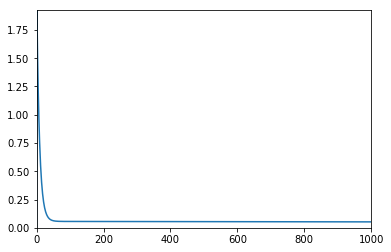

In [17]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_step,0,np.max(cost_history)])
plt.show()

In [18]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4,4]), name='weight2')
b2 = tf.Variable(tf.random_normal([4]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [19]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  33.9767
Step:  1 Cost:  7.97406
Step:  2 Cost:  4.51088
Step:  3 Cost:  2.96082
Step:  4 Cost:  2.10743
Step:  5 Cost:  1.61491
Step:  6 Cost:  1.33071
Step:  7 Cost:  1.11714
Step:  8 Cost:  0.948743
Step:  9 Cost:  0.813548
Step:  10 Cost:  0.703255
Step:  11 Cost:  0.612447
Step:  12 Cost:  0.536998
Step:  13 Cost:  0.473559
Step:  14 Cost:  0.419932
Step:  15 Cost:  0.374211
Step:  16 Cost:  0.335027
Step:  17 Cost:  0.301312
Step:  18 Cost:  0.272117
Step:  19 Cost:  0.246697
Step:  20 Cost:  0.224456
Step:  21 Cost:  0.204929
Step:  22 Cost:  0.187669
Step:  23 Cost:  0.17238
Step:  24 Cost:  0.158794
Step:  25 Cost:  0.146649
Step:  26 Cost:  0.135755
Step:  27 Cost:  0.125953
Step:  28 Cost:  0.117125
Step:  29 Cost:  0.109152
Step:  30 Cost:  0.101957
Step:  31 Cost:  0.0954777
Step:  32 Cost:  0.0895935
Step:  33 Cost:  0.084255
Step:  34 Cost:  0.079437
Step:  35 Cost:  0.0750771
Step:  36 Cost:  0.0711506
Step:  37 Cost:  0.0676672
Step:  38 Cost:  0.0646061

Step:  365 Cost:  0.0102285
Step:  366 Cost:  0.0102005
Step:  367 Cost:  0.0101726
Step:  368 Cost:  0.010145
Step:  369 Cost:  0.0101176
Step:  370 Cost:  0.0100903
Step:  371 Cost:  0.0100633
Step:  372 Cost:  0.0100363
Step:  373 Cost:  0.0100096
Step:  374 Cost:  0.00998297
Step:  375 Cost:  0.00995654
Step:  376 Cost:  0.00993027
Step:  377 Cost:  0.00990418
Step:  378 Cost:  0.00987823
Step:  379 Cost:  0.00985244
Step:  380 Cost:  0.00982677
Step:  381 Cost:  0.00980123
Step:  382 Cost:  0.00977585
Step:  383 Cost:  0.00975059
Step:  384 Cost:  0.00972554
Step:  385 Cost:  0.00970069
Step:  386 Cost:  0.00967601
Step:  387 Cost:  0.0096515
Step:  388 Cost:  0.00962713
Step:  389 Cost:  0.00960296
Step:  390 Cost:  0.00957902
Step:  391 Cost:  0.00955524
Step:  392 Cost:  0.00953158
Step:  393 Cost:  0.00950805
Step:  394 Cost:  0.00948462
Step:  395 Cost:  0.00946134
Step:  396 Cost:  0.00943814
Step:  397 Cost:  0.00941507
Step:  398 Cost:  0.00939212
Step:  399 Cost:  0.00936

Step:  751 Cost:  0.00515164
Step:  752 Cost:  0.00514479
Step:  753 Cost:  0.00513795
Step:  754 Cost:  0.00513113
Step:  755 Cost:  0.00512432
Step:  756 Cost:  0.00511753
Step:  757 Cost:  0.00511074
Step:  758 Cost:  0.00510397
Step:  759 Cost:  0.00509722
Step:  760 Cost:  0.00509048
Step:  761 Cost:  0.00508375
Step:  762 Cost:  0.00507703
Step:  763 Cost:  0.00507033
Step:  764 Cost:  0.00506364
Step:  765 Cost:  0.00505696
Step:  766 Cost:  0.0050503
Step:  767 Cost:  0.00504365
Step:  768 Cost:  0.00503702
Step:  769 Cost:  0.0050304
Step:  770 Cost:  0.00502379
Step:  771 Cost:  0.00501719
Step:  772 Cost:  0.00501061
Step:  773 Cost:  0.00500404
Step:  774 Cost:  0.00499749
Step:  775 Cost:  0.00499094
Step:  776 Cost:  0.00498441
Step:  777 Cost:  0.00497789
Step:  778 Cost:  0.00497139
Step:  779 Cost:  0.0049649
Step:  780 Cost:  0.00495842
Step:  781 Cost:  0.00495196
Step:  782 Cost:  0.0049455
Step:  783 Cost:  0.00493907
Step:  784 Cost:  0.00493266
Step:  785 Cost:  

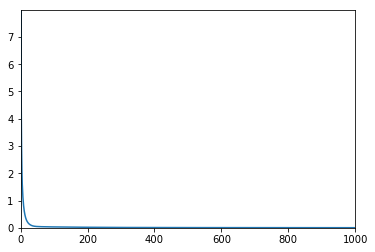

In [20]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_step,0,np.max(cost_history)])
plt.show()

In [21]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2,2]), name='weight2')
b2 = tf.Variable(tf.random_normal([2]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([2,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [22]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  4.78454
Step:  1 Cost:  4.2169
Step:  2 Cost:  3.73187
Step:  3 Cost:  3.31339
Step:  4 Cost:  2.94941
Step:  5 Cost:  2.63071
Step:  6 Cost:  2.3501
Step:  7 Cost:  2.1019
Step:  8 Cost:  1.88157
Step:  9 Cost:  1.68539
Step:  10 Cost:  1.51033
Step:  11 Cost:  1.35384
Step:  12 Cost:  1.21378
Step:  13 Cost:  1.08831
Step:  14 Cost:  0.97588
Step:  15 Cost:  0.875108
Step:  16 Cost:  0.784799
Step:  17 Cost:  0.703894
Step:  18 Cost:  0.631453
Step:  19 Cost:  0.566635
Step:  20 Cost:  0.508685
Step:  21 Cost:  0.456923
Step:  22 Cost:  0.410733
Step:  23 Cost:  0.369561
Step:  24 Cost:  0.3329
Step:  25 Cost:  0.300294
Step:  26 Cost:  0.271328
Step:  27 Cost:  0.245623
Step:  28 Cost:  0.22284
Step:  29 Cost:  0.202669
Step:  30 Cost:  0.18483
Step:  31 Cost:  0.16907
Step:  32 Cost:  0.155163
Step:  33 Cost:  0.142902
Step:  34 Cost:  0.132104
Step:  35 Cost:  0.122602
Step:  36 Cost:  0.114249
Step:  37 Cost:  0.106912
Step:  38 Cost:  0.100472
Step:  39 Cost:  0.

Step:  331 Cost:  0.0478814
Step:  332 Cost:  0.0478505
Step:  333 Cost:  0.0478195
Step:  334 Cost:  0.0477885
Step:  335 Cost:  0.0477573
Step:  336 Cost:  0.0477262
Step:  337 Cost:  0.047695
Step:  338 Cost:  0.0476639
Step:  339 Cost:  0.0476328
Step:  340 Cost:  0.0476015
Step:  341 Cost:  0.0475702
Step:  342 Cost:  0.047539
Step:  343 Cost:  0.0475077
Step:  344 Cost:  0.0474766
Step:  345 Cost:  0.0474454
Step:  346 Cost:  0.0474142
Step:  347 Cost:  0.0473831
Step:  348 Cost:  0.0473517
Step:  349 Cost:  0.0473204
Step:  350 Cost:  0.047289
Step:  351 Cost:  0.0472576
Step:  352 Cost:  0.0472263
Step:  353 Cost:  0.0471949
Step:  354 Cost:  0.0471636
Step:  355 Cost:  0.0471322
Step:  356 Cost:  0.0471009
Step:  357 Cost:  0.0470695
Step:  358 Cost:  0.0470382
Step:  359 Cost:  0.0470069
Step:  360 Cost:  0.0469756
Step:  361 Cost:  0.0469443
Step:  362 Cost:  0.0469128
Step:  363 Cost:  0.0468814
Step:  364 Cost:  0.04685
Step:  365 Cost:  0.0468187
Step:  366 Cost:  0.04678

Step:  671 Cost:  0.0369139
Step:  672 Cost:  0.0368822
Step:  673 Cost:  0.0368505
Step:  674 Cost:  0.036819
Step:  675 Cost:  0.0367875
Step:  676 Cost:  0.036756
Step:  677 Cost:  0.0367244
Step:  678 Cost:  0.0366929
Step:  679 Cost:  0.0366612
Step:  680 Cost:  0.0366297
Step:  681 Cost:  0.0365983
Step:  682 Cost:  0.036567
Step:  683 Cost:  0.0365357
Step:  684 Cost:  0.0365045
Step:  685 Cost:  0.0364733
Step:  686 Cost:  0.0364422
Step:  687 Cost:  0.036411
Step:  688 Cost:  0.0363798
Step:  689 Cost:  0.0363486
Step:  690 Cost:  0.0363176
Step:  691 Cost:  0.0362866
Step:  692 Cost:  0.0362555
Step:  693 Cost:  0.0362244
Step:  694 Cost:  0.0361934
Step:  695 Cost:  0.0361624
Step:  696 Cost:  0.0361313
Step:  697 Cost:  0.0361003
Step:  698 Cost:  0.0360693
Step:  699 Cost:  0.0360382
Step:  700 Cost:  0.0360071
Step:  701 Cost:  0.0359762
Step:  702 Cost:  0.0359455
Step:  703 Cost:  0.0359148
Step:  704 Cost:  0.0358842
Step:  705 Cost:  0.0358537
Step:  706 Cost:  0.0358

In [23]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,3]), name='weight1')
b1 = tf.Variable(tf.random_normal([3]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([3,3]), name='weight2')
b2 = tf.Variable(tf.random_normal([3]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([3,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [24]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  2.76952
Step:  1 Cost:  1.01486
Step:  2 Cost:  0.626472
Step:  3 Cost:  0.458561
Step:  4 Cost:  0.36386
Step:  5 Cost:  0.300255
Step:  6 Cost:  0.253551
Step:  7 Cost:  0.217318
Step:  8 Cost:  0.188237
Step:  9 Cost:  0.164349
Step:  10 Cost:  0.144542
Step:  11 Cost:  0.12803
Step:  12 Cost:  0.114201
Step:  13 Cost:  0.102666
Step:  14 Cost:  0.0930933
Step:  15 Cost:  0.0851145
Step:  16 Cost:  0.0782357
Step:  17 Cost:  0.0723038
Step:  18 Cost:  0.0672457
Step:  19 Cost:  0.0629629
Step:  20 Cost:  0.059334
Step:  21 Cost:  0.0562095
Step:  22 Cost:  0.0535609
Step:  23 Cost:  0.0512716
Step:  24 Cost:  0.0492719
Step:  25 Cost:  0.047536
Step:  26 Cost:  0.0460366
Step:  27 Cost:  0.0447778
Step:  28 Cost:  0.0436851
Step:  29 Cost:  0.0427428
Step:  30 Cost:  0.041927
Step:  31 Cost:  0.04121
Step:  32 Cost:  0.0405853
Step:  33 Cost:  0.0400465
Step:  34 Cost:  0.0395793
Step:  35 Cost:  0.039165
Step:  36 Cost:  0.0387985
Step:  37 Cost:  0.0384748
Step:  3

Step:  405 Cost:  0.0148307
Step:  406 Cost:  0.0147876
Step:  407 Cost:  0.0147445
Step:  408 Cost:  0.0147016
Step:  409 Cost:  0.0146588
Step:  410 Cost:  0.0146161
Step:  411 Cost:  0.0145735
Step:  412 Cost:  0.0145311
Step:  413 Cost:  0.0144888
Step:  414 Cost:  0.0144466
Step:  415 Cost:  0.0144045
Step:  416 Cost:  0.0143626
Step:  417 Cost:  0.0143207
Step:  418 Cost:  0.0142791
Step:  419 Cost:  0.0142375
Step:  420 Cost:  0.0141961
Step:  421 Cost:  0.0141548
Step:  422 Cost:  0.0141136
Step:  423 Cost:  0.0140726
Step:  424 Cost:  0.0140316
Step:  425 Cost:  0.0139908
Step:  426 Cost:  0.0139501
Step:  427 Cost:  0.0139096
Step:  428 Cost:  0.0138691
Step:  429 Cost:  0.0138288
Step:  430 Cost:  0.0137886
Step:  431 Cost:  0.0137486
Step:  432 Cost:  0.0137086
Step:  433 Cost:  0.0136688
Step:  434 Cost:  0.0136291
Step:  435 Cost:  0.0135896
Step:  436 Cost:  0.0135501
Step:  437 Cost:  0.0135108
Step:  438 Cost:  0.0134716
Step:  439 Cost:  0.0134326
Step:  440 Cost:  0.

Step:  802 Cost:  0.00622653
Step:  803 Cost:  0.00621961
Step:  804 Cost:  0.00621272
Step:  805 Cost:  0.00620587
Step:  806 Cost:  0.00619905
Step:  807 Cost:  0.00619227
Step:  808 Cost:  0.00618553
Step:  809 Cost:  0.00617882
Step:  810 Cost:  0.00617215
Step:  811 Cost:  0.00616551
Step:  812 Cost:  0.0061589
Step:  813 Cost:  0.00615233
Step:  814 Cost:  0.0061458
Step:  815 Cost:  0.0061393
Step:  816 Cost:  0.00613283
Step:  817 Cost:  0.0061264
Step:  818 Cost:  0.00611999
Step:  819 Cost:  0.00611362
Step:  820 Cost:  0.00610729
Step:  821 Cost:  0.00610099
Step:  822 Cost:  0.00609472
Step:  823 Cost:  0.00608848
Step:  824 Cost:  0.00608228
Step:  825 Cost:  0.00607611
Step:  826 Cost:  0.00606997
Step:  827 Cost:  0.00606386
Step:  828 Cost:  0.00605778
Step:  829 Cost:  0.00605174
Step:  830 Cost:  0.00604572
Step:  831 Cost:  0.00603974
Step:  832 Cost:  0.00603379
Step:  833 Cost:  0.00602787
Step:  834 Cost:  0.00602198
Step:  835 Cost:  0.00601611
Step:  836 Cost:  

In [25]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4,4]), name='weight2')
b2 = tf.Variable(tf.random_normal([4]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [26]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.502876
Step:  1 Cost:  0.48276
Step:  2 Cost:  0.463526
Step:  3 Cost:  0.445144
Step:  4 Cost:  0.427586
Step:  5 Cost:  0.410824
Step:  6 Cost:  0.39483
Step:  7 Cost:  0.37958
Step:  8 Cost:  0.365049
Step:  9 Cost:  0.351208
Step:  10 Cost:  0.338033
Step:  11 Cost:  0.325502
Step:  12 Cost:  0.313591
Step:  13 Cost:  0.302275
Step:  14 Cost:  0.291531
Step:  15 Cost:  0.281337
Step:  16 Cost:  0.27167
Step:  17 Cost:  0.262507
Step:  18 Cost:  0.253827
Step:  19 Cost:  0.245608
Step:  20 Cost:  0.237831
Step:  21 Cost:  0.230473
Step:  22 Cost:  0.223516
Step:  23 Cost:  0.21694
Step:  24 Cost:  0.210726
Step:  25 Cost:  0.204855
Step:  26 Cost:  0.199312
Step:  27 Cost:  0.194078
Step:  28 Cost:  0.189136
Step:  29 Cost:  0.184471
Step:  30 Cost:  0.180067
Step:  31 Cost:  0.175909
Step:  32 Cost:  0.171985
Step:  33 Cost:  0.168279
Step:  34 Cost:  0.164779
Step:  35 Cost:  0.161473
Step:  36 Cost:  0.15835
Step:  37 Cost:  0.155397
Step:  38 Cost:  0.152605
St

Step:  369 Cost:  0.0639054
Step:  370 Cost:  0.0638816
Step:  371 Cost:  0.0638579
Step:  372 Cost:  0.0638344
Step:  373 Cost:  0.063811
Step:  374 Cost:  0.0637877
Step:  375 Cost:  0.0637645
Step:  376 Cost:  0.0637414
Step:  377 Cost:  0.0637185
Step:  378 Cost:  0.0636957
Step:  379 Cost:  0.063673
Step:  380 Cost:  0.0636503
Step:  381 Cost:  0.0636278
Step:  382 Cost:  0.0636054
Step:  383 Cost:  0.0635831
Step:  384 Cost:  0.0635608
Step:  385 Cost:  0.0635386
Step:  386 Cost:  0.0635166
Step:  387 Cost:  0.0634948
Step:  388 Cost:  0.0634731
Step:  389 Cost:  0.0634515
Step:  390 Cost:  0.06343
Step:  391 Cost:  0.0634087
Step:  392 Cost:  0.0633876
Step:  393 Cost:  0.0633665
Step:  394 Cost:  0.0633455
Step:  395 Cost:  0.0633247
Step:  396 Cost:  0.063304
Step:  397 Cost:  0.0632835
Step:  398 Cost:  0.0632631
Step:  399 Cost:  0.0632428
Step:  400 Cost:  0.0632226
Step:  401 Cost:  0.0632025
Step:  402 Cost:  0.0631824
Step:  403 Cost:  0.0631624
Step:  404 Cost:  0.06314

Step:  734 Cost:  0.0606615
Step:  735 Cost:  0.060658
Step:  736 Cost:  0.0606544
Step:  737 Cost:  0.0606508
Step:  738 Cost:  0.0606472
Step:  739 Cost:  0.0606436
Step:  740 Cost:  0.0606401
Step:  741 Cost:  0.0606365
Step:  742 Cost:  0.060633
Step:  743 Cost:  0.0606294
Step:  744 Cost:  0.0606259
Step:  745 Cost:  0.0606223
Step:  746 Cost:  0.0606188
Step:  747 Cost:  0.0606153
Step:  748 Cost:  0.0606117
Step:  749 Cost:  0.0606082
Step:  750 Cost:  0.0606046
Step:  751 Cost:  0.0606011
Step:  752 Cost:  0.0605976
Step:  753 Cost:  0.0605941
Step:  754 Cost:  0.0605906
Step:  755 Cost:  0.060587
Step:  756 Cost:  0.0605835
Step:  757 Cost:  0.06058
Step:  758 Cost:  0.0605765
Step:  759 Cost:  0.060573
Step:  760 Cost:  0.0605695
Step:  761 Cost:  0.060566
Step:  762 Cost:  0.0605625
Step:  763 Cost:  0.0605591
Step:  764 Cost:  0.0605556
Step:  765 Cost:  0.0605521
Step:  766 Cost:  0.0605486
Step:  767 Cost:  0.0605451
Step:  768 Cost:  0.0605417
Step:  769 Cost:  0.0605382

In [27]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([5,5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [28]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  7.44082
Step:  1 Cost:  2.0074
Step:  2 Cost:  0.922934
Step:  3 Cost:  0.517264
Step:  4 Cost:  0.334912
Step:  5 Cost:  0.24346
Step:  6 Cost:  0.1935
Step:  7 Cost:  0.164269
Step:  8 Cost:  0.146051
Step:  9 Cost:  0.133941
Step:  10 Cost:  0.125319
Step:  11 Cost:  0.11876
Step:  12 Cost:  0.11345
Step:  13 Cost:  0.108938
Step:  14 Cost:  0.104947
Step:  15 Cost:  0.101319
Step:  16 Cost:  0.0979591
Step:  17 Cost:  0.0948122
Step:  18 Cost:  0.0918379
Step:  19 Cost:  0.0890123
Step:  20 Cost:  0.0863229
Step:  21 Cost:  0.0837563
Step:  22 Cost:  0.0812992
Step:  23 Cost:  0.0789437
Step:  24 Cost:  0.076687
Step:  25 Cost:  0.0745219
Step:  26 Cost:  0.0724442
Step:  27 Cost:  0.0704526
Step:  28 Cost:  0.0685424
Step:  29 Cost:  0.066707
Step:  30 Cost:  0.0649407
Step:  31 Cost:  0.0632416
Step:  32 Cost:  0.0616049
Step:  33 Cost:  0.060031
Step:  34 Cost:  0.0585151
Step:  35 Cost:  0.0570532
Step:  36 Cost:  0.0556426
Step:  37 Cost:  0.0542807
Step:  38 C

Step:  378 Cost:  0.00329121
Step:  379 Cost:  0.00328391
Step:  380 Cost:  0.00327667
Step:  381 Cost:  0.00326949
Step:  382 Cost:  0.00326235
Step:  383 Cost:  0.00325526
Step:  384 Cost:  0.00324822
Step:  385 Cost:  0.00324121
Step:  386 Cost:  0.00323423
Step:  387 Cost:  0.00322729
Step:  388 Cost:  0.00322041
Step:  389 Cost:  0.00321357
Step:  390 Cost:  0.00320677
Step:  391 Cost:  0.00320002
Step:  392 Cost:  0.00319332
Step:  393 Cost:  0.00318666
Step:  394 Cost:  0.00318005
Step:  395 Cost:  0.00317348
Step:  396 Cost:  0.00316695
Step:  397 Cost:  0.00316047
Step:  398 Cost:  0.00315403
Step:  399 Cost:  0.00314763
Step:  400 Cost:  0.00314127
Step:  401 Cost:  0.00313496
Step:  402 Cost:  0.00312868
Step:  403 Cost:  0.00312245
Step:  404 Cost:  0.00311625
Step:  405 Cost:  0.0031101
Step:  406 Cost:  0.00310398
Step:  407 Cost:  0.0030979
Step:  408 Cost:  0.00309184
Step:  409 Cost:  0.00308581
Step:  410 Cost:  0.00307981
Step:  411 Cost:  0.00307385
Step:  412 Cost:

Step:  742 Cost:  0.00204178
Step:  743 Cost:  0.00204002
Step:  744 Cost:  0.00203826
Step:  745 Cost:  0.0020365
Step:  746 Cost:  0.00203474
Step:  747 Cost:  0.00203299
Step:  748 Cost:  0.00203125
Step:  749 Cost:  0.0020295
Step:  750 Cost:  0.00202777
Step:  751 Cost:  0.00202603
Step:  752 Cost:  0.0020243
Step:  753 Cost:  0.00202257
Step:  754 Cost:  0.00202084
Step:  755 Cost:  0.00201912
Step:  756 Cost:  0.0020174
Step:  757 Cost:  0.00201568
Step:  758 Cost:  0.00201397
Step:  759 Cost:  0.00201227
Step:  760 Cost:  0.00201057
Step:  761 Cost:  0.00200887
Step:  762 Cost:  0.00200718
Step:  763 Cost:  0.00200549
Step:  764 Cost:  0.0020038
Step:  765 Cost:  0.00200212
Step:  766 Cost:  0.00200044
Step:  767 Cost:  0.00199877
Step:  768 Cost:  0.0019971
Step:  769 Cost:  0.00199544
Step:  770 Cost:  0.00199377
Step:  771 Cost:  0.00199212
Step:  772 Cost:  0.00199046
Step:  773 Cost:  0.00198881
Step:  774 Cost:  0.00198717
Step:  775 Cost:  0.00198553
Step:  776 Cost:  0.

In [29]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,6]), name='weight1')
b1 = tf.Variable(tf.random_normal([6]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([6,6]), name='weight2')
b2 = tf.Variable(tf.random_normal([6]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([6,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [30]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  2.31749
Step:  1 Cost:  2.05439
Step:  2 Cost:  1.83256
Step:  3 Cost:  1.64359
Step:  4 Cost:  1.48117
Step:  5 Cost:  1.34065
Step:  6 Cost:  1.21827
Step:  7 Cost:  1.11073
Step:  8 Cost:  1.01533
Step:  9 Cost:  0.930317
Step:  10 Cost:  0.854291
Step:  11 Cost:  0.785995
Step:  12 Cost:  0.724369
Step:  13 Cost:  0.667419
Step:  14 Cost:  0.606348
Step:  15 Cost:  0.54955
Step:  16 Cost:  0.500329
Step:  17 Cost:  0.457537
Step:  18 Cost:  0.420264
Step:  19 Cost:  0.387745
Step:  20 Cost:  0.35934
Step:  21 Cost:  0.334492
Step:  22 Cost:  0.312726
Step:  23 Cost:  0.293642
Step:  24 Cost:  0.276888
Step:  25 Cost:  0.262157
Step:  26 Cost:  0.249187
Step:  27 Cost:  0.237749
Step:  28 Cost:  0.22764
Step:  29 Cost:  0.218684
Step:  30 Cost:  0.21073
Step:  31 Cost:  0.203648
Step:  32 Cost:  0.197327
Step:  33 Cost:  0.191664
Step:  34 Cost:  0.186574
Step:  35 Cost:  0.181984
Step:  36 Cost:  0.177826
Step:  37 Cost:  0.174045
Step:  38 Cost:  0.170594
Step:  39

Step:  359 Cost:  0.0301643
Step:  360 Cost:  0.0300693
Step:  361 Cost:  0.0299748
Step:  362 Cost:  0.0298807
Step:  363 Cost:  0.0297868
Step:  364 Cost:  0.0296935
Step:  365 Cost:  0.0296007
Step:  366 Cost:  0.0295084
Step:  367 Cost:  0.0294166
Step:  368 Cost:  0.0293255
Step:  369 Cost:  0.029235
Step:  370 Cost:  0.0291453
Step:  371 Cost:  0.0290561
Step:  372 Cost:  0.0289674
Step:  373 Cost:  0.0288792
Step:  374 Cost:  0.0287916
Step:  375 Cost:  0.0287043
Step:  376 Cost:  0.0286176
Step:  377 Cost:  0.0285313
Step:  378 Cost:  0.0284454
Step:  379 Cost:  0.02836
Step:  380 Cost:  0.028275
Step:  381 Cost:  0.0281903
Step:  382 Cost:  0.0281061
Step:  383 Cost:  0.0280224
Step:  384 Cost:  0.0279392
Step:  385 Cost:  0.0278563
Step:  386 Cost:  0.0277738
Step:  387 Cost:  0.0276918
Step:  388 Cost:  0.0276102
Step:  389 Cost:  0.0275289
Step:  390 Cost:  0.0274481
Step:  391 Cost:  0.0273677
Step:  392 Cost:  0.0272877
Step:  393 Cost:  0.027208
Step:  394 Cost:  0.02712

Step:  730 Cost:  0.0123157
Step:  731 Cost:  0.0122904
Step:  732 Cost:  0.0122651
Step:  733 Cost:  0.01224
Step:  734 Cost:  0.0122149
Step:  735 Cost:  0.0121898
Step:  736 Cost:  0.0121648
Step:  737 Cost:  0.0121399
Step:  738 Cost:  0.0121151
Step:  739 Cost:  0.0120903
Step:  740 Cost:  0.0120655
Step:  741 Cost:  0.0120408
Step:  742 Cost:  0.0120163
Step:  743 Cost:  0.0119918
Step:  744 Cost:  0.0119674
Step:  745 Cost:  0.0119431
Step:  746 Cost:  0.0119188
Step:  747 Cost:  0.0118946
Step:  748 Cost:  0.0118705
Step:  749 Cost:  0.0118464
Step:  750 Cost:  0.0118224
Step:  751 Cost:  0.0117983
Step:  752 Cost:  0.0117744
Step:  753 Cost:  0.0117505
Step:  754 Cost:  0.0117267
Step:  755 Cost:  0.011703
Step:  756 Cost:  0.0116793
Step:  757 Cost:  0.0116556
Step:  758 Cost:  0.0116321
Step:  759 Cost:  0.0116085
Step:  760 Cost:  0.0115851
Step:  761 Cost:  0.0115616
Step:  762 Cost:  0.0115382
Step:  763 Cost:  0.0115149
Step:  764 Cost:  0.0114917
Step:  765 Cost:  0.011